## HITS PREDICTION FOR THE MUSKETS FOOTBALL TEAM

### Challenge

 The Muskets Football team is preparing for the next games season and have asked you to help clean 
and preprocess their data and hopefully help predict number of hits by each player 
TASK: 
1. Conduct a full range cleaning of the data. Provide explanations and justifications for any actions 
you take. 
2. Preprocess the cleaned data from task 1 above and transform it into a well behaved data. 
3. Select input features for an outcome feature of HITS. 
Sub Tasks 
1. Extract the player names from the PlayerUrl column and create a new column name Player 
Name from the extracts 
2. Create a new column titled Player Status from the CONTRACT column with 3 labels ; 
a. 'Active' If the player has an active contract 
b. 'Free', if the player is free 
c. 'On Loan' if the player is on loan 
3. Unpack the POSITIONS column into as many columns as there are positions and assign Boolean 
values in the columns for each player as appropriate. Name the columns the play position 
4. Weight and Height, W/F, SM and IR Columns: convert to integers 
5. Value, Wage and Release Clause columns: convert to Float 
6. Inspect the HITS column and ensure its float 
7. Create 5 new categorical columns for the Height, Weight, Release Clause, Value and Wage into 
which you convert the respective values into clusters/labels as follows 

a. Height: Bucket intervals of 10 cm

b. Weight: Bucket intervals of 10 kg 

c. Wage: bucket intervals of 50K 

d. Value: bucket intervals of 50M 

e. Release Clause: bucket intervals of 50M 

A. BONUS: Build a prediction model to predict the number of Hits of each paye

#### IMPORTING NECESSARY LIBRARIES

In [666]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### SETTING THE DISPLAY OPTIONS

In [667]:
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

#### ACCESSING DATA REPO AND PULLING DATA

In [668]:
df = pd.read_csv(r"C:\Users\CHINELO\Downloads\Muskets_teamData_V2.csv", low_memory=False)

#### Getting the top 20 samples in the dataset

In [669]:
df.head(20)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,1-Jul-04,NaN,€103.5M,€560K,€138.4M,429.0,85.0,95.0,70.0,91,88.0,470.0,96,93.0,94.0,91.0,96.0,451.0,91.0,80.0,91.0,94.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44,40.0,93.0,95,75.0,96.0,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8,2231.0,466,4 ★,4★,Medium,Low,5 ★,85.0,92.0,91.0,95.0,38.0,65.0,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,10-Jul-18,NaN,€63M,€220K,€75.9M,437.0,84.0,95.0,90.0,82,86.0,414.0,88,81.0,76.0,77.0,92.0,431.0,87.0,91.0,87.0,95.0,71.0,444.0,94.0,95.0,84.0,78.0,93.0,353.0,63,29.0,95.0,82,84.0,95.0,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11,2221.0,464,4 ★,5★,High,Low,5 ★,89.0,93.0,81.0,89.0,35.0,77.0,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,16-Jul-14,NaN,€120M,€125K,€159.4M,95.0,13.0,11.0,15.0,43,13.0,109.0,12,13.0,14.0,40.0,30.0,307.0,43.0,60.0,67.0,88.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34,19.0,11.0,65,11.0,68.0,57.0,27.0,12.0,18.0,437.0,87.0,92.0,78.0,90.0,90,1413.0,489,3 ★,1★,Medium,Medium,3 ★,87.0,92.0,78.0,90.0,52.0,90.0,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,30-Aug-15,NaN,€129M,€370K,€161M,407.0,94.0,82.0,55.0,94,82.0,441.0,88,85.0,83.0,93.0,92.0,398.0,77.0,76.0,78.0,91.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,408.0,76,66.0,88.0,94,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13,2304.0,485,5 ★,4★,High,High,4 ★,76.0,86.0,93.0,88.0,64.0,78.0,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,3-Aug-17,NaN,€132M,€270K,€166.5M,408.0,85.0,87.0,62.0,87,87.0,448.0,95,88.0,89.0,81.0,95.0,453.0,94.0,89.0,96.0,91.0,83.0,357.0,80.0,62.0,81.0,50.0,84.0,356.0,51,36.0,87.0,90,92.0,93.0,94.0,35.0,30.0,29.0,59.0,9.0,9.0,15.0,15.0,11,2175.0,451,5 ★,5★,High,Medium,5 ★,91.0,85.0,86.0,94.0,36.0,59.0,595
5,188545,R. Lewandowski,Robert Lewandowski,https://cdn.sofifa.com/players/188/545/21_60.png,http://sofifa.com/player/188545/robert-lewando...,Poland,31,91.0,91.0,\n\n\n\nFC Bayern München,2014 ~ 2023,ST,184cm,80kg,Right,91,ST,1-Jul-14,NaN,€111M,€240K,€132M,423.0,71.0,94.0,85.0,84,89.0,407.0,85,79.0,85.0,70.0,88.0,407.0,77.0,78.0,77.0,93.0,82.0,420.0,89.0,84.0,76.0,86.0,85.0,391.0,81,49.0,94.0,79,88.0,88.0,96.0,35.0,42.0,19.0,51.0,15.0,6.0,12.0,8.0,10,2195.0,457,4 ★,4★,High,Medium,4 ★,78.0,91.0,78.0,85.0,43.0,82.0,248
6,209331,M. Salah,Mohamed Salah,https://cdn.sofifa.com/players/209/331/21_60.png,http://sofifa.com/player/209331/mohamed-salah/...,Egypt,28,90.0,90.0,\n\n\n\n

#### Getting the bottom 20 samples in the dataset

In [670]:
df.tail(20)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
19001,252549,J. Bird,Jay Bird,https://cdn.sofifa.com/players/252/549/21_60.png,http://sofifa.com/player/252549/jay-bird/210006/,England,19,48.0,63.0,\n\n\n\nMilton Keynes Dons,2019 ~ 2021,ST,186cm,70kg,Right,50,ST,1-Jul-19,NaN,€110K,€1K,€143K,214.0,33.0,53.0,47.0,42,39.0,186.0,45,37.0,30.0,30.0,44.0,299.0,64.0,68.0,62.0,46.0,59.0,265.0,44.0,61.0,61.0,56.0,43.0,181.0,32,13.0,43.0,41,52.0,42.0,44.0,16.0,10.0,18.0,59.0,13.0,12.0,11.0,15.0,8,1248.0,268,3 ★,2★,Medium,Medium,1 ★,66.0,48.0,37.0,47.0,17.0,53.0,NaN
19002,251263,L. Smith,Laurence Smith,https://cdn.sofifa.com/players/251/263/21_60.png,http://sofifa.com/player/251263/laurence-smith...,England,19,48.0,65.0,\n\n\n\nFleetwood Town,2019 ~ 2021,RM,180cm,67kg,Right,49,RM,10-May-19,NaN,€120K,€900,€143K,191.0,46.0,33.0,30.0,40,42.0,209.0,51,40.0,32.0,41.0,45.0,282.0,61.0,63.0,57.0,41.0,60.0,232.0,47.0,43.0,52.0,49.0,41.0,188.0,33,18.0,41.0,49,47.0,43.0,89.0,20.0,30.0,39.0,38.0,7.0,9.0,7.0,9.0,6,1229.0,266,2 ★,2★,Medium,Medium,1 ★,62.0,39.0,43.0,50.0,26.0,46.0,NaN
19003,241274,L. Waldock,Liam Waldock,https://cdn.sofifa.com/players/241/274/21_60.png,http://sofifa.com/player/241274/liam-waldock/2...,England,19,48.0,65.0,\n\n\n\nSheffield Wednesday,2017 ~ 2021,CM,178cm,64kg,Right,50,CAM,25-Sep-17,NaN,€120K,€2K,€152K,204.0,39.0,31.0,44.0,58,32.0,229.0,49,40.0,42.0,52.0,46.0,315.0,59.0,62.0,67.0,53.0,74.0,226.0,45.0,62.0,51.0,40.0,28.0,232.0,59,45.0,33.0,50,45.0,44.0,123.0,42.0,42.0,39.0,43.0,12.0,7.0,7.0,9.0,8,1372.0,287,3 ★,2★,Medium,Medium,1 ★,61.0,34.0,50.0,51.0,43.0,48.0,NaN
19004,256631,B. Montaño,Brayan Montaño,https://cdn.sofifa.com/players/256/631/21_60.png,http://sofifa.com/player/256631/brayan-montano...,Colombia,18,48.0,67.0,\n\n\n\nDeportivo Cali,2020 ~ 2024,CB,176cm,70kg,Left,50,CB,1-Jan-20,NaN,€110K,€500,€119K,137.0,25.0,22.0,44.0,27,19.0,128.0,24,25.0,25.0,27.0,27.0,263.0,58.0,59.0,49.0,40.0,57.0,238.0,34.0,69.0,57.0,57.0,21.0,187.0,47,50.0,28.0,30,32.0,42.0,147.0,39.0,55.0,53.0,47.0,8.0,12.0,14.0,6.0,7,1147.0,245,2 ★,2★,Medium,Medium,1 ★,59.0,25.0,27.0,30.0,48.0,56.0,NaN
19005,258671,L. Ravenhill,Liam Ravenhill,https://cdn.sofifa.com/players/258/671/21_60.png,http://sofifa.com/player/258671/liam-ravenhill...,England,17,48.0,69.0,\n\n\n\nDoncaster Rovers,2020 ~ 2024,CM,174cm,71kg,Right,51,CAM,8-Sep-20,NaN,€150K,€500,€165K,195.0,32.0,33.0,44.0,52,34.0,220.0,47,38.0,36.0,48.0,51.0,291.0,67.0,60.0,59.0,49.0,56.0,258.0,48.0,64.0,58.0,53.0,35.0,233.0,57,38.0,48.0,46,44.0,43.0,130.0,39.0,43.0,48.0,45.0,6.0,7.0,9.0,8.0,15,1372.0,293,2 ★,2★,Medium,Medium,1 ★,63.0,38.0,45.0,50.0,41.0,56.0,NaN
19006,256662,R. Fontalvo,Reinaldo Fontalvo,https://cdn.sofifa.com/players/256/662/21_60.png,http://sofifa.com/player/256662/reinaldo-fonta...,Colombia,21,48.0,59.0,\n\n\n\nJunior FC,2020 ~ 2024,GK,185cm,70kg,Left,48,GK,1-Jan-20,NaN,€90K,€500,€64K,64.0,14.0,7.0,12.0,23,8.0,65.0,5,12.0,10.0,20.0,18.0,184.0,27.0,32.0,35.0,42.0,48.0,179.0,44.0,61.0,18.0,49.0,7.0,81.0,27,8.0,7.0,27,12.0,27.0,31.0,8.0,10.0,13.0,245.0,46.0,46.0,58.0,44.0,51,849.0,275,2 ★,1★,Medium,Medium,1 ★,46.0,46.0,58.0,51.0,30.0,44.0,NaN
19007,257697,Chen Zitong,Zitong Chen,https://cdn.sofifa.com/players/257/697/21_60.png,http://sofifa.com/player/257697/zitong-chen/21...,China PR,23,47.0,51.0,\n\n\n\nShijiazhuang Ever Bright F.C.,2020 ~ 2023,CM,186cm,80

#### Getting the column names in the dataset

In [671]:
df.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

### EDA - EXPLORATORY DATA ANALYSIS

#### Checking the shape of the dataframe

In [672]:
print(df.shape)

(19021, 77)


#### Checking the data types of columns in the dataset

In [673]:
df.dtypes

ID                    int64
Name                 object
LongName             object
photoUrl             object
playerUrl            object
Nationality          object
Age                   int64
↓OVA                float64
POT                 float64
Club                 object
Contract             object
Positions            object
Height               object
Weight               object
Preferred Foot       object
BOV                   int64
Best Position        object
Joined               object
Loan Date End        object
Value                object
Wage                 object
Release Clause       object
Attacking           float64
Crossing            float64
Finishing           float64
Heading Accuracy    float64
Short Passing        object
Volleys             float64
Skill               float64
Dribbling            object
Curve               float64
FK Accuracy         float64
Long Passing        float64
Ball Control        float64
Movement            float64
Acceleration        

In [674]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19021 non-null  int64  
 1   Name              19021 non-null  object 
 2   LongName          19021 non-null  object 
 3   photoUrl          19021 non-null  object 
 4   playerUrl         19021 non-null  object 
 5   Nationality       19021 non-null  object 
 6   Age               19021 non-null  int64  
 7   ↓OVA              19019 non-null  float64
 8   POT               19020 non-null  float64
 9   Club              19021 non-null  object 
 10  Contract          19021 non-null  object 
 11  Positions         19021 non-null  object 
 12  Height            19021 non-null  object 
 13  Weight            19020 non-null  object 
 14  Preferred Foot    19021 non-null  object 
 15  BOV               19021 non-null  int64  
 16  Best Position     19021 non-null  object

#### ASSESSING THE NUMERICAL FEATURES IN THE DATAFRAME

In [675]:
df.describe()

,ID,Age,↓OVA,POT,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Volleys,Skill,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,19021.000000,19021.000000,19019.000000,19020.000000,19021.000000,19020.000000,19020.000000,19016.000000,19013.000000,19014.000000,19015.000000,19013.000000,19015.000000,19018.000000,19018.000000,19016.000000,19017.000000,19018.000000,19019.000000,19017.000000,19014.000000,19020.000000,19019.000000,19017.000000,19020.000000,19016.000000,19014.000000,19015.000000,19021.000000,19017.000000,19020.000000,19021.000000,19020.000000,19020.000000,19020.000000,19019.000000,19018.000000,19020.000000,19018.000000,19020.000000,19020.000000,19019.000000,19019.000000,19021.000000,19020.000000,19021.000000,19018.000000,19018.000000,19016.00000,19019.000000,19016.000000,19020.000000
mean,226424.369907,25.191052,65.710027,71.133176,66.745229,248.921346,49.687907,45.841554,51.933046,42.688019,256.449382,47.239468,42.387378,52.720528,58.525344,317.731121,64.363622,64.418866,63.372364,61.645791,63.931156,296.578181,57.791945,64.574486,62.655941,64.773454,46.772115,254.170129,55.580464,46.393122,50.297003,53.856212,48.055836,58.069295,139.916456,46.556286,47.704490,45.647476,81.414607,16.411041,16.202313,16.071297,16.210947,16.515010,1595.203523,355.677987,67.455358,53.446472,57.67175,62.869026,49.861327,64.359832
std,27130.054102,4.709833,6.961705,6.114062,6.741702,74.252568,18.121421,19.559283,17.284129,17.635959,78.591672,18.193181,17.217434,15.172967,16.556240,55.860444,14.886000,14.631825,14.593638,9.065386,14.058999,50.712216,13.300810,11.842823,15.800338,12.486151,19.290532,64.554816,17.133560,20.689840,19.419063,13.703338,15.648088,12.069520,61.191983,20.130801,21.358861,20.913930,84.637023,17.546148,16.809863,16.485556,16.998521,17.846464,269.676511,40.731658,10.674755,13.821133,10.07301,9.921473,16.432098,9.598237
min,41.000000,16.000000,47.000000,47.000000,48.000000,42.000000,6.000000,3.000000,5.000000,3.000000,40.000000,4.000000,5.000000,5.000000,5.000000,122.000000,13.000000,12.000000,14.000000,24.000000,12.000000,122.000000,18.000000,15.000000,12.000000,16.000000,4.000000,50.000000,9.000000,3.000000,2.000000,9.000000,6.000000,12.000000,20.000000,3.000000,5.000000,4.000000,10.000000,2.000000,2.000000,2.000000,2.000000,2.000000,747.000000,232.000000,25.000000,16.000000,25.00000,25.000000,12.000000,28.000000
25%,210182.000000,21.000000,61.000000,67.000000,62.000000,222.000000,38.000000,30.000000,44.000000,30.000000,222.000000,35.000000,31.000000,43.000000,54.000000,289.000000,57.000000,57.000000,55.000000,56.000000,56.000000,264.000000,48.000000,58.000000,55.000000,57.000000,32.000000,228.000000,44.000000,25.000000,40.000000,45.000000,39.000000,50.000000,83.000000,29.000000,27.000000,25.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1452.000000,327.000000,61.000000,44.000000,51.00000,57.000000,35.000000,58.000000
50%,232437.000000,25.000000,66.000000,71.000000,67.000000,263.000000,54.000000,49.000000,55.000000,44.000000,269.000000,49.000000,41.000000,56.000000,63.000000,327.000000,67.000000,67.000000,66.000000,62.000000,66.000000,302.000000,59.000000,65.000000,66.000000,66.000000,51.000000,263.000000,58.000000,53.000000,55.000000,55.000000,49.000000,59.000000,159.000000,52.000000,55.000000,52.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1626.500000,356.000000,68.000000,56.000000,58.00000,64.000000,53.000000,65.000000
75%,246929.000000,29.000000,70.000000,75.000000,71.000000,297.000000,63.000000,62.000000,64.000000,56.000000,310.000000,61.000000,55.000000,64.000000,69.000000,356.000000,74.000000,74.000000,74.000000,68.000000

#### Checking for missing values in the dataset

In [676]:
print(df.isnull().sum())

ID                      0
Name                    0
LongName                0
photoUrl                0
playerUrl               0
Nationality             0
Age                     0
↓OVA                    2
POT                     1
Club                    0
Contract                0
Positions               0
Height                  0
Weight                  1
Preferred Foot          0
BOV                     0
Best Position           0
Joined                  0
Loan Date End       18006
Value                   0
Wage                    0
Release Clause          3
Attacking               1
Crossing                1
Finishing               5
Heading Accuracy        8
Short Passing           9
Volleys                 7
Skill                   6
Dribbling               1
Curve                   8
FK Accuracy             6
Long Passing            3
Ball Control            3
Movement                5
Acceleration            4
Sprint Speed            3
Agility                 2
Reactions   

#### SEPERATING THE DATASET INTO NUMERICAL AND CATEGORICAL VARIABLES FOR EASIER ASSESSMENT

In [677]:
num_vars = df.select_dtypes(['float64', 'int64'])
print(num_vars.columns)

print('\n')

categorical_vars = df.select_dtypes('object')
print(categorical_vars.columns)

Index(['ID', 'Age', '↓OVA', 'POT', 'BOV', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Volleys', 'Skill', 'Curve', 'FK Accuracy',
       'Long Passing', 'Ball Control', 'Movement', 'Acceleration',
       'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power',
       'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY'],
      dtype='object')


Index(['Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Club',
       'Contract', 'Positions', 'Height', 'Weight', 'Preferred Foot',
       'Best Position', 'Joined', 'Loan Date End', 'Value', 'Wage',
       'Release Clause', 'Short Passing', 'Dribbling', '

#### INSPECTING THE NUMERICAL FEATURES

In [678]:
df.describe(include='float64')

,↓OVA,POT,Attacking,Crossing,Finishing,Heading Accuracy,Volleys,Skill,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Interceptions,Positioning,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,Total Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,19019.000000,19020.000000,19020.000000,19020.000000,19016.000000,19013.000000,19014.000000,19015.000000,19013.000000,19015.000000,19018.000000,19018.000000,19016.000000,19017.000000,19018.000000,19019.000000,19017.000000,19014.000000,19020.000000,19019.000000,19017.000000,19020.000000,19016.000000,19014.000000,19015.000000,19017.000000,19020.000000,19020.000000,19020.000000,19020.000000,19019.000000,19018.000000,19020.000000,19018.000000,19020.000000,19020.000000,19019.000000,19019.000000,19020.000000,19018.000000,19018.000000,19016.00000,19019.000000,19016.000000,19020.000000
mean,65.710027,71.133176,248.921346,49.687907,45.841554,51.933046,42.688019,256.449382,47.239468,42.387378,52.720528,58.525344,317.731121,64.363622,64.418866,63.372364,61.645791,63.931156,296.578181,57.791945,64.574486,62.655941,64.773454,46.772115,254.170129,46.393122,50.297003,48.055836,58.069295,139.916456,46.556286,47.704490,45.647476,81.414607,16.411041,16.202313,16.071297,16.210947,1595.203523,67.455358,53.446472,57.67175,62.869026,49.861327,64.359832
std,6.961705,6.114062,74.252568,18.121421,19.559283,17.284129,17.635959,78.591672,18.193181,17.217434,15.172967,16.556240,55.860444,14.886000,14.631825,14.593638,9.065386,14.058999,50.712216,13.300810,11.842823,15.800338,12.486151,19.290532,64.554816,20.689840,19.419063,15.648088,12.069520,61.191983,20.130801,21.358861,20.913930,84.637023,17.546148,16.809863,16.485556,16.998521,269.676511,10.674755,13.821133,10.07301,9.921473,16.432098,9.598237
min,47.000000,47.000000,42.000000,6.000000,3.000000,5.000000,3.000000,40.000000,4.000000,5.000000,5.000000,5.000000,122.000000,13.000000,12.000000,14.000000,24.000000,12.000000,122.000000,18.000000,15.000000,12.000000,16.000000,4.000000,50.000000,3.000000,2.000000,6.000000,12.000000,20.000000,3.000000,5.000000,4.000000,10.000000,2.000000,2.000000,2.000000,2.000000,747.000000,25.000000,16.000000,25.00000,25.000000,12.000000,28.000000
25%,61.000000,67.000000,222.000000,38.000000,30.000000,44.000000,30.000000,222.000000,35.000000,31.000000,43.000000,54.000000,289.000000,57.000000,57.000000,55.000000,56.000000,56.000000,264.000000,48.000000,58.000000,55.000000,57.000000,32.000000,228.000000,25.000000,40.000000,39.000000,50.000000,83.000000,29.000000,27.000000,25.000000,48.000000,8.000000,8.000000,8.000000,8.000000,1452.000000,61.000000,44.000000,51.00000,57.000000,35.000000,58.000000
50%,66.000000,71.000000,263.000000,54.000000,49.000000,55.000000,44.000000,269.000000,49.000000,41.000000,56.000000,63.000000,327.000000,67.000000,67.000000,66.000000,62.000000,66.000000,302.000000,59.000000,65.000000,66.000000,66.000000,51.000000,263.000000,53.000000,55.000000,49.000000,59.000000,159.000000,52.000000,55.000000,52.000000,53.000000,11.000000,11.000000,11.000000,11.000000,1626.500000,68.000000,56.000000,58.00000,64.000000,53.000000,65.000000
75%,70.000000,75.000000,297.000000,63.000000,62.000000,64.000000,56.000000,310.000000,61.000000,55.000000,64.000000,69.000000,356.000000,74.000000,74.000000,74.000000,68.000000,74.000000,334.000000,68.000000,73.000000,73.000000,74.000000,62.000000,297.000000,64.000000,64.000000,60.000000,67.000000,191.000000,63.000000,65.000000,63.000000,59.000000,14.000000,14.000000,14.000000,14.000000,1780.000000,75.000000,64.000000,64.00000,69.000000,63.000000,71.000000
max,93.000000,95.000000,437.000000,94.000000,95.000000,93.000000,90.000000,470.000000,94.000000,94.000000,93.000000,96.000000,464.000000,97.000000,96.000000,96.000000,95.000000,97.000000,444.000000,95.000000,95.000000,97.000000,97.000000,94.000000,421.000

#### INSPECTING THE CATEGORICAL FEATURES

In [679]:
df.describe(include='object')

,Name,LongName,photoUrl,playerUrl,Nationality,Club,Contract,Positions,Height,Weight,Preferred Foot,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Short Passing,Dribbling,W/F,SM,A/W,D/W,IR,Hits
count,19021,19021,19021,19021,19021,19021,19021,19021,19021,19020,19021,19021,19021,1015,19021,19021,19018,19012,19020,19021,19021,19021,19020,19021,16426
unique,17920,18852,18979,18979,164,682,131,640,62,79,2,15,1869,24,255,134,1216,87,92,5,5,3,3,5,439
top,J. Rodríguez,Adama Traoré,https://cdn.sofifa.com/players/248/810/21_60.png,http://sofifa.com/player/248810/ryu-takao/210006/,England,No Club,2019 ~ 2021,CB,180cm,70kg,Right,CB,1-Jul-19,30-Jun-21,€1.2M,€2K,€0,62,65,3 ★,2★,Medium,Medium,1 ★,1
freq,13,3,2,2,1712,237,1710,2445,1477,1496,14475,3691,1347,771,583,2912,1263,903,779,11720,9170,12726,13987,17671,2344


#### INSPECTING THE UNIQUE VALUES IN EACH COLUMN OF THE DATASET

In [680]:
# Assessing the numerical features first
cols = num_vars.columns

for col in cols:
    print(col, num_vars[col].unique())
    print('\n')

ID [158023  20801 200389 ... 252757 243790 252520]


Age [33 35 27 29 28 31 21 34 32 25 26 30 20 24 22 23 19 38 42 36 37 18 17 39
 40 41 16 43 53]


↓OVA [93. 92. 91. 90. 89. 88. 87. 86. 85. 84. 83. 82. nan 81. 80. 79. 78. 77.
 76. 75. 74. 73. 72. 71. 70. 69. 68. 67. 66. 65. 64. 63. 62. 61. 60. 59.
 58. 57. 56. 55. 54. 53. 52. 51. 50. 49. 48. 47.]


POT [93. 92. 91. 90. 95. 89. 88. 87. 86. 85. 84. 83. 82. nan 81. 80. 79. 78.
 77. 76. 75. 74. 73. 72. 71. 70. 69. 68. 67. 66. 65. 64. 63. 62. 61. 60.
 59. 58. 57. 56. 55. 54. 53. 52. 51. 50. 49. 48. 47.]


BOV [93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71 70
 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48]


Attacking [429. 437.  95. 407. 408. 423. 392. 114. 118. 316. 410. 349.  86. 119.
 426. 374. 411. 360. 328. 383. 405. 123. 420. 224. 388. 397. 425. 373.
 365. 371. 311. 396. 345. 399. 400.  78. 280. 330. 403. 379. 380.  94.
 394. 419. 339. 293. 344. 390.  84. 359. 372. 377. 346. 389. 386. 308.
 

In [681]:
# Assessing the categorical features
cols = categorical_vars.columns

for col in cols:
    print(col, categorical_vars[col].unique())
    print('\n')

Name ['L. Messi' 'Cristiano Ronaldo' 'J. Oblak' ... 'R. McKinley'
 "Wang Zhen'ao" 'Zhou Xiao']


LongName ['Lionel Messi' 'C. Ronaldo dos Santos Aveiro' 'Jan Oblak' ...
 'Ronan McKinley' "Zhen'ao Wang" 'Xiao Zhou']


photoUrl ['https://cdn.sofifa.com/players/158/023/21_60.png'
 'https://cdn.sofifa.com/players/020/801/21_60.png'
 'https://cdn.sofifa.com/players/200/389/21_60.png' ...
 'https://cdn.sofifa.com/players/252/757/21_60.png'
 'https://cdn.sofifa.com/players/243/790/21_60.png'
 'https://cdn.sofifa.com/players/252/520/21_60.png']


playerUrl ['http://sofifa.com/player/158023/lionel-messi/210006/'
 'http://sofifa.com/player/20801/c-ronaldo-dos-santos-aveiro/210006/'
 'http://sofifa.com/player/200389/jan-oblak/210006/' ...
 'http://sofifa.com/player/252757/ronan-mckinley/210006/'
 'http://sofifa.com/player/243790/zhenao-wang/210006/'
 'http://sofifa.com/player/252520/xiao-zhou/210006/']


Nationality ['Argentina' 'Portugal' 'Slovenia' 'Belgium' 'Brazil' 'Poland' 'Egypt'
 'France' 

#### DATA CLEANING

In [682]:
# Getting column names

categorical_vars.columns

Index(['Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Club',
       'Contract', 'Positions', 'Height', 'Weight', 'Preferred Foot',
       'Best Position', 'Joined', 'Loan Date End', 'Value', 'Wage',
       'Release Clause', 'Short Passing', 'Dribbling', 'W/F', 'SM', 'A/W',
       'D/W', 'IR', 'Hits'],
      dtype='object')

In [683]:
categorical_vars.shape

(19021, 25)

#### TASK 1: Extracting the PLAYERURL column

In [684]:
categorical_vars.playerUrl

0        http://sofifa.com/player/158023/lionel-messi/2...
1        http://sofifa.com/player/20801/c-ronaldo-dos-s...
2        http://sofifa.com/player/200389/jan-oblak/210006/
3        http://sofifa.com/player/192985/kevin-de-bruyn...
4        http://sofifa.com/player/190871/neymar-da-silv...
                               ...                        
19016       http://sofifa.com/player/247223/ao-xia/210006/
19017    http://sofifa.com/player/258760/ben-hough/210006/
19018    http://sofifa.com/player/252757/ronan-mckinley...
19019    http://sofifa.com/player/243790/zhenao-wang/21...
19020    http://sofifa.com/player/252520/xiao-zhou/210006/
Name: playerUrl, Length: 19021, dtype: object

In [685]:
strUrl = categorical_vars.playerUrl
strVal = strUrl.str.split("/")

In [686]:
strVal

0        [http:, , sofifa.com, player, 158023, lionel-m...
1        [http:, , sofifa.com, player, 20801, c-ronaldo...
2        [http:, , sofifa.com, player, 200389, jan-obla...
3        [http:, , sofifa.com, player, 192985, kevin-de...
4        [http:, , sofifa.com, player, 190871, neymar-d...
                               ...                        
19016    [http:, , sofifa.com, player, 247223, ao-xia, ...
19017    [http:, , sofifa.com, player, 258760, ben-houg...
19018    [http:, , sofifa.com, player, 252757, ronan-mc...
19019    [http:, , sofifa.com, player, 243790, zhenao-w...
19020    [http:, , sofifa.com, player, 252520, xiao-zho...
Name: playerUrl, Length: 19021, dtype: object

In [687]:
strVal = categorical_vars['playerUrl'].apply(lambda x: x.split('/')[5].replace('-', ' ').title())

In [688]:
strVal

0                       Lionel Messi
1        C Ronaldo Dos Santos Aveiro
2                          Jan Oblak
3                    Kevin De Bruyne
4          Neymar Da Silva Santos Jr
                    ...             
19016                         Ao Xia
19017                      Ben Hough
19018                 Ronan Mckinley
19019                    Zhenao Wang
19020                      Xiao Zhou
Name: playerUrl, Length: 19021, dtype: object

#### Appending the new column (PLAYERNAME) to the DataFrame

In [689]:
categorical_vars['PlayerName'] = strVal

In [690]:
categorical_vars.head()

,Name,LongName,photoUrl,playerUrl,Nationality,Club,Contract,Positions,Height,Weight,Preferred Foot,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Short Passing,Dribbling,W/F,SM,A/W,D/W,IR,Hits,PlayerName
0,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,RW,1-Jul-04,NaN,€103.5M,€560K,€138.4M,91,96,4 ★,4★,Medium,Low,5 ★,771,Lionel Messi
1,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,ST,10-Jul-18,NaN,€63M,€220K,€75.9M,82,88,4 ★,5★,High,Low,5 ★,562,C Ronaldo Dos Santos Aveiro
2,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,GK,16-Jul-14,NaN,€120M,€125K,€159.4M,43,12,3 ★,1★,Medium,Medium,3 ★,150,Jan Oblak
3,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,CAM,30-Aug-15,NaN,€129M,€370K,€161M,94,88,5 ★,4★,High,High,4 ★,207,Kevin De Bruyne
4,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,LW,3-Aug-17,NaN,€132M,€270K,€166.5M,87,95,5 ★,5★,High,Medium,5 ★,595,Neymar Da Silva Santos Jr


#### TASK 2: GETTING THE UNIQUE VALUES FOR THE CONTRACT COLUMN

In [691]:
categorical_vars.Contract.unique()

array(['2004 ~ 2021', '2018 ~ 2022', '2014 ~ 2023', '2015 ~ 2023',
       '2017 ~ 2022', '2017 ~ 2023', '2018 ~ 2024', '2014 ~ 2022',
       '2018 ~ 2023', '2016 ~ 2023', '2013 ~ 2023', '2011 ~ 2023',
       '2009 ~ 2022', '2005 ~ 2021', '2011 ~ 2021', '2015 ~ 2022',
       '2017 ~ 2024', '2010 ~ 2024', '2012 ~ 2021', '2019 ~ 2024',
       '2015 ~ 2024', '2017 ~ 2025', '2020 ~ 2025', '2019 ~ 2023',
       '2008 ~ 2023', '2015 ~ 2021', '2020 ~ 2022', '2012 ~ 2022',
       '2016 ~ 2025', '2013 ~ 2022', '2011 ~ 2022', '2012 ~ 2024',
       '2016 ~ 2021', '2012 ~ 2023', '2008 ~ 2022', '2019 ~ 2022',
       '2017 ~ 2021', '2013 ~ 2024', '2020 ~ 2024', '2010 ~ 2022',
       '2020 ~ 2021', '2011 ~ 2024', '2020 ~ 2023', '2014 ~ 2024',
       '2013 ~ 2026', '2016 ~ 2022', '2010 ~ 2021', '2013 ~ 2021',
       '2019 ~ 2025', '2018 ~ 2025', '2016 ~ 2024', '2018 ~ 2021',
       '2009 ~ 2024', '2007 ~ 2022', 'Jun 30, 2021 On Loan',
       '2009 ~ 2021', '2019 ~ 2021', '2019 ~ 2026', 'Free', '2012 ~ 

#### Looping through the content of the CONTRACT column to create the Active, Free, and On Loan labels 

In [692]:
def get_player_status(Contract):
    if "Free" in Contract:
        return "Free"
    elif "On Loan" in Contract:
        return "On Loan"
    else:
        return "Active"

categorical_vars['PlayerStatus'] = np.vectorize(get_player_status)(categorical_vars['Contract'])

In [693]:
# Inspecting the cleaning process
categorical_vars.sample(5)

,Name,LongName,photoUrl,playerUrl,Nationality,Club,Contract,Positions,Height,Weight,Preferred Foot,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Short Passing,Dribbling,W/F,SM,A/W,D/W,IR,Hits,PlayerName,PlayerStatus
9393,M. Burgess,Max Burgess,https://cdn.sofifa.com/players/225/757/21_60.png,http://sofifa.com/player/225757/max-burgess/21...,Australia,\n\n\n\nWestern United FC,2019 ~ 2020,"LW, CAM",185cm,70kg,Left,CAM,24-Jul-19,NaN,€1.1M,€1K,€1.1M,65,68,2 ★,3★,Medium,Medium,1 ★,6,Max Burgess,Active
9009,M. Yıldırım,Muammer Yıldırım,https://cdn.sofifa.com/players/223/107/21_60.png,http://sofifa.com/player/223107/muammer-yildir...,Turkey,\n\n\n\nSivasspor,2019 ~ 2021,GK,190cm,81kg,Left,GK,8-Jul-19,NaN,€575K,€4K,€900K,20,17,2 ★,1★,Medium,Medium,1 ★,2,Muammer Yildirim,Active
3585,S. Bossut,Sammy Bossut,https://cdn.sofifa.com/players/142/258/21_60.png,http://sofifa.com/player/142258/sammy-bossut/2...,Belgium,\n\n\n\nSV Zulte-Waregem,2006 ~ 2021,GK,187cm,80kg,Right,GK,1-Jul-06,NaN,€400K,€8K,€2.1M,36,11,3 ★,1★,Medium,Medium,1 ★,3,Sammy Bossut,Active
8301,K. Wolze,Kevin Wolze,https://cdn.sofifa.com/players/184/273/21_60.png,http://sofifa.com/player/184273/kevin-wolze/21...,Germany,\n\n\n\nVfL Osnabrück,2019 ~ 2021,"LB, LM",174cm,70kg,Left,LB,1-Jul-19,NaN,€875K,€5K,€930K,62,67,3 ★,3★,High,Medium,1 ★,3,Kevin Wolze,Active
638,N. Gudelj,Nemanja Gudelj,https://cdn.sofifa.com/players/193/198/21_60.png,http://sofifa.com/player/193198/nemanja-gudelj...,Serbia,\n\n\n\nSevilla FC,2019 ~ 2023,"CDM, CM",187cm,73kg,Right,CDM,23-Jul-19,NaN,€17M,€30K,€27.2M,82,67,2 ★,3★,Medium,Medium,2 ★,55,Nemanja Gudelj,Active


In [694]:
categorical_vars.PlayerStatus.unique()

array(['Active', 'On Loan', 'Free'], dtype=object)

#### TASK 3: GETTING THE UNIQUE VALUES FOR THE POSITIONS COLUMN

In [695]:
categorical_vars.Positions.unique()

array(['RW, ST, CF', 'ST, LW', 'GK', 'CAM, CM', 'LW, CAM', 'ST', 'RW',
       'ST, LW, RW', 'CB', 'LW', 'CDM', 'CF, ST', 'LW, RW', 'CDM, CM',
       'CDM, RB', 'CF, CAM', 'LW, ST', 'CM', 'ST, CF, LW', 'RM, LM, CAM',
       'RB', 'RW, CAM, CM', 'LB', 'LM, CF', 'CF', 'RW, LW', 'CAM, RM, RW',
       'CM, CDM', 'CAM, CF, ST', 'CM, CDM, CAM', 'CF, LW, CAM',
       'CAM, RM, CF', 'LM, ST', 'RM, LM, RW', 'LM', 'CAM, RW', 'CB, CDM',
       'RW, RM', 'LW, CF', 'CM, RM, LM', 'LB, LM', 'CAM, CM, RM',
       'CAM, CM, CF', 'CAM, CF', 'LM, RM, LW', 'LM, LB, CM', 'CM, LM, LB',
       'RM, RW', 'RM, CM', 'CAM, CM, LW', 'CB, LB', 'RM, RB', 'ST, RW',
       'LM, RW, LW', 'RB, LB', 'RB, RM', 'RM', 'LM, RM, CF', 'CAM, RM',
       'RB, RWB', 'CDM, CB, CM', 'CAM, RM, ST', 'LM, LW, RM', 'CM, CAM',
       'ST, RM, CF', 'LM, RM', 'RM, CF', 'LM, LWB', 'RW, RM, CF',
       'RB, CM', 'LW, CAM, RW', 'CAM, LW, CM', 'CM, CAM, CDM',
       'RW, LW, CAM', 'CM, CAM, LM', 'CM, RM, ST', 'CDM, CM, RB',
       'ST, CAM', 

#### Unpacking the POSITIONS column and assigning boolean values

In [696]:
positions = categorical_vars['Positions'].str.get_dummies(sep=', ')
categorical_vars = pd.concat([categorical_vars, positions], axis=1)
# Convert the new columns to boolean dtype
boolean_columns = positions.columns
categorical_vars[boolean_columns] = categorical_vars[boolean_columns].astype(bool)

In [697]:
categorical_vars.head()

,Name,LongName,photoUrl,playerUrl,Nationality,Club,Contract,Positions,Height,Weight,Preferred Foot,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Short Passing,Dribbling,W/F,SM,A/W,D/W,IR,Hits,PlayerName,PlayerStatus,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,RW,1-Jul-04,NaN,€103.5M,€560K,€138.4M,91,96,4 ★,4★,Medium,Low,5 ★,771,Lionel Messi,Active,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True
1,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,ST,10-Jul-18,NaN,€63M,€220K,€75.9M,82,88,4 ★,5★,High,Low,5 ★,562,C Ronaldo Dos Santos Aveiro,Active,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
2,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,GK,16-Jul-14,NaN,€120M,€125K,€159.4M,43,12,3 ★,1★,Medium,Medium,3 ★,150,Jan Oblak,Active,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,CAM,30-Aug-15,NaN,€129M,€370K,€161M,94,88,5 ★,4★,High,High,4 ★,207,Kevin De Bruyne,Active,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,LW,3-Aug-17,NaN,€132M,€270K,€166.5M,87,95,5 ★,5★,High,Medium,5 ★,595,Neymar Da Silva Santos Jr,Active,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False


#### TASK 4: CONVERTING WEIGHT, HEIGHT, W/F, SM, AND IR COLUMNS TO INTEGERS

#### Getting the unique values for the WEIGHT column

In [698]:
categorical_vars.Weight.unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       nan, '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs',
       '185lbs', '170lbs', '203lbs', '168lbs', '161lbs', '146lbs',
       '130lbs', '190lbs', '174lbs', '148lbs', '165lbs', '159lbs',
       '192lbs', '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg',
       '103kg', '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg',
       '107kg', '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

#### Converting values to kg and changing to float data type

In [699]:
wList = []

for val in categorical_vars['Weight'].values:
    val = str(val)
    if 'kg' in val:
        wList.append(float(val[:-2]))
    elif 'lbs' in val:
        wList.append(float(val[:-3]) * 0.453592)
    else:
        wList.append(val)

# Create a new column 'WeightInKg' and assign the values from wList to it
categorical_vars['WeightInKg'] = wList

In [700]:
categorical_vars.head()

,Name,LongName,photoUrl,playerUrl,Nationality,Club,Contract,Positions,Height,Weight,Preferred Foot,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Short Passing,Dribbling,W/F,SM,A/W,D/W,IR,Hits,PlayerName,PlayerStatus,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST,WeightInKg
0,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,RW,1-Jul-04,NaN,€103.5M,€560K,€138.4M,91,96,4 ★,4★,Medium,Low,5 ★,771,Lionel Messi,Active,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,72.0
1,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,ST,10-Jul-18,NaN,€63M,€220K,€75.9M,82,88,4 ★,5★,High,Low,5 ★,562,C Ronaldo Dos Santos Aveiro,Active,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,83.0
2,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,GK,16-Jul-14,NaN,€120M,€125K,€159.4M,43,12,3 ★,1★,Medium,Medium,3 ★,150,Jan Oblak,Active,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,87.0
3,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,CAM,30-Aug-15,NaN,€129M,€370K,€161M,94,88,5 ★,4★,High,High,4 ★,207,Kevin De Bruyne,Active,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,70.0
4,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,LW,3-Aug-17,NaN,€132M,€270K,€166.5M,87,95,5 ★,5★,High,Medium,5 ★,595,Neymar Da Silva Santos Jr,Active,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,68.0


In [701]:
# Checking the data type for the WEIGHT IN KG column

categorical_vars['WeightInKg'].dtype

dtype('O')

In [702]:
# Checking column length

len(categorical_vars['WeightInKg'])

19021

In [703]:
# Converting the data type from object to float because there may be loss of information when rounded to integer

categorical_vars['WeightInKg'] = categorical_vars['WeightInKg'].astype(float)

In [704]:
categorical_vars['WeightInKg'].dtype

dtype('float64')

#### Getting the unique values for the HEIGHT column

In [705]:
categorical_vars.Height.unique()

array(['170cm', '187cm', '188cm', '181cm', '175cm', '184cm', '191cm',
       '178cm', '193cm', '185cm', '199cm', '173cm', '168cm', '176cm',
       '177cm', '183cm', '180cm', '189cm', '179cm', '195cm', '172cm',
       '182cm', '186cm', '192cm', '165cm', '194cm', '167cm', '196cm',
       '163cm', '190cm', '174cm', '169cm', '171cm', '197cm', '200cm',
       '166cm', '6\'2"', '164cm', '198cm', '6\'3"', '6\'5"', '5\'11"',
       '6\'4"', '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"',
       '5\'4"', '201cm', '158cm', '162cm', '161cm', '160cm', '203cm',
       '157cm', '156cm', '202cm', '159cm', '206cm', '155cm'], dtype=object)

#### Converting values to cm and changing to float

In [706]:
hgtList = []

for val in categorical_vars['Height'].values:
    val = str(val)
    if 'cm' in val:
        ht = float(val[:-2])
        hgtList.append(ht)
    elif "'" in val and '"' in val:
        feet, inches = val.split("'")
        feet = int(feet)
        inches = int(inches[:-1])
        ht = feet * 30.48 + inches * 2.54
        hgtList.append(ht)
    elif "'" in val:
        feet = int(val[:-1])
        ht = feet * 30.48
        hgtList.append(ht)
    else:
        hgtList.append(val)

# Create a new column 'HeightInCm' and assign the values from hgtList to it
categorical_vars['HeightInCm'] = hgtList

In [707]:
categorical_vars.head()

,Name,LongName,photoUrl,playerUrl,Nationality,Club,Contract,Positions,Height,Weight,Preferred Foot,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Short Passing,Dribbling,W/F,SM,A/W,D/W,IR,Hits,PlayerName,PlayerStatus,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST,WeightInKg,HeightInCm
0,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,RW,1-Jul-04,NaN,€103.5M,€560K,€138.4M,91,96,4 ★,4★,Medium,Low,5 ★,771,Lionel Messi,Active,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,72.0,170.0
1,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,ST,10-Jul-18,NaN,€63M,€220K,€75.9M,82,88,4 ★,5★,High,Low,5 ★,562,C Ronaldo Dos Santos Aveiro,Active,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,83.0,187.0
2,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,GK,16-Jul-14,NaN,€120M,€125K,€159.4M,43,12,3 ★,1★,Medium,Medium,3 ★,150,Jan Oblak,Active,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,87.0,188.0
3,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,CAM,30-Aug-15,NaN,€129M,€370K,€161M,94,88,5 ★,4★,High,High,4 ★,207,Kevin De Bruyne,Active,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,70.0,181.0
4,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,LW,3-Aug-17,NaN,€132M,€270K,€166.5M,87,95,5 ★,5★,High,Medium,5 ★,595,Neymar Da Silva Santos Jr,Active,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,68.0,175.0


In [708]:
# Checking the data type for the HEIGHT IN CM column
# The column will be left in float because there may be loss of information when rounded to integer
categorical_vars['HeightInCm'].dtype

dtype('float64')

In [709]:
# Checking column length

len(categorical_vars['HeightInCm'])

19021

#### Getting the unique values of W/F, SM, and IR columns

In [710]:
columns_to_check = ['W/F', 'SM', 'IR']

for column in columns_to_check:
    unique_values = categorical_vars[column].unique()
    print(f"Unique values for {column}: {unique_values}")

Unique values for W/F: ['4 ★' '3 ★' '5 ★' '2 ★' '1 ★']
Unique values for SM: ['4★' '5★' '1★' '2★' '3★']
Unique values for IR: ['5 ★' '3 ★' '4 ★' '2 ★' '1 ★']


#### Using a function to convert the columns to integer

In [711]:
def strip_star_and_convert_to_int(value):
    if pd.notna(value):  # Check if the value is not missing (not NaN)
        return int(value.strip('★'))  # Convert the value to an integer by stripping the '★' character
    return value

columns_to_convert = ['W/F', 'SM', 'IR']

for column in columns_to_convert:
    categorical_vars[column] = categorical_vars[column].apply(strip_star_and_convert_to_int)

#### Getting the unique values of W/F, SM, and IR columns

In [712]:
columns_to_check = ['W/F', 'SM', 'IR']

for column in columns_to_check:
    unique_values = categorical_vars[column].unique()
    print(f"Unique values for {column}: {unique_values}")

Unique values for W/F: [4 3 5 2 1]
Unique values for SM: [4 5 1 2 3]
Unique values for IR: [5 3 4 2 1]


#### TASK 5: GETTING THE UNIQUE VALUES FOR THE VALUE COLUMN

In [713]:
categorical_vars.Value.unique()

array(['€103.5M', '€63M', '€120M', '€129M', '€132M', '€111M', '€120.5M',
       '€102M', '€185.5M', '€110M', '€113M', '€90.5M', '€82M', '€17.5M',
       '€83.5M', '€33.5M', '€114.5M', '€78M', '€103M', '€109M', '€92M',
       '€10M', '€76.5M', '€89.5M', '€87.5M', '€79.5M', '€124M', '€114M',
       '€95M', '€92.5M', '€105.5M', '€88.5M', '€85M', '€81.5M', '€26M',
       '€21M', '€56M', '€67.5M', '€53M', '€36.5M', '€51M', '€65.5M',
       '€46.5M', '€61.5M', '€72.5M', '€77.5M', '€43.5M', '€32.5M', '€36M',
       '€32M', '€54M', '€49.5M', '€57M', '€66.5M', '€74.5M', '€71.5M',
       '€121M', '€99M', '€67M', '€86.5M', '€93.5M', '€70M', '€62M',
       '€66M', '€58M', '€44M', '€81M', '€37M', '€14.5M', '€46M', '€47.5M',
       '€52.5M', '€54.5M', '€34.5M', '€57.5M', '€51.5M', '€44.5M', '€55M',
       '€48M', '€60.5M', '€63.5M', '€61M', '€29M', '€58.5M', '€55.5M',
       '€42M', '€40.5M', '€43M', '€45.5M', '€34M', '€26.5M', '€42.5M',
       '€35.5M', '€45M', '€41.5M', '€40M', '€11M', '€13.5M', '

#### Converting values in the VALUE column to float using a for loop and the strip and replace function

In [714]:
valList = []

for val in categorical_vars['Value'].values:
    if 'K' in val:
        val = float(val[1:-1]) * 1000
    elif 'M' in val:
        val = float(val[1:-1]) * 1000000
    else:
        val = float(0)
    valList.append(val)  # Append the updated value to the valList

# Create a new column 'ValueList' and assign the values from valList to it
categorical_vars['ValueList'] = valList

In [715]:
print(len(categorical_vars['Value']))
print(len(valList))

19021
19021


#### Getting the unique values for the WAGE column

In [716]:
categorical_vars.Wage.unique()

array(['€560K', '€220K', '€125K', '€370K', '€270K', '€240K', '€250K',
       '€160K', '€260K', '€210K', '€310K', '€130K', '€350K', '€300K',
       '€190K', '€145K', '€195K', '€100K', '€140K', '€290K', '€82K',
       '€110K', '€230K', '€155K', '€200K', '€165K', '€95K', '€170K',
       '€105K', '€115K', '€150K', '€135K', '€55K', '€58K', '€81K', '€34K',
       '€120K', '€59K', '€90K', '€65K', '€56K', '€71K', '€18K', '€75K',
       '€47K', '€20K', '€84K', '€86K', '€74K', '€78K', '€27K', '€68K',
       '€85K', '€25K', '€46K', '€83K', '€54K', '€79K', '€175K', '€43K',
       '€49K', '€45K', '€38K', '€41K', '€39K', '€23K', '€51K', '€50K',
       '€87K', '€30K', '€14K', '€69K', '€31K', '€64K', '€53K', '€35K',
       '€21K', '€28K', '€17K', '€33K', '€70K', '€32K', '€89K', '€26K',
       '€40K', '€76K', '€72K', '€48K', '€36K', '€29K', '€60K', '€16K',
       '€37K', '€24K', '€52K', '€0', '€62K', '€73K', '€63K', '€19K',
       '€1K', '€66K', '€80K', '€12K', '€2K', '€42K', '€13K', '€900',
       '€5

#### Converting values in the WAGE column to float using a for loop and the strip and replace function

In [717]:
wageList = []

for w in categorical_vars['Wage']:
    if 'K' in w:
        w = w[1:-1]
        wageList.append(float(w) * 1000)
    else:
        w = w[1:]
        wageList.append(float(w) * 1000)

# Create a new column 'wageList' and assign the values from wageList to it
categorical_vars['wageList'] = wageList

In [718]:
print(len(categorical_vars['Wage']))
print(len(wageList))

19021
19021


In [719]:
categorical_vars.head()

,Name,LongName,photoUrl,playerUrl,Nationality,Club,Contract,Positions,Height,Weight,Preferred Foot,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Short Passing,Dribbling,W/F,SM,A/W,D/W,IR,Hits,PlayerName,PlayerStatus,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST,WeightInKg,HeightInCm,ValueList,wageList
0,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,RW,1-Jul-04,NaN,€103.5M,€560K,€138.4M,91,96,4,4,Medium,Low,5,771,Lionel Messi,Active,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,72.0,170.0,103500000.0,560000.0
1,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,ST,10-Jul-18,NaN,€63M,€220K,€75.9M,82,88,4,5,High,Low,5,562,C Ronaldo Dos Santos Aveiro,Active,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,83.0,187.0,63000000.0,220000.0
2,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,GK,16-Jul-14,NaN,€120M,€125K,€159.4M,43,12,3,1,Medium,Medium,3,150,Jan Oblak,Active,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,87.0,188.0,120000000.0,125000.0
3,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,CAM,30-Aug-15,NaN,€129M,€370K,€161M,94,88,5,4,High,High,4,207,Kevin De Bruyne,Active,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,70.0,181.0,129000000.0,370000.0
4,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,LW,3-Aug-17,NaN,€132M,€270K,€166.5M,87,95,5,5,High,Medium,5,595,Neymar Da Silva Santos Jr,Active,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,68.0,175.0,132000000.0,270000.0


#### Getting the unique values for RELEASE CLAUSE column

In [720]:
categorical_vars['Release Clause'].unique()

array(['€138.4M', '€75.9M', '€159.4M', ..., '€59K', '€35K', '€64K'],
      dtype=object)

#### Converting values in the RELEASECLAUSE column to float using a for loop and a conditional statement

In [721]:
rvalList = []

for val in categorical_vars['Release Clause'].values:
    val = str(val)
    if 'K' in val:
        val = float(val[1:-1]) * 1000
        rvalList.append(val)
    elif 'M' in val:
        val = float(val[1:-1]) * 1000000
        rvalList.append(val)  # Add this line to append the value to the list
    else:
        rvalList.append(float(0))

# Create a new column 'ReleaseClauseList' and assign the values from rvalList to it
categorical_vars['ReleaseClauseList'] = rvalList

In [722]:
print(len(categorical_vars['Release Clause']))
print(len(rvalList))

19021
19021


In [723]:
categorical_vars.head()

,Name,LongName,photoUrl,playerUrl,Nationality,Club,Contract,Positions,Height,Weight,Preferred Foot,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Short Passing,Dribbling,W/F,SM,A/W,D/W,IR,Hits,PlayerName,PlayerStatus,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST,WeightInKg,HeightInCm,ValueList,wageList,ReleaseClauseList
0,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,RW,1-Jul-04,NaN,€103.5M,€560K,€138.4M,91,96,4,4,Medium,Low,5,771,Lionel Messi,Active,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,72.0,170.0,103500000.0,560000.0,138400000.0
1,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,ST,10-Jul-18,NaN,€63M,€220K,€75.9M,82,88,4,5,High,Low,5,562,C Ronaldo Dos Santos Aveiro,Active,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,83.0,187.0,63000000.0,220000.0,75900000.0
2,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,GK,16-Jul-14,NaN,€120M,€125K,€159.4M,43,12,3,1,Medium,Medium,3,150,Jan Oblak,Active,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,87.0,188.0,120000000.0,125000.0,159400000.0
3,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,CAM,30-Aug-15,NaN,€129M,€370K,€161M,94,88,5,4,High,High,4,207,Kevin De Bruyne,Active,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,70.0,181.0,129000000.0,370000.0,161000000.0
4,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,LW,3-Aug-17,NaN,€132M,€270K,€166.5M,87,95,5,5,High,Medium,5,595,Neymar Da Silva Santos Jr,Active,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,68.0,175.0,132000000.0,270000.0,166500000.0


#### TASK 6: GETTING THE UNIQUE VALUES FOR THE HITS COLUMN

In [724]:
categorical_vars.Hits.unique()

array(['771', '562', '150', '207', '595', '248', '246', '120', '1.6K',
       '130', '321', '189', '175', '96', '118', '216', '212', '154',
       '205', '202', '339', '408', '103', '332', '86', '173', '161',
       '396', '1.1K', '433', '242', '206', '177', '1.5K', '198', '459',
       '117', '119', '209', '84', '187', '165', '203', '65', '336', '126',
       '313', '124', '145', '538', '182', '101', '45', '377', '99', '194',
       '403', '414', '593', '374', '245', '3.2K', '266', '299', '309',
       '215', '265', '211', '112', '337', '70', '159', '688', '116', '63',
       '144', '123', '71', '224', '113', '168', '61', '89', '137', '278',
       '75', '148', '176', '197', '264', '214', '247', '402', '440',
       '1.7K', '2.3K', '171', '320', '657', '87', '259', '200', '255',
       '253', '196', '60', '97', '85', '169', '256', '132', '239', '166',
       '121', '109', '32', '46', '122', '48', '527', '199', '282', '51',
       '1.9K', '642', '155', '323', '288', '497', '509', '79',

#### Converting the Hits column to float

In [725]:
hList = []

for val in categorical_vars.Hits:
    val = str(val)
    if 'K' in val:
        val = float(val[:-1]) * 1000
        hList.append(val)
    elif val.isnumeric():
        hList.append(float(val))
    else:
        hList.append(np.nan)  # Use np.nan to represent missing values

# Create a new column 'HitsList' and assign the values from hList to it
categorical_vars['HitsList'] = hList

In [726]:
hList

[771.0,
 562.0,
 150.0,
 207.0,
 595.0,
 248.0,
 246.0,
 120.0,
 1600.0,
 130.0,
 321.0,
 189.0,
 175.0,
 96.0,
 118.0,
 216.0,
 212.0,
 154.0,
 205.0,
 202.0,
 339.0,
 408.0,
 103.0,
 332.0,
 86.0,
 173.0,
 246.0,
 161.0,
 396.0,
 1100.0,
 433.0,
 242.0,
 206.0,
 177.0,
 1500.0,
 198.0,
 459.0,
 173.0,
 117.0,
 130.0,
 119.0,
 209.0,
 84.0,
 187.0,
 165.0,
 203.0,
 65.0,
 336.0,
 126.0,
 313.0,
 124.0,
 154.0,
 145.0,
 538.0,
 182.0,
 175.0,
 101.0,
 45.0,
 103.0,
 377.0,
 99.0,
 194.0,
 161.0,
 403.0,
 414.0,
 593.0,
 374.0,
 245.0,
 3200.0,
 266.0,
 299.0,
 309.0,
 215.0,
 265.0,
 211.0,
 112.0,
 203.0,
 337.0,
 70.0,
 159.0,
 688.0,
 116.0,
 63.0,
 144.0,
 123.0,
 71.0,
 224.0,
 113.0,
 175.0,
 130.0,
 168.0,
 61.0,
 89.0,
 137.0,
 278.0,
 75.0,
 148.0,
 176.0,
 197.0,
 264.0,
 214.0,
 182.0,
 247.0,
 402.0,
 440.0,
 1700.0,
 2300.0,
 171.0,
 320.0,
 266.0,
 211.0,
 203.0,
 657.0,
 87.0,
 259.0,
 200.0,
 255.0,
 113.0,
 171.0,
 253.0,
 182.0,
 196.0,
 60.0,
 161.0,
 97.0,
 85.0,
 1

In [727]:
print(len(categorical_vars['Hits']))
print(len(hList))

19021
19021


In [728]:
# Append the 'hList' to the original DataFrame as a new column 'HitsList'
categorical_vars['HitsList'] = hList

In [729]:
# Check for missing values in the 'HitsList' column
missing_values = categorical_vars['HitsList'].isna().sum()

# Print the number of missing values
print("Number of missing values in 'HitsList' column:", missing_values)

Number of missing values in 'HitsList' column: 2595


#### GETTING THE UNIQUE VALUES FOR THE SHORT PASSING COLUMN

In [730]:
categorical_vars['Short Passing'].unique()

array(['91', '82', '43', '94', '87', '84', '45', '83', '61', '79', '85',
       '33', '55', '86', '57', '81', '42', '74', '93', '88', '30', '65',
       '89', '77', '32', '50', '80', '78', '90', '69', '40', '92', '75',
       '73', '34', '76', '35', '70', '37', '23', '44', '38', '48', '26',
       '60', '25', '46', '28', '24', '36', '51', '17', '18', '39', '71',
       '67', '27', '72', '66', '20', '31', '68', '29', '11', '64', '62',
       nan, '41', '63', '19', '54', '16', '69_', '22', '49', '59', '14',
       '58', '15', '21', '52', '56', '53', '12', '47', '13', '8', '7'],
      dtype=object)

##### Converting the SHORT PASSING column to integer

In [731]:
for i in range(len(categorical_vars)):
    short_passing = categorical_vars.loc[i, 'Short Passing']
    
    if pd.notna(short_passing):
        if isinstance(short_passing, str):
            # Remove non-numeric characters from the string
            short_passing_cleaned = ''.join(filter(str.isdigit, short_passing))
            categorical_vars.loc[i, 'Short Passing'] = int(short_passing_cleaned)
        elif isinstance(short_passing, (int, float)):
            categorical_vars.loc[i, 'Short Passing'] = int(short_passing)

# Convert the 'Short Passing' column to integer
categorical_vars['Short Passing'] = categorical_vars['Short Passing'].astype('Int64')

In [732]:
dribbling_dtype = categorical_vars['Short Passing'].dtype
print(dribbling_dtype)

Int64


#### GETTING THE UNIQUE VALUES FOR THE DRIBBLING COLUMN

In [733]:
categorical_vars.Dribbling.unique()

array(['96', '88', '12', '95', '85', '90', '27', '92', '21', '70', '91',
       '69', '13', '30', '87', '65', '79', '83', '23', '80', '18', '93',
       '77', '63', '76', '16', '59', '81', '11', '84', '10', '75', '78',
       '55', '15', '86', '66', '67', '28', '57', '64', '82', '62', '19',
       '53', '72', '50', '26', '43', '89', '73', '20', '14', '68', '71',
       '74', '22', '54', '56', '61', '9', '24', '60', '25', '8', '17',
       '47', '58', '46', '42', '51', '52', '49', '44', '35', '48', '39',
       '29', '40', '70_', '45', nan, '34', '31', '33', '38', '41', '32',
       '7', '37', '36', '5', '6'], dtype=object)

##### Converting the DRIBBLING column to integer

In [734]:
for i in range(len(categorical_vars)):
    dribbling = categorical_vars.loc[i, 'Dribbling']
    
    if pd.notna(dribbling):
        if isinstance(dribbling, str):
            # Remove non-numeric characters from the string
            dribbling_cleaned = ''.join(filter(str.isdigit, dribbling))
            categorical_vars.loc[i, 'Dribbling'] = int(dribbling_cleaned)
        elif isinstance(dribbling, (int, float)):
            categorical_vars.loc[i, 'Dribbling'] = int(dribbling)

# Convert the 'Dribbling' column to integer
categorical_vars['Dribbling'] = categorical_vars['Dribbling'].astype('Int64')

In [735]:
dribbling_dtype = categorical_vars['Dribbling'].dtype
print(dribbling_dtype)

Int64


#### GETTING THE UNIQUE VALUES FOR THE CLUB COLUMN

In [736]:
categorical_vars.Club

0               \n\n\n\nFC Barcelona
1                   \n\n\n\nJuventus
2            \n\n\n\nAtlético Madrid
3            \n\n\n\nManchester City
4        \n\n\n\nParis Saint-Germain
                    ...             
19016             \n\n\n\nWuhan Zall
19017        \n\n\n\nOldham Athletic
19018             \n\n\n\nDerry City
19019       \n\n\n\nDalian YiFang FC
19020       \n\n\n\nDalian YiFang FC
Name: Club, Length: 19021, dtype: object

#### Extracting club names from the club column

In [737]:
categorical_vars['ClubNames'] = categorical_vars['Club'].apply(lambda val: val.strip())

In [738]:
categorical_vars.head()

,Name,LongName,photoUrl,playerUrl,Nationality,Club,Contract,Positions,Height,Weight,Preferred Foot,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Short Passing,Dribbling,W/F,SM,A/W,D/W,IR,Hits,PlayerName,PlayerStatus,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST,WeightInKg,HeightInCm,ValueList,wageList,ReleaseClauseList,HitsList,ClubNames
0,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,RW,1-Jul-04,NaN,€103.5M,€560K,€138.4M,91,96,4,4,Medium,Low,5,771,Lionel Messi,Active,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,72.0,170.0,103500000.0,560000.0,138400000.0,771.0,FC Barcelona
1,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,ST,10-Jul-18,NaN,€63M,€220K,€75.9M,82,88,4,5,High,Low,5,562,C Ronaldo Dos Santos Aveiro,Active,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,83.0,187.0,63000000.0,220000.0,75900000.0,562.0,Juventus
2,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,GK,16-Jul-14,NaN,€120M,€125K,€159.4M,43,12,3,1,Medium,Medium,3,150,Jan Oblak,Active,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,87.0,188.0,120000000.0,125000.0,159400000.0,150.0,Atlético Madrid
3,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,CAM,30-Aug-15,NaN,€129M,€370K,€161M,94,88,5,4,High,High,4,207,Kevin De Bruyne,Active,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,70.0,181.0,129000000.0,370000.0,161000000.0,207.0,Manchester City
4,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,LW,3-Aug-17,NaN,€132M,€270K,€166.5M,87,95,5,5,High,Medium,5,595,Neymar Da Silva Santos Jr,Active,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,68.0,175.0,132000000.0,270000.0,166500000.0,595.0,Paris Saint-Germain


#### INSPECTING THE PREFERREDFOOT COLUMN FOR SPURIOUS LABELS

In [739]:
categorical_vars['Preferred Foot'].unique()

array(['Left', 'Right'], dtype=object)

#### INSPECTING THE BESTPOSITION COLUMN FOR SPURIOUS LABELS

In [740]:
categorical_vars['Best Position'].unique()

array(['RW', 'ST', 'GK', 'CAM', 'LW', 'CB', 'CDM', 'CF', 'CM', 'RB', 'LB',
       'LM', 'RM', 'LWB', 'RWB'], dtype=object)

#### INSPECTING THE AW AND DW COLUMNS FOR SPURIOUS LABELS

In [741]:
columns_to_check = ['A/W', 'D/W']

for column in columns_to_check:
    unique_values = categorical_vars[column].unique()
    print(f"Unique values for {column}: {unique_values}")

Unique values for A/W: ['Medium' 'High' 'Low']
Unique values for D/W: ['Low' 'Medium' 'High' nan]


#### DROPPING COLUMNS IN THE CATEGORICAL DATAFRAME DATAFRAME

In [742]:
categorical_vars.columns

Index(['Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Club',
       'Contract', 'Positions', 'Height', 'Weight', 'Preferred Foot',
       'Best Position', 'Joined', 'Loan Date End', 'Value', 'Wage',
       'Release Clause', 'Short Passing', 'Dribbling', 'W/F', 'SM', 'A/W',
       'D/W', 'IR', 'Hits', 'PlayerName', 'PlayerStatus', 'CAM', 'CB', 'CDM',
       'CF', 'CM', 'GK', 'LB', 'LM', 'LW', 'LWB', 'RB', 'RM', 'RW', 'RWB',
       'ST', 'WeightInKg', 'HeightInCm', 'ValueList', 'wageList',
       'ReleaseClauseList', 'HitsList', 'ClubNames'],
      dtype='object')

In [743]:
# The following features will be dropped from the dataset because they are irrelevant and will not contribute to the model

categorical_vars.drop(['Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Club', 'Contract', 'Positions', 
'Height', 'Weight', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Hits'], axis=1, inplace=True)

In [744]:
categorical_vars.columns

Index(['Preferred Foot', 'Best Position', 'Short Passing', 'Dribbling', 'W/F',
       'SM', 'A/W', 'D/W', 'IR', 'PlayerName', 'PlayerStatus', 'CAM', 'CB',
       'CDM', 'CF', 'CM', 'GK', 'LB', 'LM', 'LW', 'LWB', 'RB', 'RM', 'RW',
       'RWB', 'ST', 'WeightInKg', 'HeightInCm', 'ValueList', 'wageList',
       'ReleaseClauseList', 'HitsList', 'ClubNames'],
      dtype='object')

#### RENAMING COLUMNS IN THE CATEGORICAL DATASET

In [745]:
categorical_vars.rename(columns={'Preferred Foot': 'PreferredFoot', 'Best Position': 'BestPosition', 
'Short Passing': 'ShortPassing', 'W/F': 'WF', 'A/W': 'AW', 'D/W': 'DW', 'wageList': 'WageList'}, inplace=True)

#### CHECKING FOR MISSING VALUES FOR EACH COLUMN IN THE CATEGORICAL DATASET

In [746]:
categorical_vars.isnull().sum()

PreferredFoot           0
BestPosition            0
ShortPassing            9
Dribbling               1
WF                      0
SM                      0
AW                      0
DW                      1
IR                      0
PlayerName              0
PlayerStatus            0
CAM                     0
CB                      0
CDM                     0
CF                      0
CM                      0
GK                      0
LB                      0
LM                      0
LW                      0
LWB                     0
RB                      0
RM                      0
RW                      0
RWB                     0
ST                      0
WeightInKg              1
HeightInCm              0
ValueList               0
WageList                0
ReleaseClauseList       0
HitsList             2595
ClubNames               0
dtype: int64

#### FILLING FOR MISSING VALUES IN THE CATEGORICAL DATASET USING THE MEDIAN OF THE RESPECTIVE COLUMNS

In [747]:
columns_to_fill = ['ShortPassing', 'Dribbling', 'WeightInKg']

# Fill missing values in the specified columns with their respective median
for column in columns_to_fill:
    median_value = categorical_vars[column].median()
    categorical_vars[column].fillna(median_value, inplace=True)

In [748]:
# Filling the DW column using forward fill
categorical_vars['DW']  = categorical_vars['DW'].fillna( method='ffill')

In [749]:
# The missing values in the HitsList column will be treated using the K nearest neighbour machine learning algorithn

from sklearn.impute import KNNImputer

# Creating an instance of KNNImputer
imputer = KNNImputer(n_neighbors=4)

# Fill missing values in the series
categorical_vars['HitsList'] = imputer.fit_transform(categorical_vars['HitsList'].values.reshape(-1, 1))

# Checking to see if nan values have been treated
categorical_vars['HitsList'].isnull().sum()

0

In [750]:
categorical_vars.isnull().sum()

PreferredFoot        0
BestPosition         0
ShortPassing         0
Dribbling            0
WF                   0
SM                   0
AW                   0
DW                   0
IR                   0
PlayerName           0
PlayerStatus         0
CAM                  0
CB                   0
CDM                  0
CF                   0
CM                   0
GK                   0
LB                   0
LM                   0
LW                   0
LWB                  0
RB                   0
RM                   0
RW                   0
RWB                  0
ST                   0
WeightInKg           0
HeightInCm           0
ValueList            0
WageList             0
ReleaseClauseList    0
HitsList             0
ClubNames            0
dtype: int64

#### PERFORMING DATA CLEANING TASKS ON THE NUMERIC COLUMNS

In [751]:
num_vars.columns

Index(['ID', 'Age', '↓OVA', 'POT', 'BOV', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Volleys', 'Skill', 'Curve', 'FK Accuracy',
       'Long Passing', 'Ball Control', 'Movement', 'Acceleration',
       'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power',
       'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY'],
      dtype='object')

In [752]:
num_vars.shape

(19021, 52)

#### DROPPING THE ID COLUMN IN THE NUMERIC DATASET BECAUSE IT NOT RELEVANT

In [753]:
num_vars.drop(['ID'], axis=1, inplace=True)

#### RENAMING COLUMNS IN THE NUMERIC DATASET

In [754]:
num_vars.rename(columns={'↓OVA': 'OVA', 'Heading Accuracy': 'HeadingAccuracy', 'FK Accuracy': 'FKAccuracy', 'Long Passing': 'LongPassing', 
'Ball Control': 'BallControl', 'Sprint Speed': 'SprintSpeed', 'Shot Power': 'ShotPower', 'Long Shots': 'LongShots', 
'Standing Tackle': 'StandingTackle', 'Sliding Tackle': 'SlidingTackle', 'GK Diving': 'GKDiving', 'GK Handling': 'GKHandling', 
'GK Kicking': 'GKKicking', 'GK Positioning': 'GKPositioning', 'GK Reflexes': 'GKReflexes', 'Total Stats': 'TotalStats', 
'Base Stats': 'BaseStats'}, inplace=True)

#### CHECKING FOR MISSING VALUES FOR EACH COLUMN IN THE NUMERIC DATASET

In [755]:
num_vars.isnull().sum()

Age                0
OVA                2
POT                1
BOV                0
Attacking          1
Crossing           1
Finishing          5
HeadingAccuracy    8
Volleys            7
Skill              6
Curve              8
FKAccuracy         6
LongPassing        3
BallControl        3
Movement           5
Acceleration       4
SprintSpeed        3
Agility            2
Reactions          4
Balance            7
Power              1
ShotPower          2
Jumping            4
Stamina            1
Strength           5
LongShots          7
Mentality          6
Aggression         0
Interceptions      4
Positioning        1
Vision             0
Penalties          1
Composure          1
Defending          1
Marking            2
StandingTackle     3
SlidingTackle      1
Goalkeeping        3
GKDiving           1
GKHandling         1
GKKicking          2
GKPositioning      2
GKReflexes         0
TotalStats         1
BaseStats          0
PAC                3
SHO                3
PAS          

#### FILLING FOR MISSING VALUES IN THE NUMERIC DATASET USING THE MEDIAN OF THE RESPECTIVE COLUMNS

In [756]:
columns_to_fill = ['OVA', 'POT', 'Attacking', 'Crossing', 'Finishing', 'HeadingAccuracy', 'Volleys', 
                  'Skill', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Movement', 'Acceleration', 
                  'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'Power', 'ShotPower', 'Jumping', 'Stamina', 
                  'Strength', 'LongShots', 'Mentality', 'Interceptions', 'Positioning', 'Penalties', 'Composure', 
                  'Defending', 'Marking', 'StandingTackle', 'SlidingTackle', 'Goalkeeping', 'GKDiving', 'GKHandling', 
                  'GKKicking', 'GKPositioning', 'TotalStats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']

# Fill missing values in the specified columns with their respective median
for column in columns_to_fill:
    median_value = num_vars[column].median()
    num_vars[column].fillna(median_value, inplace=True)

In [757]:
num_vars.isnull().sum()

Age                0
OVA                0
POT                0
BOV                0
Attacking          0
Crossing           0
Finishing          0
HeadingAccuracy    0
Volleys            0
Skill              0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Movement           0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
Power              0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Mentality          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Defending          0
Marking            0
StandingTackle     0
SlidingTackle      0
Goalkeeping        0
GKDiving           0
GKHandling         0
GKKicking          0
GKPositioning      0
GKReflexes         0
TotalStats         0
BaseStats          0
PAC                0
SHO                0
PAS          

#### TREATING FOR DUPLICATES

#### Checking for number of duplicates in the categorical dataset

In [758]:
print("Duplicates in dataset:", categorical_vars.duplicated().sum())

Duplicates in dataset: 42


#### Checking for duplicates in the numeric dataset

In [759]:
print("Duplicates in dataset:", num_vars.duplicated().sum())

Duplicates in dataset: 42


In [760]:
num_vars[num_vars.duplicated()]

,Age,OVA,POT,BOV,Attacking,Crossing,Finishing,HeadingAccuracy,Volleys,Skill,Curve,FKAccuracy,LongPassing,BallControl,Movement,Acceleration,SprintSpeed,Agility,Reactions,Balance,Power,ShotPower,Jumping,Stamina,Strength,LongShots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,StandingTackle,SlidingTackle,Goalkeeping,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,TotalStats,BaseStats,PAC,SHO,PAS,DRI,DEF,PHY
11790,28,64.0,65.0,64,212.0,31.0,32.0,59.0,26.0,244.0,29.0,34.0,63.0,60.0,299.0,73.0,56.0,49.0,56.0,65.0,289.0,45.0,61.0,76.0,73.0,34.0,269.0,68,62.0,37.0,62,40.0,55.0,183.0,61.0,61.0,61.0,63.0,10.0,15.0,15.0,15.0,8,1559.0,344,64.0,35.0,54.0,58.0,61.0,72.0
11791,21,64.0,73.0,65,284.0,60.0,57.0,46.0,57.0,293.0,60.0,49.0,55.0,62.0,352.0,75.0,75.0,68.0,60.0,74.0,301.0,64.0,71.0,63.0,48.0,55.0,238.0,32,37.0,57.0,62,50.0,60.0,94.0,30.0,31.0,33.0,52.0,13.0,12.0,8.0,9.0,10,1614.0,344,75.0,58.0,61.0,66.0,34.0,50.0
11792,20,64.0,78.0,66,214.0,31.0,24.0,63.0,34.0,217.0,31.0,35.0,56.0,56.0,306.0,57.0,59.0,62.0,60.0,68.0,293.0,54.0,73.0,64.0,65.0,37.0,253.0,65,65.0,33.0,41,49.0,54.0,192.0,62.0,66.0,64.0,57.0,11.0,12.0,12.0,11.0,11,1532.0,319,58.0,35.0,48.0,49.0,64.0,65.0
11793,22,64.0,73.0,67,289.0,43.0,64.0,65.0,53.0,267.0,41.0,43.0,55.0,64.0,391.0,81.0,78.0,87.0,61.0,84.0,312.0,62.0,85.0,65.0,42.0,58.0,244.0,34,20.0,66.0,63,61.0,56.0,56.0,20.0,18.0,18.0,48.0,10.0,8.0,14.0,8.0,8,1607.0,336,79.0,62.0,56.0,67.0,24.0,48.0
11794,27,64.0,65.0,65,294.0,62.0,62.0,61.0,43.0,280.0,57.0,40.0,53.0,63.0,318.0,69.0,73.0,77.0,56.0,43.0,333.0,53.0,72.0,74.0,78.0,56.0,257.0,37,41.0,61.0,66,52.0,64.0,142.0,48.0,54.0,40.0,45.0,5.0,12.0,13.0,5.0,10,1669.0,374,71.0,58.0,62.0,65.0,49.0,69.0
11795,27,64.0,64.0,64,261.0,66.0,48.0,52.0,43.0,275.0,53.0,42.0,59.0,58.0,360.0,79.0,81.0,70.0,60.0,70.0,318.0,55.0,78.0,73.0,62.0,50.0,278.0,55,58.0,60.0,59,46.0,68.0,177.0,58.0,60.0,59.0,47.0,12.0,8.0,14.0,7.0,6,1716.0,371,80.0,50.0,57.0,62.0,58.0,64.0
11796,19,64.0,81.0,65,239.0,42.0,36.0,50.0,40.0,258.0,50.0,38.0,64.0,55.0,328.0,68.0,64.0,60.0,65.0,71.0,300.0,53.0,61.0,71.0,67.0,48.0,273.0,70,64.0,48.0,55,36.0,63.0,173.0,60.0,59.0,54.0,55.0,15.0,12.0,11.0,9.0,8,1626.0,349,66.0,43.0,58.0,55.0,59.0,68.0
11924,26,64.0,67.0,66,304.0,62.0,58.0,58.0,63.0,336.0,66.0,73.0,58.0,69.0,317.0,63.0,54.0,67.0,63.0,70.0,334.0,74.0,67.0,55.0,67.0,71.0,309.0,73,56.0,63.0,61,56.0,69.0,145.0,41.0,51.0,53.0,47.0,7.0,7.0,12.0,10.0,11,1792.0,368,58.0,64.0,62.0,69.0,50.0,65.0
11925,23,64.0,71.0,66,232.0,41.0,30.0,65.0,33.0,232.0,36.0,29.0,58.0,59.0,310.0,60.0,61.0,61.0,63.0,65.0,269.0,40.0,67.0,70.0,65.0,27.0,235.0,63,61.0,38.0,38,35.0,46.0,196.0,64.0,67.0,65.0,46.0,6.0,11.0,7.0,13.0,9,1520.0,329,61.0,32.0,50.0,55.0,65.0,66.0
11926,31,64.0,64.0,64,285.0,62.0,57.0,47.0,57.0,295.0,60.0,56.0,54.0,63.0,355.0,75.0,73.0,72.0,62.0,73.0,329.0,63.0,68.0,72.0,67.0,59.0,295.0,58,55.0,61.0,62,59.0,65.0,168.0,55.0,60.0,53.0,40.0,10.0,7.0,9.0,8.0,6,1767.0,380,74.0,59.0,60.0,64.0,56.0,67.0


#### Removing duplicates in both dataframes keeping the first occurence

In [761]:
categorical_vars = categorical_vars.drop_duplicates(inplace=False)

num_vars = num_vars.drop_duplicates(inplace=False)

In [762]:
# Confirming that the duplicates are removed

print("Duplicates in categorical_vars dataset:", categorical_vars.duplicated().sum())

print('\n')

print("Duplicates in num_vars dataset:", num_vars.duplicated().sum())

Duplicates in categorical_vars dataset: 0


Duplicates in num_vars dataset: 0


#### The duplicates were dropped because they are repeated entries, constitute noise in the data and can lead to bias in modeling

#### CHECKING THE DATA TYPES OF THE CATEGORICAL DATASET

In [763]:
categorical_vars.dtypes

PreferredFoot         object
BestPosition          object
ShortPassing           Int64
Dribbling              Int64
WF                     int64
SM                     int64
AW                    object
DW                    object
IR                     int64
PlayerName            object
PlayerStatus          object
CAM                     bool
CB                      bool
CDM                     bool
CF                      bool
CM                      bool
GK                      bool
LB                      bool
LM                      bool
LW                      bool
LWB                     bool
RB                      bool
RM                      bool
RW                      bool
RWB                     bool
ST                      bool
WeightInKg           float64
HeightInCm           float64
ValueList            float64
WageList             float64
ReleaseClauseList    float64
HitsList             float64
ClubNames             object
dtype: object

#### MERGING DATAFRAMES

In [764]:
merged_df = pd.concat([categorical_vars, num_vars], axis=1)

merged_df.head(5)

,PreferredFoot,BestPosition,ShortPassing,Dribbling,WF,SM,AW,DW,IR,PlayerName,PlayerStatus,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST,WeightInKg,HeightInCm,ValueList,WageList,ReleaseClauseList,HitsList,ClubNames,Age,OVA,POT,BOV,Attacking,Crossing,Finishing,HeadingAccuracy,Volleys,Skill,Curve,FKAccuracy,LongPassing,BallControl,Movement,Acceleration,SprintSpeed,Agility,Reactions,Balance,Power,ShotPower,Jumping,Stamina,Strength,LongShots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,StandingTackle,SlidingTackle,Goalkeeping,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,TotalStats,BaseStats,PAC,SHO,PAS,DRI,DEF,PHY
0,Left,RW,91,96,4,4,Medium,Low,5,Lionel Messi,Active,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,72.0,170.0,103500000.0,560000.0,138400000.0,771.0,FC Barcelona,33,93.0,93.0,93,429.0,85.0,95.0,70.0,88.0,470.0,93.0,94.0,91.0,96.0,451.0,91.0,80.0,91.0,94.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44,40.0,93.0,95,75.0,96.0,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8,2231.0,466,85.0,92.0,91.0,95.0,38.0,65.0
1,Right,ST,82,88,4,5,High,Low,5,C Ronaldo Dos Santos Aveiro,Active,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,83.0,187.0,63000000.0,220000.0,75900000.0,562.0,Juventus,35,92.0,92.0,92,437.0,84.0,95.0,90.0,86.0,414.0,81.0,76.0,77.0,92.0,431.0,87.0,91.0,87.0,95.0,71.0,444.0,94.0,95.0,84.0,78.0,93.0,353.0,63,29.0,95.0,82,84.0,95.0,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11,2221.0,464,89.0,93.0,81.0,89.0,35.0,77.0
2,Right,GK,43,12,3,1,Medium,Medium,3,Jan Oblak,Active,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,87.0,188.0,120000000.0,125000.0,159400000.0,150.0,Atlético Madrid,27,91.0,93.0,91,95.0,13.0,11.0,15.0,13.0,109.0,13.0,14.0,40.0,30.0,307.0,43.0,60.0,67.0,88.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34,19.0,11.0,65,11.0,68.0,57.0,27.0,12.0,18.0,437.0,87.0,92.0,78.0,90.0,90,1413.0,489,87.0,92.0,78.0,90.0,52.0,90.0
3,Right,CAM,94,88,5,4,High,High,4,Kevin De Bruyne,Active,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,70.0,181.0,129000000.0,370000.0,161000000.0,207.0,Manchester City,29,91.0,91.0,91,407.0,94.0,82.0,55.0,82.0,441.0,85.0,83.0,93.0,92.0,398.0,77.0,76.0,78.0,91.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,408.0,76,66.0,88.0,94,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13,2304.0,485,76.0,86.0,93.0,88.0,64.0,78.0
4,Right,LW,87,95,5,5,High,Medium,5,Neymar Da Silva Santos Jr,Active,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,68.0,175.0,132000000.0,270000.0,166500000.0,595.0,Paris Saint-Germain,28,91.0,91.0,91,408.0,85.0,87.0,62.0,87.0,448.0,88.0,89.0,81.0,95.0,453.0,94.0,89.0,96.0,91.0,83.0,357.0,80.0,62.0,81.0,50.0,84.0,356.0,51,36.0,87.0,90,92.0,93.0,94.0,35.0,30.0,29.0,59.0,9.0,9.0,15.0,15.0,11,2175.0,451,91.0,85.0,86.0,94.0,36.0,59.0


In [765]:
# Making a copy of the new dataset
df_copy = merged_df.copy()

In [766]:
df_copy.columns

Index(['PreferredFoot', 'BestPosition', 'ShortPassing', 'Dribbling', 'WF',
       'SM', 'AW', 'DW', 'IR', 'PlayerName', 'PlayerStatus', 'CAM', 'CB',
       'CDM', 'CF', 'CM', 'GK', 'LB', 'LM', 'LW', 'LWB', 'RB', 'RM', 'RW',
       'RWB', 'ST', 'WeightInKg', 'HeightInCm', 'ValueList', 'WageList',
       'ReleaseClauseList', 'HitsList', 'ClubNames', 'Age', 'OVA', 'POT',
       'BOV', 'Attacking', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'Volleys', 'Skill', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Movement', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'Power', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning',
       'Vision', 'Penalties', 'Composure', 'Defending', 'Marking',
       'StandingTackle', 'SlidingTackle', 'Goalkeeping', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'TotalStats',
       'BaseStats', 'PAC', 'SHO', 'P

#### OUTLIER DETECTION AND TREATMENT

In [767]:
# Getting the numeric and categorical features

continuous_vars = df_copy.select_dtypes(['float64', 'int64', 'int32'])
print(continuous_vars.columns)

print('\n')

cat_vars = df_copy.select_dtypes('object')
print(cat_vars.columns)

print('\n')

bool_vars = df_copy.select_dtypes('bool')
print(bool_vars.columns)

Index(['ShortPassing', 'Dribbling', 'WF', 'SM', 'IR', 'WeightInKg',
       'HeightInCm', 'ValueList', 'WageList', 'ReleaseClauseList', 'HitsList',
       'Age', 'OVA', 'POT', 'BOV', 'Attacking', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'Volleys', 'Skill', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Movement', 'Acceleration', 'SprintSpeed',
       'Agility', 'Reactions', 'Balance', 'Power', 'ShotPower', 'Jumping',
       'Stamina', 'Strength', 'LongShots', 'Mentality', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Defending', 'Marking', 'StandingTackle', 'SlidingTackle',
       'Goalkeeping', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning',
       'GKReflexes', 'TotalStats', 'BaseStats', 'PAC', 'SHO', 'PAS', 'DRI',
       'DEF', 'PHY'],
      dtype='object')


Index(['PreferredFoot', 'BestPosition', 'AW', 'DW', 'PlayerName',
       'PlayerStatus', 'ClubNames'],
      dtype='object')


Index(['CAM', 'CB'

#### Extracting the outcome variable from the dataset before treating outliers

In [768]:
columns_to_exclude = ['HitsList']
newDf = continuous_vars[[col for col in continuous_vars.columns if col not in columns_to_exclude]]

In [769]:
newDf.head()

,ShortPassing,Dribbling,WF,SM,IR,WeightInKg,HeightInCm,ValueList,WageList,ReleaseClauseList,Age,OVA,POT,BOV,Attacking,Crossing,Finishing,HeadingAccuracy,Volleys,Skill,Curve,FKAccuracy,LongPassing,BallControl,Movement,Acceleration,SprintSpeed,Agility,Reactions,Balance,Power,ShotPower,Jumping,Stamina,Strength,LongShots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,StandingTackle,SlidingTackle,Goalkeeping,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,TotalStats,BaseStats,PAC,SHO,PAS,DRI,DEF,PHY
0,91,96,4,4,5,72.0,170.0,103500000.0,560000.0,138400000.0,33,93.0,93.0,93,429.0,85.0,95.0,70.0,88.0,470.0,93.0,94.0,91.0,96.0,451.0,91.0,80.0,91.0,94.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44,40.0,93.0,95,75.0,96.0,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8,2231.0,466,85.0,92.0,91.0,95.0,38.0,65.0
1,82,88,4,5,5,83.0,187.0,63000000.0,220000.0,75900000.0,35,92.0,92.0,92,437.0,84.0,95.0,90.0,86.0,414.0,81.0,76.0,77.0,92.0,431.0,87.0,91.0,87.0,95.0,71.0,444.0,94.0,95.0,84.0,78.0,93.0,353.0,63,29.0,95.0,82,84.0,95.0,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11,2221.0,464,89.0,93.0,81.0,89.0,35.0,77.0
2,43,12,3,1,3,87.0,188.0,120000000.0,125000.0,159400000.0,27,91.0,93.0,91,95.0,13.0,11.0,15.0,13.0,109.0,13.0,14.0,40.0,30.0,307.0,43.0,60.0,67.0,88.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34,19.0,11.0,65,11.0,68.0,57.0,27.0,12.0,18.0,437.0,87.0,92.0,78.0,90.0,90,1413.0,489,87.0,92.0,78.0,90.0,52.0,90.0
3,94,88,5,4,4,70.0,181.0,129000000.0,370000.0,161000000.0,29,91.0,91.0,91,407.0,94.0,82.0,55.0,82.0,441.0,85.0,83.0,93.0,92.0,398.0,77.0,76.0,78.0,91.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,408.0,76,66.0,88.0,94,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13,2304.0,485,76.0,86.0,93.0,88.0,64.0,78.0
4,87,95,5,5,5,68.0,175.0,132000000.0,270000.0,166500000.0,28,91.0,91.0,91,408.0,85.0,87.0,62.0,87.0,448.0,88.0,89.0,81.0,95.0,453.0,94.0,89.0,96.0,91.0,83.0,357.0,80.0,62.0,81.0,50.0,84.0,356.0,51,36.0,87.0,90,92.0,93.0,94.0,35.0,30.0,29.0,59.0,9.0,9.0,15.0,15.0,11,2175.0,451,91.0,85.0,86.0,94.0,36.0,59.0


#### Visualizing the outliers in the continuous features

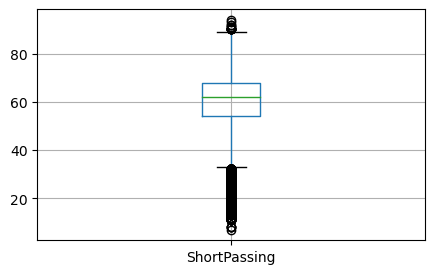

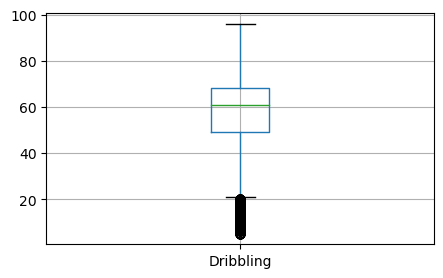

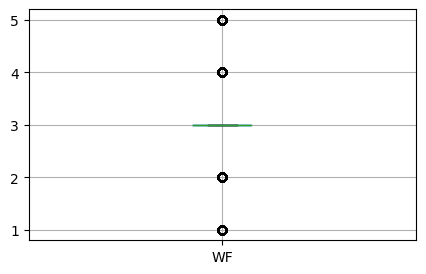

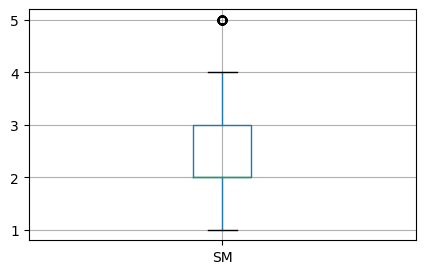

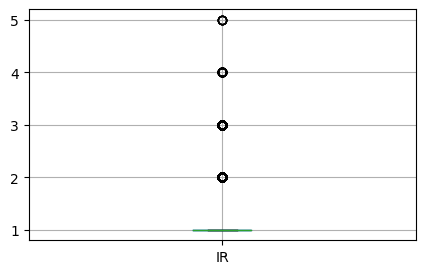

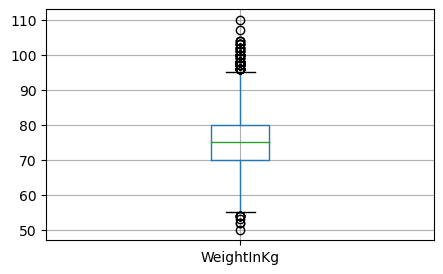

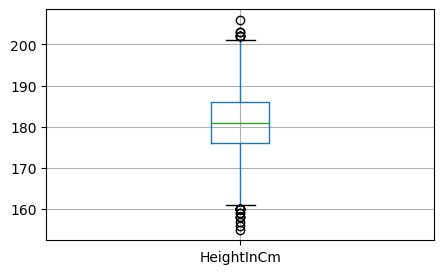

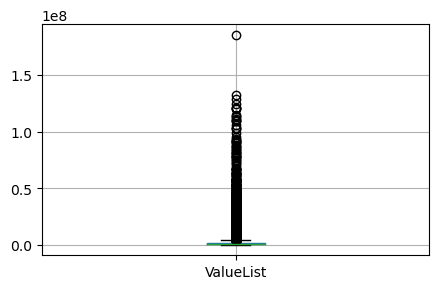

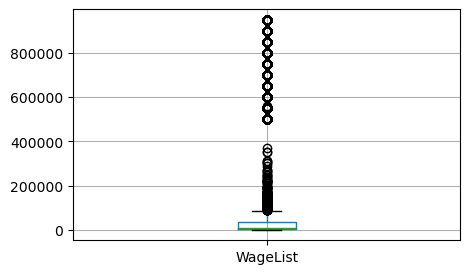

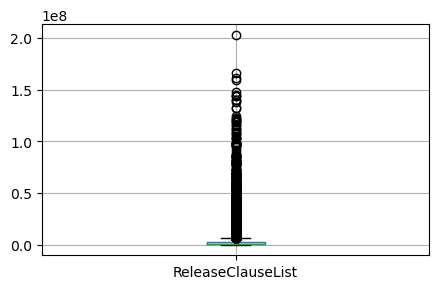

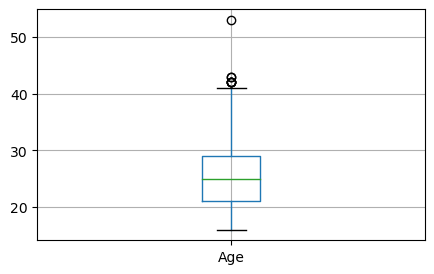

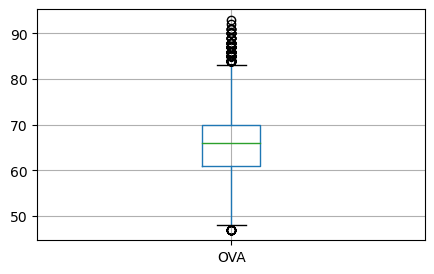

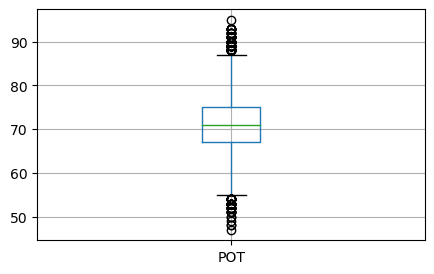

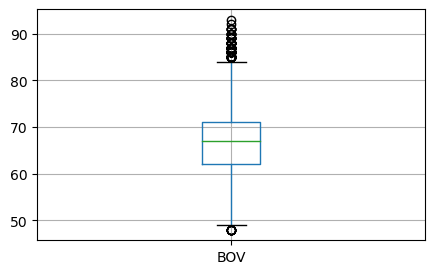

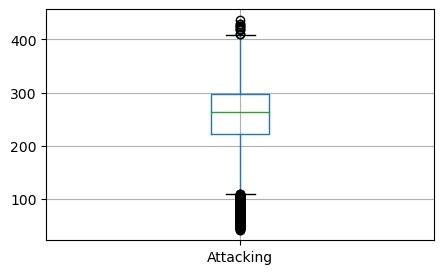

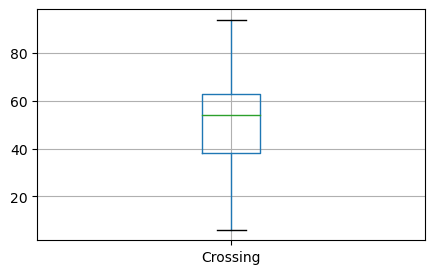

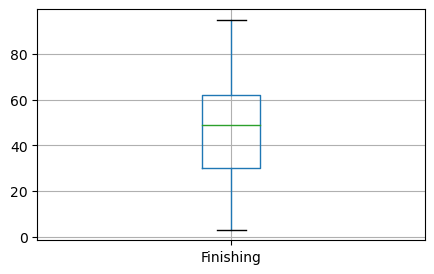

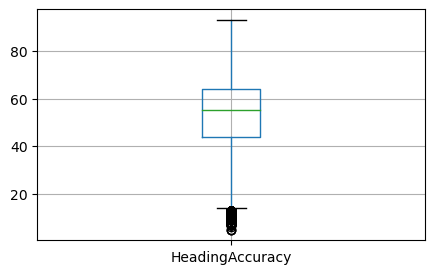

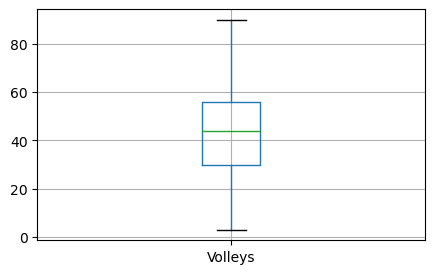

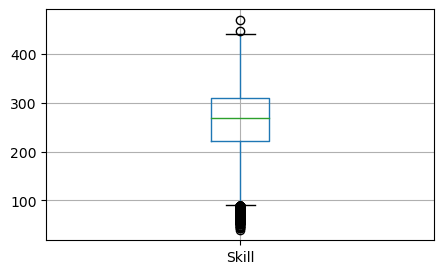

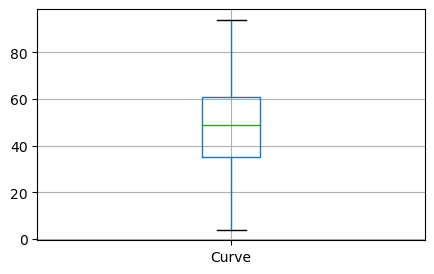

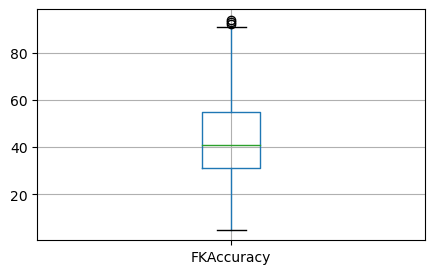

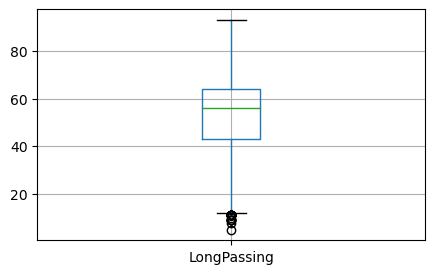

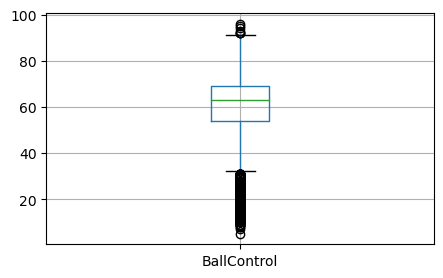

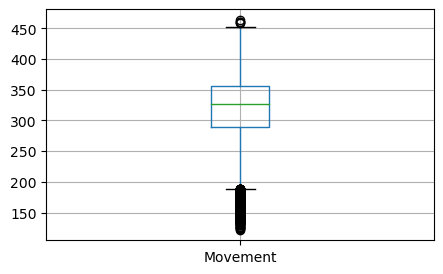

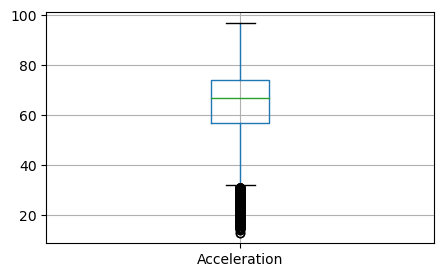

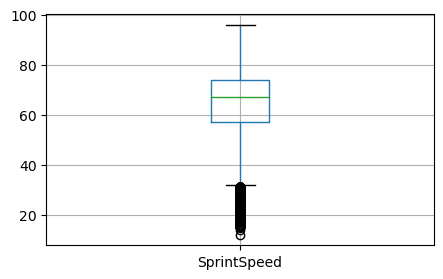

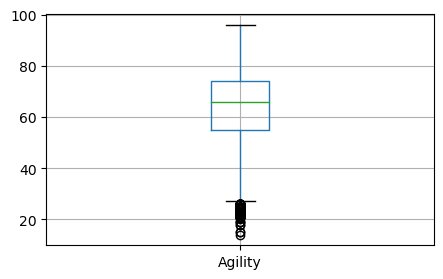

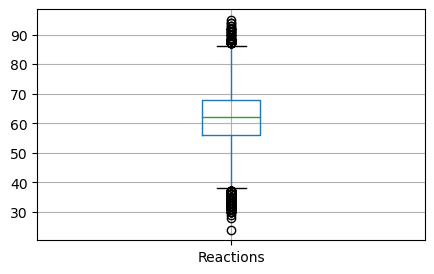

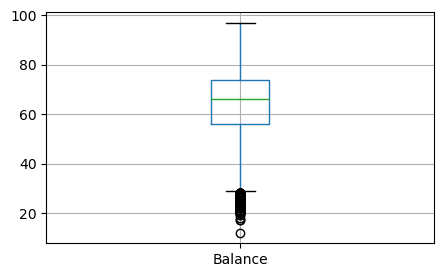

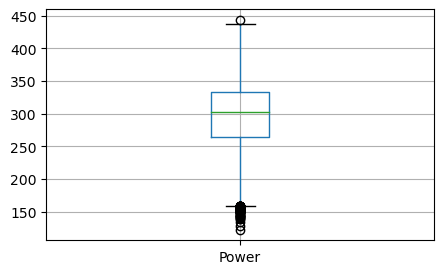

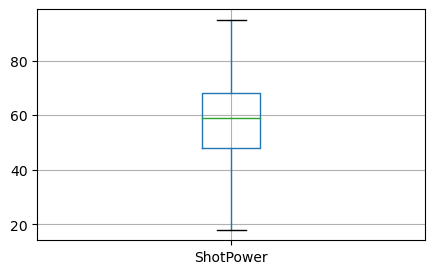

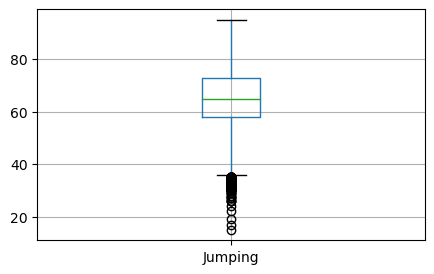

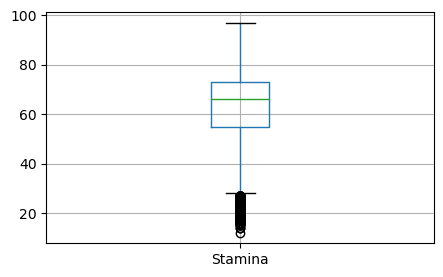

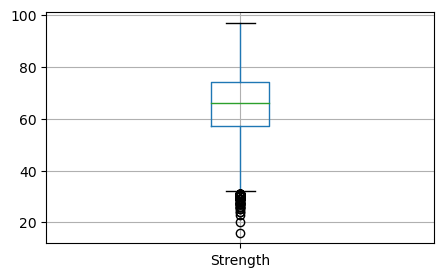

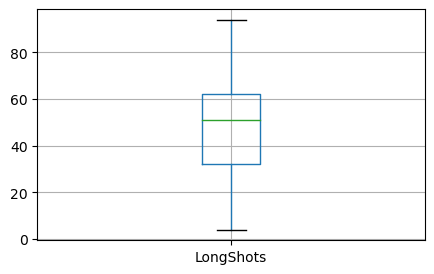

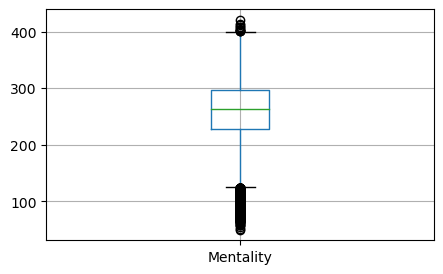

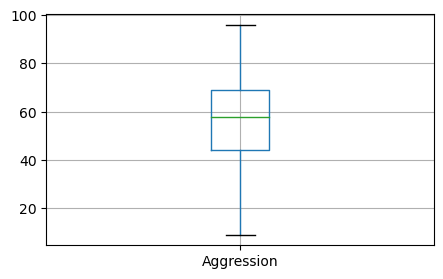

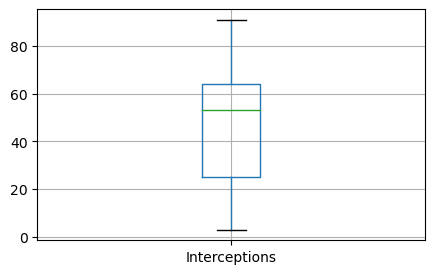

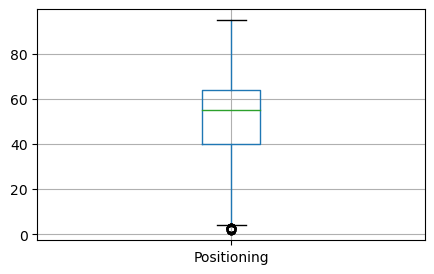

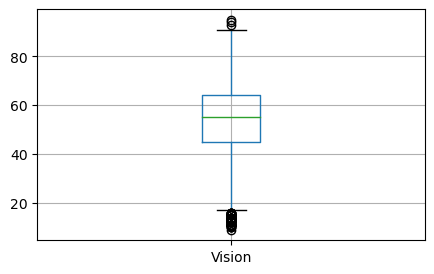

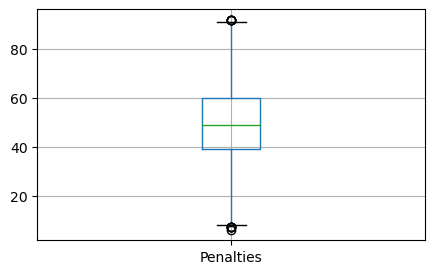

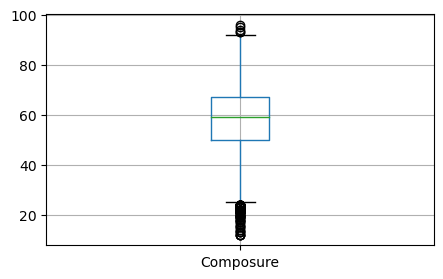

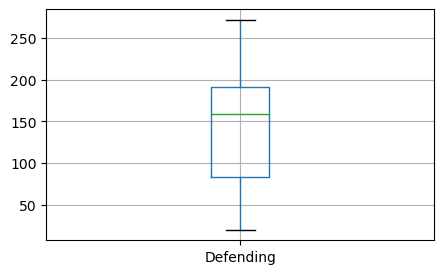

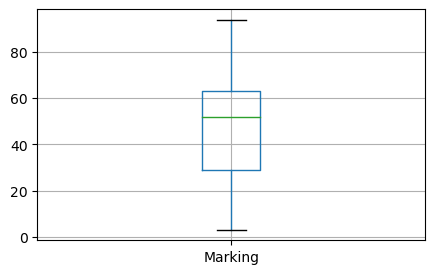

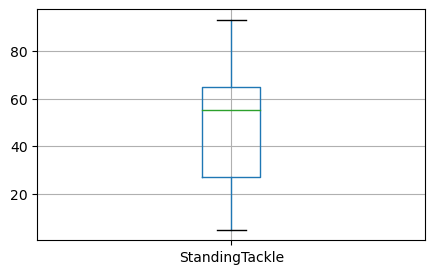

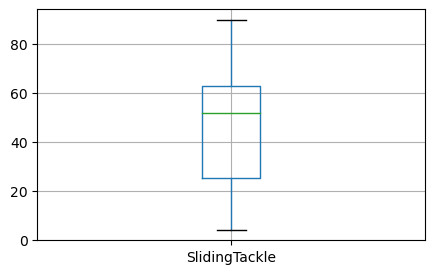

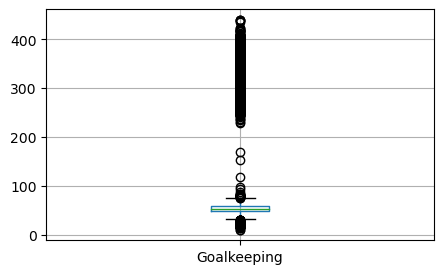

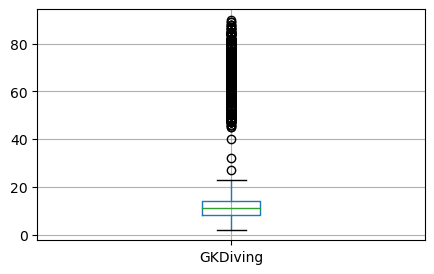

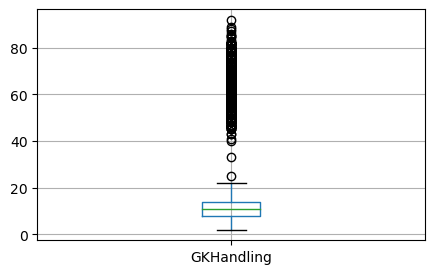

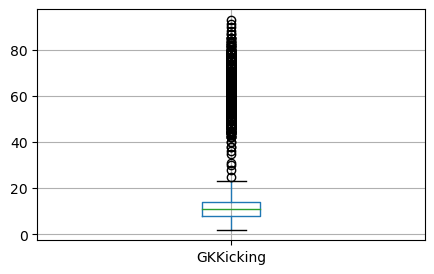

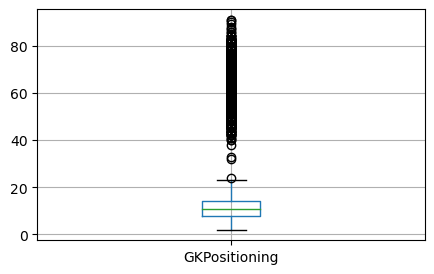

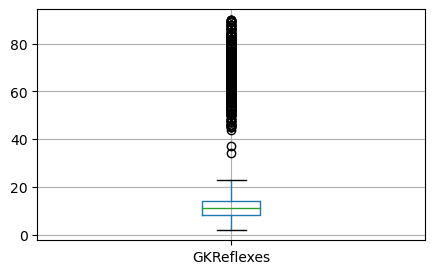

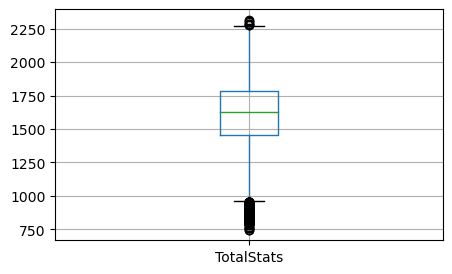

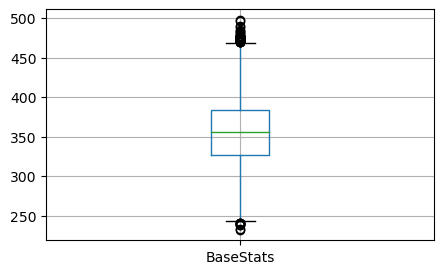

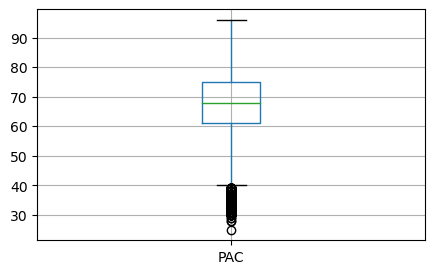

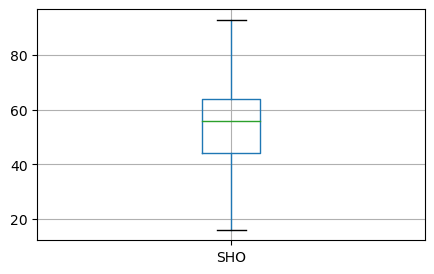

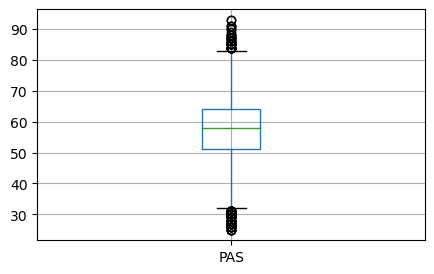

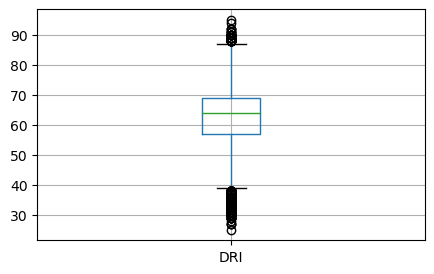

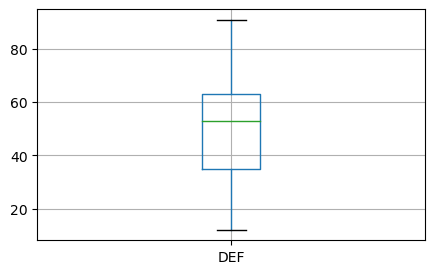

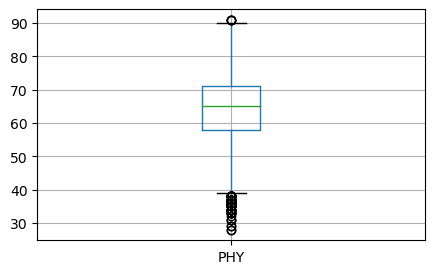

In [770]:
for variable in newDf.columns:
    plt.figure(figsize=(5,3))
    newDf.boxplot(column=variable)
    plt.show()

In [771]:
len(newDf.select_dtypes(['float64', 'int64', 'int32']).columns)

61

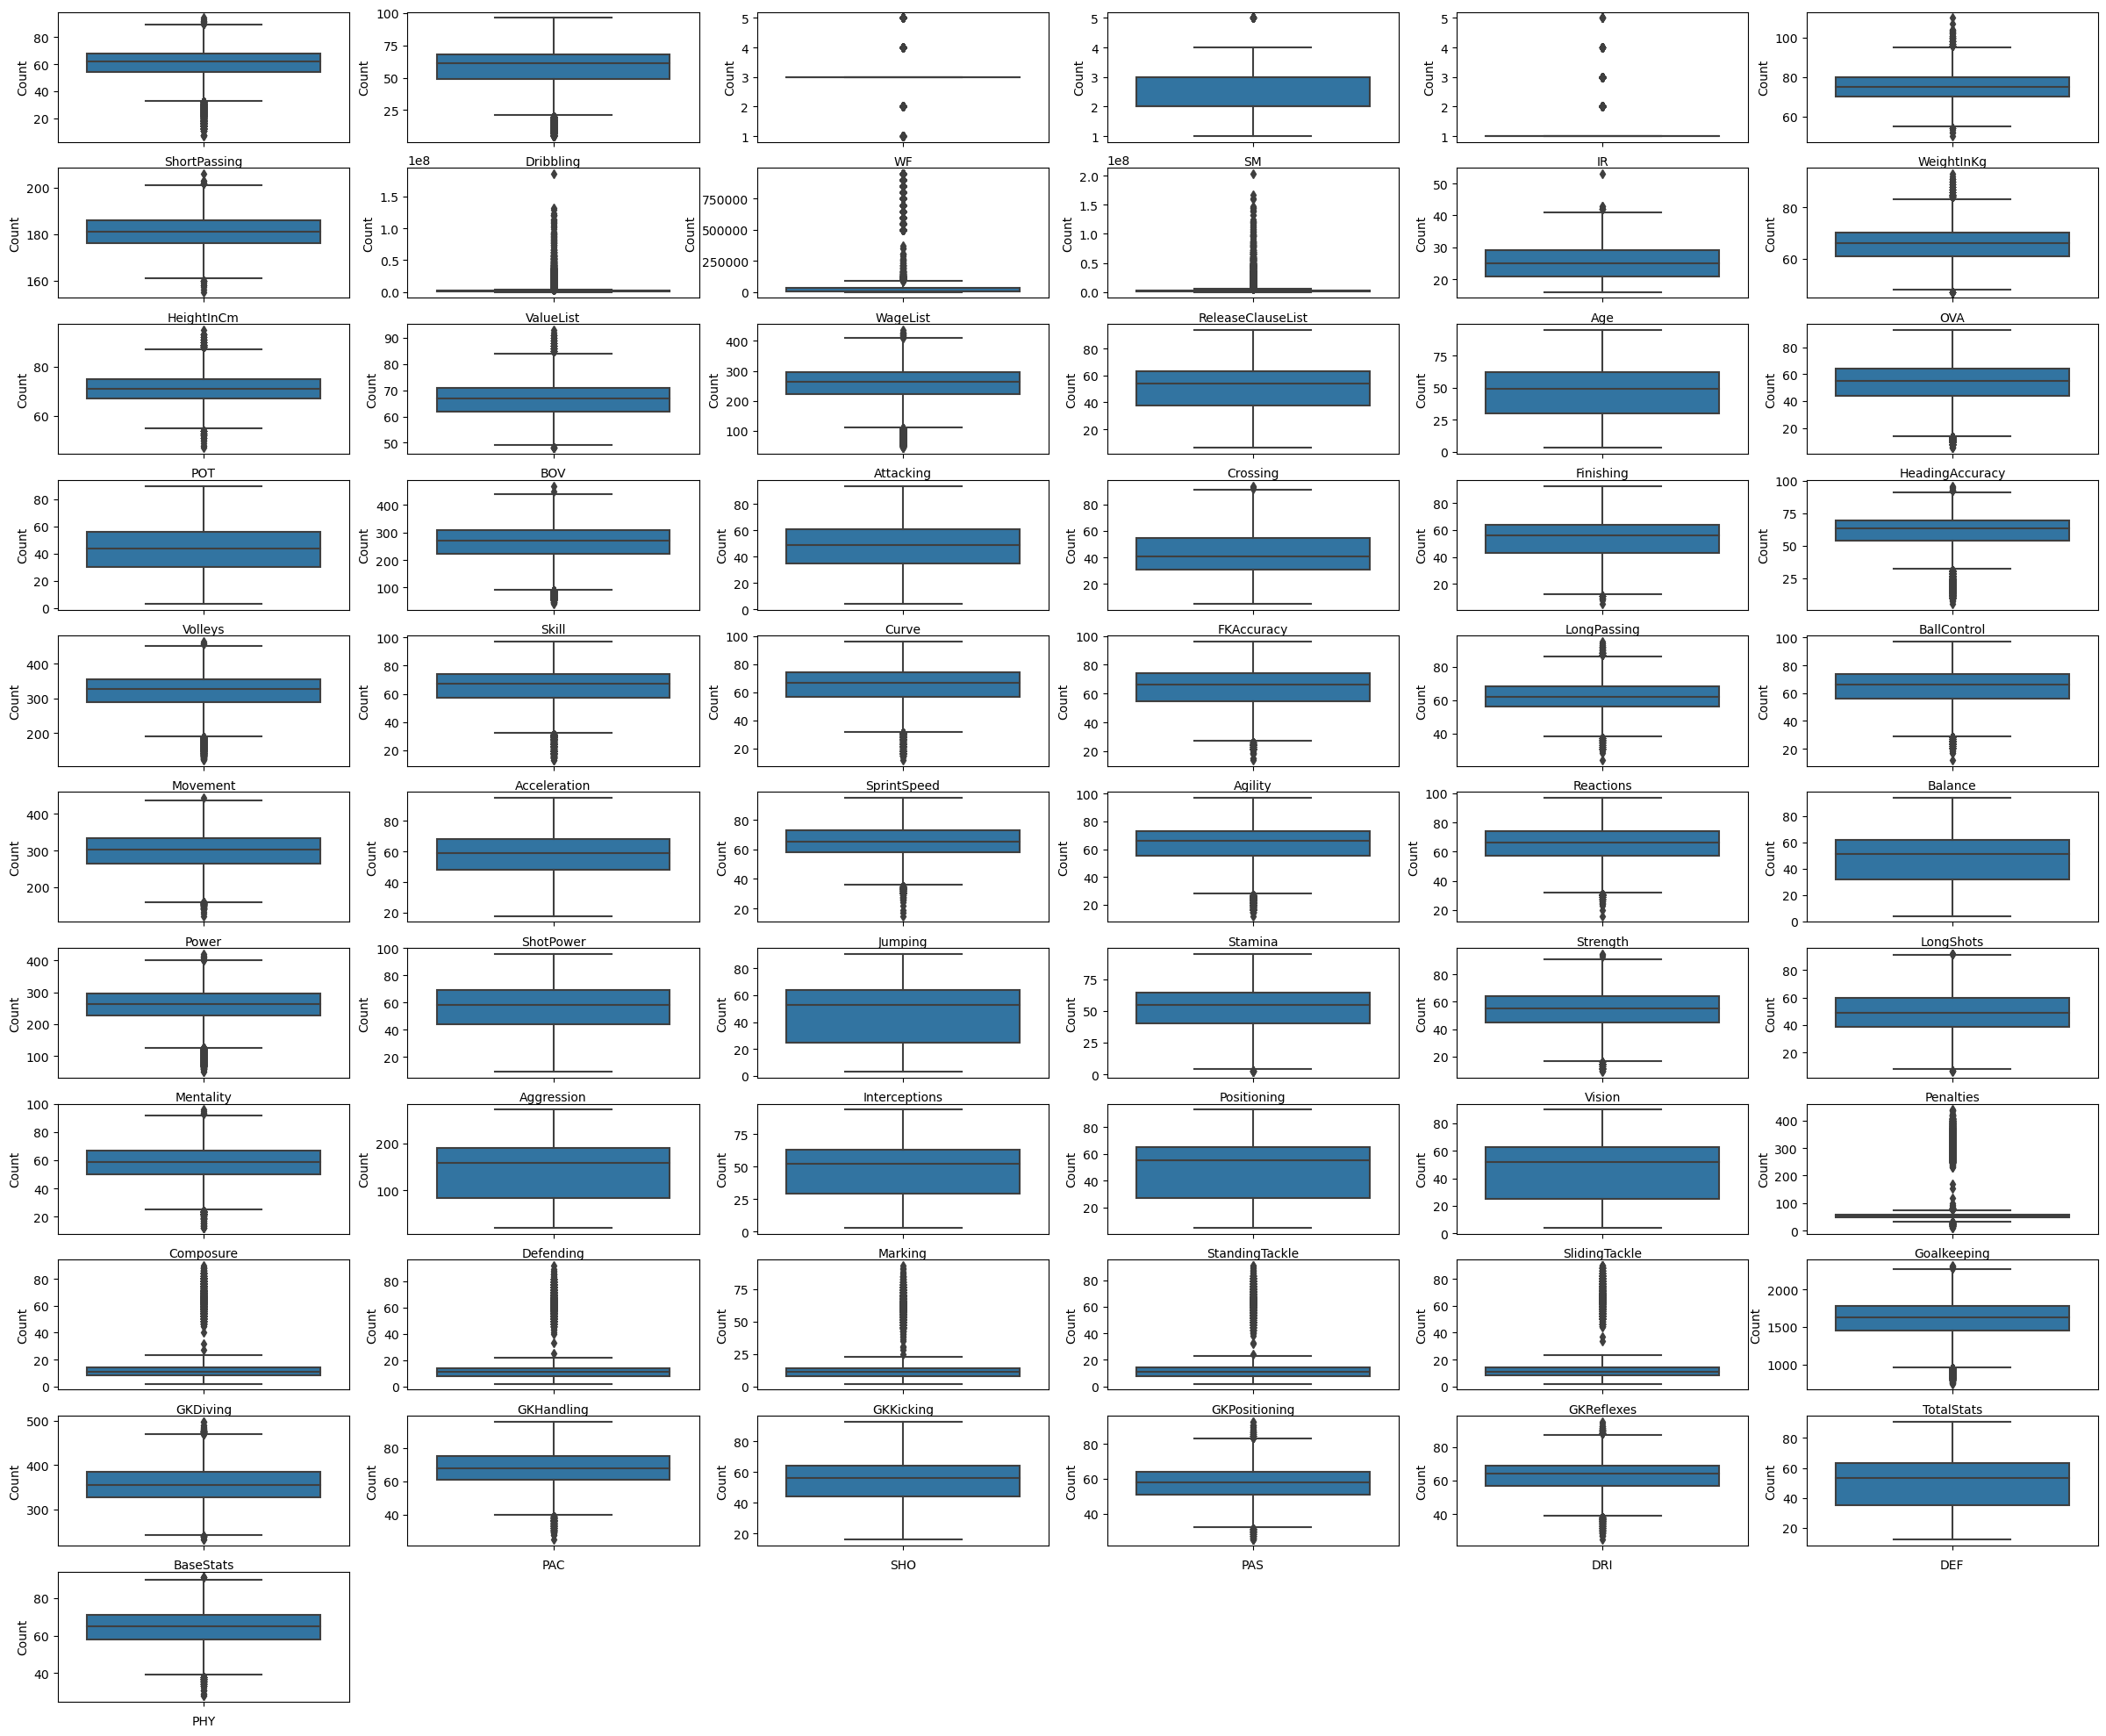

In [772]:
i = 1
plt.figure(figsize=(30, 25))
for col in newDf.columns:
    plt.subplot(11, 6, i)
    sns.boxplot(y=col, data=newDf)
    plt.xlabel(col)
    plt.ylabel("Count")
    i += 1

#### Outlier treatment using the interquatile range

In [773]:
# Inspecting the distribution of outliers in the data

def outlier_lims(col):
    q3,q1 = np.percentile(col, [75,25])
    iqr = q3-q1
    upper_lim = q3 + 1.5*iqr
    lower_lim = q1 - 1.5*iqr
    return upper_lim, lower_lim

for col in newDf.columns:
    print("------------------------------------------------")
    print("Column:", col)
    
    UL,LL = outlier_lims(newDf[col])
    print("Upper Limit =", UL)
    print("Lower Limit =", LL)
    
    total_outliers = len(newDf.loc[newDf[col]<LL,col]) + len(newDf.loc[newDf[col]>UL,col])
    percent = (total_outliers / len(newDf.index) )*100
    
    print("Percentage of Outliers=", percent)
    print("-----------------------------------------------\n")

------------------------------------------------
Column: ShortPassing
Upper Limit = 89.0
Lower Limit = 33.0
Percentage of Outliers= 9.204910690763475
-----------------------------------------------

------------------------------------------------
Column: Dribbling
Upper Limit = 96.5
Lower Limit = 20.5
Percentage of Outliers= 10.337741714526583
-----------------------------------------------

------------------------------------------------
Column: WF
Upper Limit = 3.0
Lower Limit = 3.0
Percentage of Outliers= 38.379261288792875
-----------------------------------------------

------------------------------------------------
Column: SM
Upper Limit = 4.5
Lower Limit = 0.5
Percentage of Outliers= 0.2897939828231203
-----------------------------------------------

------------------------------------------------
Column: IR
Upper Limit = 1.0
Lower Limit = 1.0
Percentage of Outliers= 7.113125032931135
-----------------------------------------------

-----------------------------------------

In [774]:
def treat_outliers_iqr(data_frame):
    for column in data_frame.columns:
        q1 = np.percentile(data_frame[column], 25)
        q3 = np.percentile(data_frame[column], 75)
        IQR = q3 - q1
        lower_bound = q1 - (1.5 * IQR)
        upper_bound = q3 + (1.5 * IQR)
        
        # Replace values outside the bounds with the bounds
        data_frame[column] = np.where(data_frame[column] < lower_bound, lower_bound, data_frame[column])
        data_frame[column] = np.where(data_frame[column] > upper_bound, upper_bound, data_frame[column])

# Call the function to treat outliers in newDf DataFrame
treat_outliers_iqr(newDf)

C:\Users\CHINELO\AppData\Local\Temp\ipykernel_5272\2083499736.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame[column] = np.where(data_frame[column] < lower_bound, lower_bound, data_frame[column])
C:\Users\CHINELO\AppData\Local\Temp\ipykernel_5272\2083499736.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame[column] = np.where(data_frame[column] > upper_bound, upper_bound, data_frame[column])
C:\Users\CHINELO\AppData\Local\Temp\ipykernel_5272\2083499736.py:10: SettingWithCopyWarn

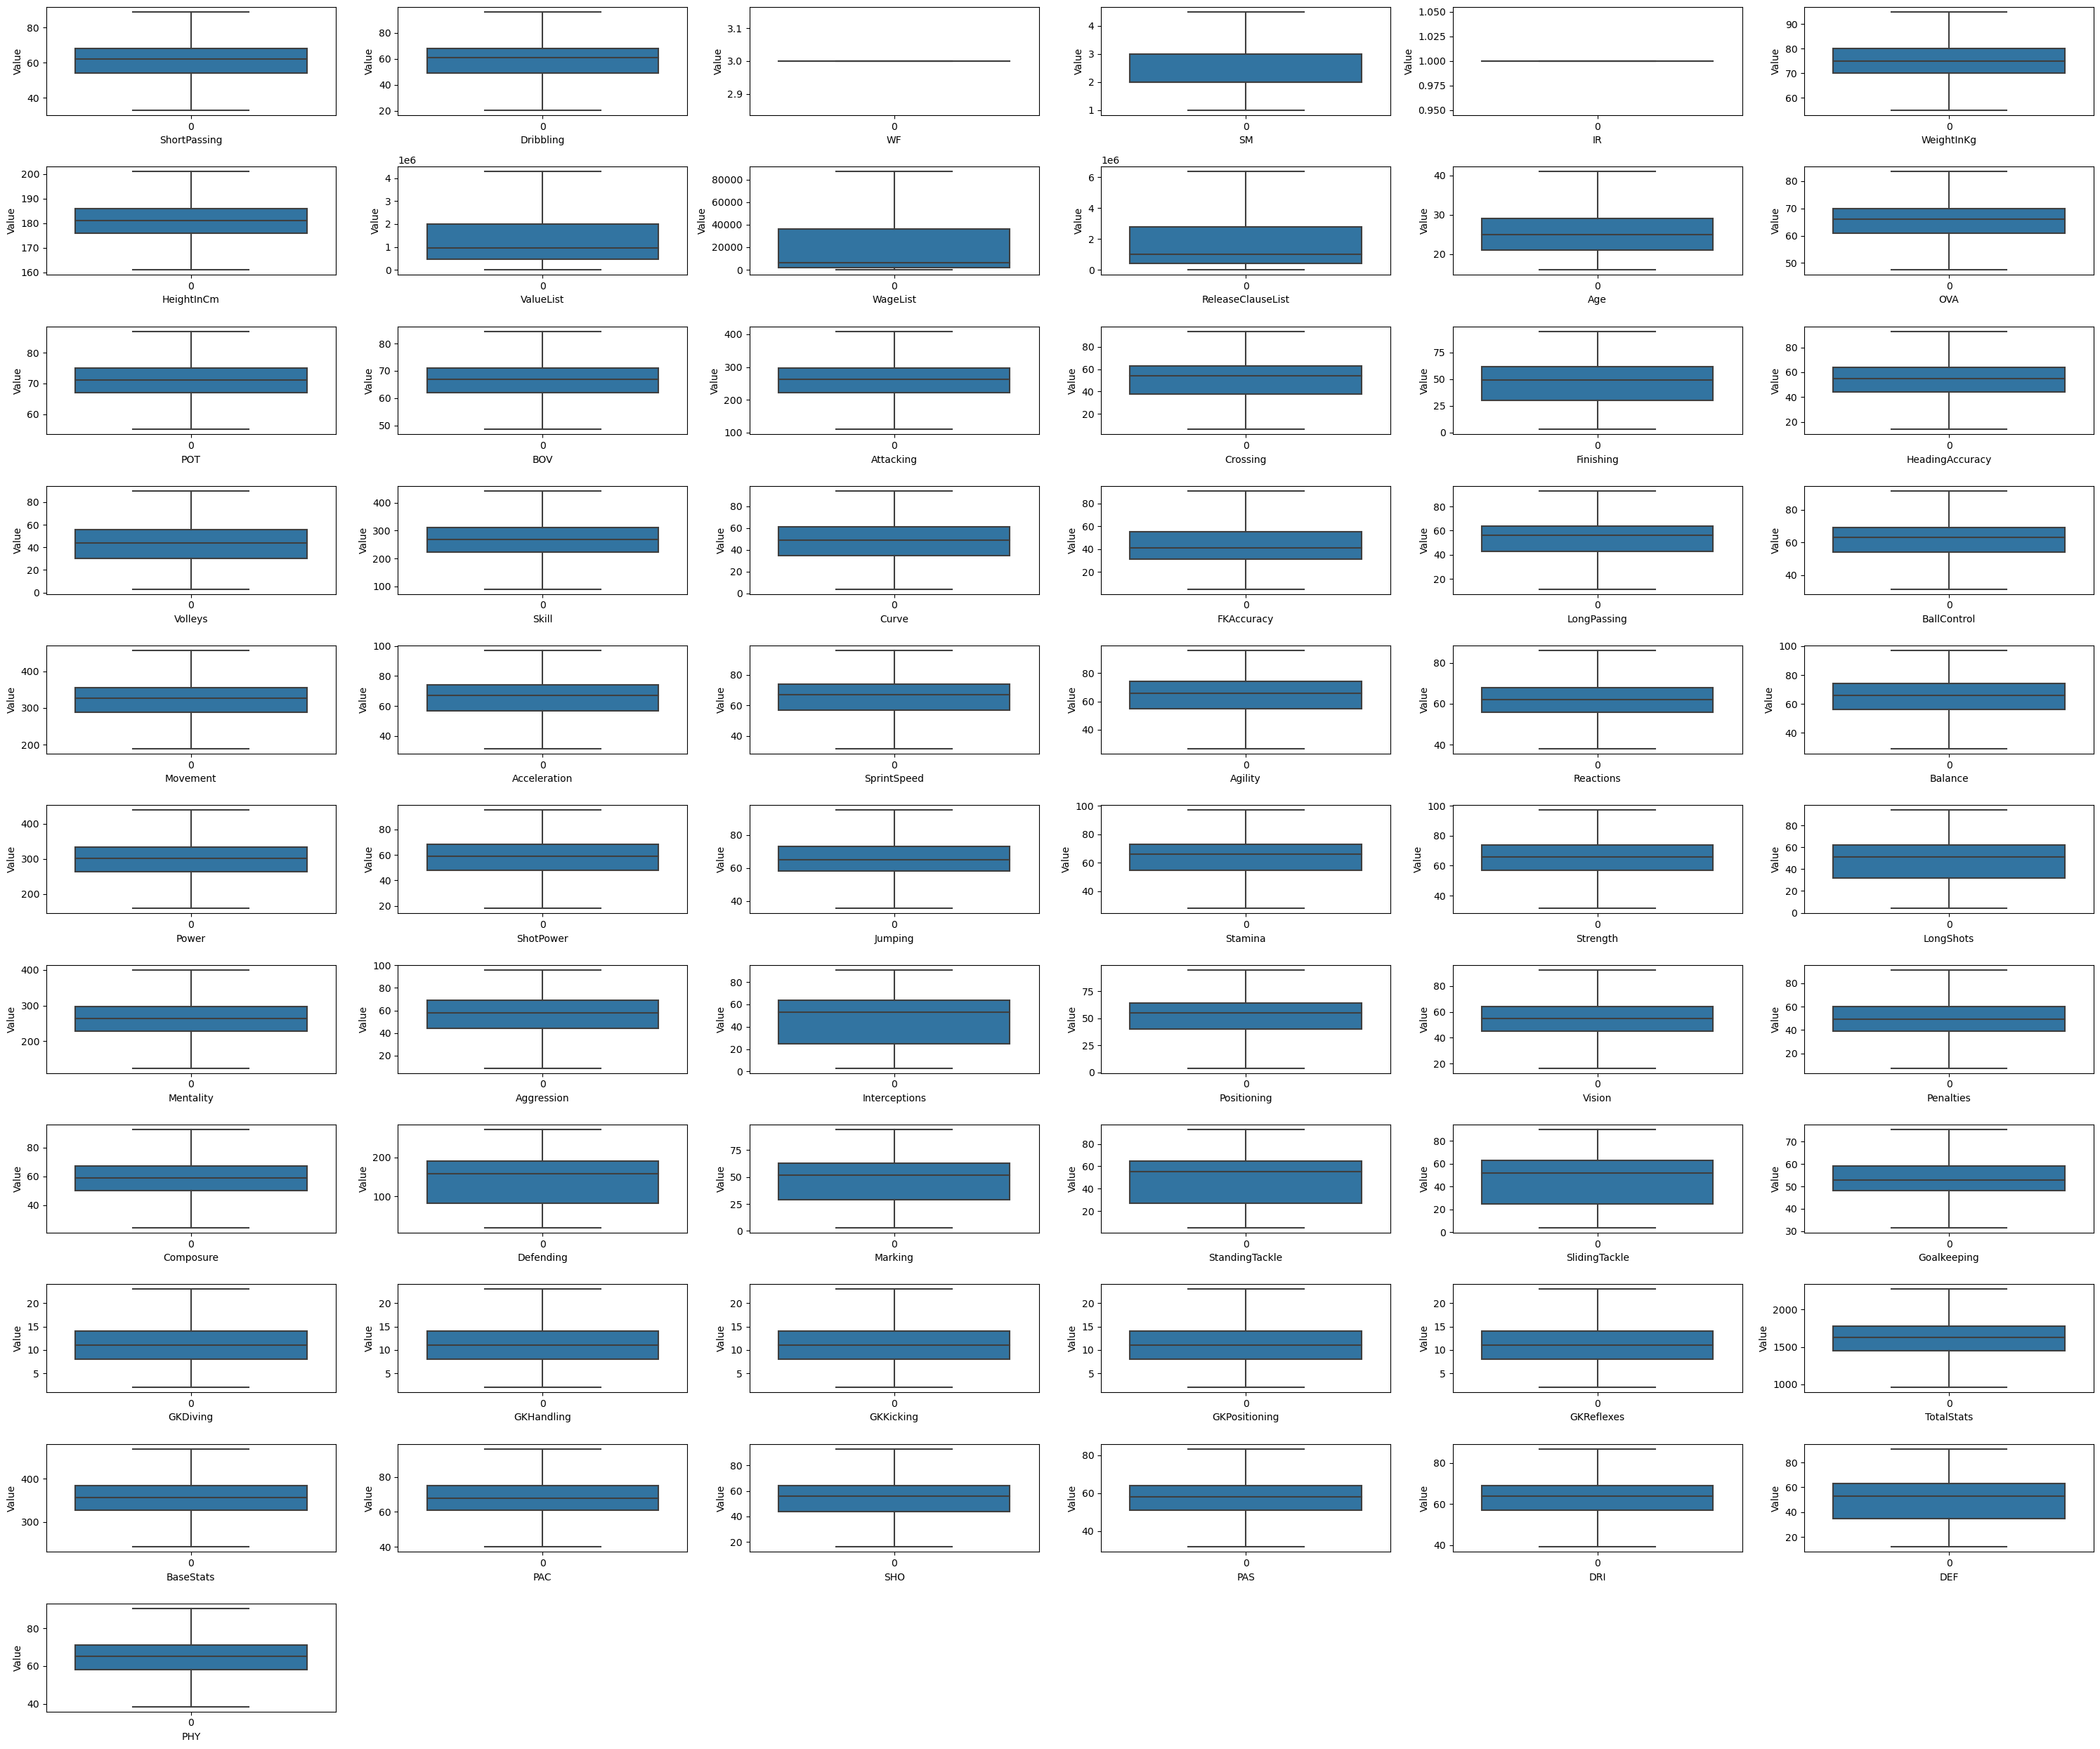

In [775]:
# Checking to confirm if the outliers were removed

plt.figure(figsize=(30, 25))
i = 1
for col in newDf.columns:
    plt.subplot(11, 6, i)
    sns.boxplot(data=newDf[col])
    plt.xlabel(col)
    plt.ylabel("Value")
    i += 1

plt.tight_layout()
plt.show()

In [776]:
# Bringing back the outcome variable into the dataset

newDf['HitsList'] = df_copy['HitsList']

In [777]:
newDf.columns

Index(['ShortPassing', 'Dribbling', 'WF', 'SM', 'IR', 'WeightInKg',
       'HeightInCm', 'ValueList', 'WageList', 'ReleaseClauseList', 'Age',
       'OVA', 'POT', 'BOV', 'Attacking', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'Volleys', 'Skill', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Movement', 'Acceleration', 'SprintSpeed',
       'Agility', 'Reactions', 'Balance', 'Power', 'ShotPower', 'Jumping',
       'Stamina', 'Strength', 'LongShots', 'Mentality', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Defending', 'Marking', 'StandingTackle', 'SlidingTackle',
       'Goalkeeping', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning',
       'GKReflexes', 'TotalStats', 'BaseStats', 'PAC', 'SHO', 'PAS', 'DRI',
       'DEF', 'PHY', 'HitsList'],
      dtype='object')

In [664]:
newDf['WageList'].unique()

array([87000., 82000., 55000., 58000., 81000., 34000., 59000., 65000.,
       56000., 71000., 18000., 75000., 47000., 20000., 84000., 86000.,
       74000., 78000., 27000., 68000., 85000., 25000., 46000., 83000.,
       54000., 79000., 43000., 49000., 45000., 38000., 41000., 39000.,
       23000., 51000., 50000., 30000., 14000., 69000., 31000., 64000.,
       53000., 35000., 21000., 28000., 17000., 33000., 70000., 32000.,
       26000., 40000., 76000., 72000., 48000., 36000., 29000., 60000.,
       16000., 37000., 24000., 52000.,     0., 62000., 73000., 63000.,
       19000.,  1000., 66000., 80000., 12000.,  2000., 42000., 13000.,
       57000., 77000., 61000., 22000., 67000., 44000., 15000., 11000.,
        8000., 10000.,  7000.,  6000.,  9000.,  5000.,  3000.,  4000.])

#### DATA PREPROCESSING

#### Feature Transformations

#### Binning for Height

In [778]:
max(newDf.HeightInCm)

201.0

In [779]:
min(newDf.HeightInCm)

161.0

In [780]:
Upperbands = []

count = 1

while count <= max(newDf['HeightInCm'])/10:
    Upperbands.append(10*count)
    count+=1

In [781]:
Upperbands

[10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200]

In [782]:
newDf['BinnedHeight'] = pd.cut(x=newDf['HeightInCm'], bins=Upperbands)

In [783]:
newDf.head()

,ShortPassing,Dribbling,WF,SM,IR,WeightInKg,HeightInCm,ValueList,WageList,ReleaseClauseList,Age,OVA,POT,BOV,Attacking,Crossing,Finishing,HeadingAccuracy,Volleys,Skill,Curve,FKAccuracy,LongPassing,BallControl,Movement,Acceleration,SprintSpeed,Agility,Reactions,Balance,Power,ShotPower,Jumping,Stamina,Strength,LongShots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,StandingTackle,SlidingTackle,Goalkeeping,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,TotalStats,BaseStats,PAC,SHO,PAS,DRI,DEF,PHY,HitsList,BinnedHeight
0,89.0,96,3.0,4.0,1.0,72.0,170.0,4287500.0,87000.0,6364750.0,33.0,83.5,87.0,84.5,409.5,85.0,95.0,70.0,88.0,442.0,93.0,91.0,91.0,91.5,451.0,91.0,80.0,91.0,86.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44.0,40.0,93.0,92.5,75.0,92.5,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8.0,2231.0,466.0,85.0,92.0,83.5,87.0,38.0,65.0,771.0,"(160, 170]"
1,82,88,3.0,4.5,1.0,83.0,187.0,4287500.0,87000.0,6364750.0,35.0,83.5,87.0,84.5,409.5,84.0,95.0,90.0,86.0,414.0,81.0,76.0,77.0,91.5,431.0,87.0,91.0,87.0,86.0,71.0,439.0,94.0,95.0,84.0,78.0,93.0,353.0,63.0,29.0,95.0,82.0,84.0,92.5,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11.0,2221.0,464.0,89.0,93.0,81.0,87.0,35.0,77.0,562.0,"(180, 190]"
2,43,20.5,3.0,1.0,1.0,87.0,188.0,4287500.0,87000.0,6364750.0,27.0,83.5,87.0,84.5,109.5,13.0,11.0,15.0,13.0,109.0,13.0,14.0,40.0,31.5,307.0,43.0,60.0,67.0,86.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34.0,19.0,11.0,65.0,11.0,68.0,57.0,27.0,12.0,18.0,75.5,23.0,23.0,23.0,23.0,23.0,1413.0,469.5,87.0,92.0,78.0,87.0,52.0,90.0,150.0,"(180, 190]"
3,89.0,88,3.0,4.0,1.0,70.0,181.0,4287500.0,87000.0,6364750.0,29.0,83.5,87.0,84.5,407.0,94.0,82.0,55.0,82.0,441.0,85.0,83.0,93.0,91.5,398.0,77.0,76.0,78.0,86.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,400.5,76.0,66.0,88.0,92.5,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13.0,2274.5,469.5,76.0,86.0,83.5,87.0,64.0,78.0,207.0,"(180, 190]"
4,87,95,3.0,4.5,1.0,68.0,175.0,4287500.0,87000.0,6364750.0,28.0,83.5,87.0,84.5,408.0,85.0,87.0,62.0,87.0,442.0,88.0,89.0,81.0,91.5,453.0,94.0,89.0,96.0,86.0,83.0,357.0,80.0,62.0,81.0,50.0,84.0,356.0,51.0,36.0,87.0,90.0,91.5,92.5,94.0,35.0,30.0,29.0,59.0,9.0,9.0,15.0,15.0,11.0,2175.0,451.0,91.0,85.0,83.5,87.0,36.0,59.0,595.0,"(170, 180]"


#### Binning for Weight

In [784]:
max(newDf.WeightInKg)

95.0

In [785]:
min(newDf.WeightInKg)

55.0

In [786]:
Upperbands = []

count = 1

while count <= max(newDf['WeightInKg'])/10:
    Upperbands.append(10*count)
    count+=1

In [787]:
Upperbands

[10, 20, 30, 40, 50, 60, 70, 80, 90]

In [788]:
newDf['BinnedWeight'] = pd.cut(x=newDf['WeightInKg'], bins=Upperbands)

In [789]:
newDf.head()

,ShortPassing,Dribbling,WF,SM,IR,WeightInKg,HeightInCm,ValueList,WageList,ReleaseClauseList,Age,OVA,POT,BOV,Attacking,Crossing,Finishing,HeadingAccuracy,Volleys,Skill,Curve,FKAccuracy,LongPassing,BallControl,Movement,Acceleration,SprintSpeed,Agility,Reactions,Balance,Power,ShotPower,Jumping,Stamina,Strength,LongShots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,StandingTackle,SlidingTackle,Goalkeeping,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,TotalStats,BaseStats,PAC,SHO,PAS,DRI,DEF,PHY,HitsList,BinnedHeight,BinnedWeight
0,89.0,96,3.0,4.0,1.0,72.0,170.0,4287500.0,87000.0,6364750.0,33.0,83.5,87.0,84.5,409.5,85.0,95.0,70.0,88.0,442.0,93.0,91.0,91.0,91.5,451.0,91.0,80.0,91.0,86.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44.0,40.0,93.0,92.5,75.0,92.5,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8.0,2231.0,466.0,85.0,92.0,83.5,87.0,38.0,65.0,771.0,"(160, 170]","(70, 80]"
1,82,88,3.0,4.5,1.0,83.0,187.0,4287500.0,87000.0,6364750.0,35.0,83.5,87.0,84.5,409.5,84.0,95.0,90.0,86.0,414.0,81.0,76.0,77.0,91.5,431.0,87.0,91.0,87.0,86.0,71.0,439.0,94.0,95.0,84.0,78.0,93.0,353.0,63.0,29.0,95.0,82.0,84.0,92.5,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11.0,2221.0,464.0,89.0,93.0,81.0,87.0,35.0,77.0,562.0,"(180, 190]","(80, 90]"
2,43,20.5,3.0,1.0,1.0,87.0,188.0,4287500.0,87000.0,6364750.0,27.0,83.5,87.0,84.5,109.5,13.0,11.0,15.0,13.0,109.0,13.0,14.0,40.0,31.5,307.0,43.0,60.0,67.0,86.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34.0,19.0,11.0,65.0,11.0,68.0,57.0,27.0,12.0,18.0,75.5,23.0,23.0,23.0,23.0,23.0,1413.0,469.5,87.0,92.0,78.0,87.0,52.0,90.0,150.0,"(180, 190]","(80, 90]"
3,89.0,88,3.0,4.0,1.0,70.0,181.0,4287500.0,87000.0,6364750.0,29.0,83.5,87.0,84.5,407.0,94.0,82.0,55.0,82.0,441.0,85.0,83.0,93.0,91.5,398.0,77.0,76.0,78.0,86.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,400.5,76.0,66.0,88.0,92.5,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13.0,2274.5,469.5,76.0,86.0,83.5,87.0,64.0,78.0,207.0,"(180, 190]","(60, 70]"
4,87,95,3.0,4.5,1.0,68.0,175.0,4287500.0,87000.0,6364750.0,28.0,83.5,87.0,84.5,408.0,85.0,87.0,62.0,87.0,442.0,88.0,89.0,81.0,91.5,453.0,94.0,89.0,96.0,86.0,83.0,357.0,80.0,62.0,81.0,50.0,84.0,356.0,51.0,36.0,87.0,90.0,91.5,92.5,94.0,35.0,30.0,29.0,59.0,9.0,9.0,15.0,15.0,11.0,2175.0,451.0,91.0,85.0,83.5,87.0,36.0,59.0,595.0,"(170, 180]","(60, 70]"


In [790]:
newDf['WageList'].unique()

array([87000., 82000., 55000., 58000., 81000., 34000., 59000., 65000.,
       56000., 71000., 18000., 75000., 47000., 20000., 84000., 86000.,
       74000., 78000., 27000., 68000., 85000., 25000., 46000., 83000.,
       54000., 79000., 43000., 49000., 45000., 38000., 41000., 39000.,
       23000., 51000., 50000., 30000., 14000., 69000., 31000., 64000.,
       53000., 35000., 21000., 28000., 17000., 33000., 70000., 32000.,
       26000., 40000., 76000., 72000., 48000., 36000., 29000., 60000.,
       16000., 37000., 24000., 52000.,     0., 62000., 73000., 63000.,
       19000.,  1000., 66000., 80000., 12000.,  2000., 42000., 13000.,
       57000., 77000., 61000., 22000., 67000., 44000., 15000., 11000.,
        8000., 10000.,  7000.,  6000.,  9000.,  5000.,  3000.,  4000.])

#### Binning for Wage

In [791]:
max(newDf.WageList)

87000.0

In [792]:
min(newDf.WageList)

0.0

In [801]:
Upperbands = []

count = 1

while count <= max(newDf['WageList'])/50000:
    Upperbands.append(50000*count)
    count+=1

In [802]:
Upperbands

[50000]

In [662]:
newDf['BinnedWage'] = pd.cut(x=newDf['WageList'], bins=Upperbands)

In [663]:
newDf.head()

,ShortPassing,Dribbling,WF,SM,IR,WeightInKg,HeightInCm,ValueList,WageList,ReleaseClauseList,Age,OVA,POT,BOV,Attacking,Crossing,Finishing,HeadingAccuracy,Volleys,Skill,Curve,FKAccuracy,LongPassing,BallControl,Movement,Acceleration,SprintSpeed,Agility,Reactions,Balance,Power,ShotPower,Jumping,Stamina,Strength,LongShots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,StandingTackle,SlidingTackle,Goalkeeping,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,TotalStats,BaseStats,PAC,SHO,PAS,DRI,DEF,PHY,HitsList,BinnedHeight,BinnedWeight,BinnedWage
0,89.0,96,3.0,4.0,1.0,72.0,170.0,4287500.0,87000.0,6364750.0,33.0,83.5,87.0,84.5,409.5,85.0,95.0,70.0,88.0,442.0,93.0,91.0,91.0,91.5,451.0,91.0,80.0,91.0,86.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44.0,40.0,93.0,92.5,75.0,92.5,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8.0,2231.0,466.0,85.0,92.0,83.5,87.0,38.0,65.0,771.0,"(160, 170]","(70, 80]",NaN
1,82,88,3.0,4.5,1.0,83.0,187.0,4287500.0,87000.0,6364750.0,35.0,83.5,87.0,84.5,409.5,84.0,95.0,90.0,86.0,414.0,81.0,76.0,77.0,91.5,431.0,87.0,91.0,87.0,86.0,71.0,439.0,94.0,95.0,84.0,78.0,93.0,353.0,63.0,29.0,95.0,82.0,84.0,92.5,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11.0,2221.0,464.0,89.0,93.0,81.0,87.0,35.0,77.0,562.0,"(180, 190]","(80, 90]",NaN
2,43,20.5,3.0,1.0,1.0,87.0,188.0,4287500.0,87000.0,6364750.0,27.0,83.5,87.0,84.5,109.5,13.0,11.0,15.0,13.0,109.0,13.0,14.0,40.0,31.5,307.0,43.0,60.0,67.0,86.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34.0,19.0,11.0,65.0,11.0,68.0,57.0,27.0,12.0,18.0,75.5,23.0,23.0,23.0,23.0,23.0,1413.0,469.5,87.0,92.0,78.0,87.0,52.0,90.0,150.0,"(180, 190]","(80, 90]",NaN
3,89.0,88,3.0,4.0,1.0,70.0,181.0,4287500.0,87000.0,6364750.0,29.0,83.5,87.0,84.5,407.0,94.0,82.0,55.0,82.0,441.0,85.0,83.0,93.0,91.5,398.0,77.0,76.0,78.0,86.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,400.5,76.0,66.0,88.0,92.5,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13.0,2274.5,469.5,76.0,86.0,83.5,87.0,64.0,78.0,207.0,"(180, 190]","(60, 70]",NaN
4,87,95,3.0,4.5,1.0,68.0,175.0,4287500.0,87000.0,6364750.0,28.0,83.5,87.0,84.5,408.0,85.0,87.0,62.0,87.0,442.0,88.0,89.0,81.0,91.5,453.0,94.0,89.0,96.0,86.0,83.0,357.0,80.0,62.0,81.0,50.0,84.0,356.0,51.0,36.0,87.0,90.0,91.5,92.5,94.0,35.0,30.0,29.0,59.0,9.0,9.0,15.0,15.0,11.0,2175.0,451.0,91.0,85.0,83.5,87.0,36.0,59.0,595.0,"(170, 180]","(60, 70]",NaN


In [241]:
# Understanding the size of data points in the HeightInCm column

max_height_in_cm = newDf['HeightInCm'].max()

print('Maximum height in the HeightInCm attribute is:', max_height_in_cm)

min_height_in_cm = newDf['HeightInCm'].min()

print('\n')
print('Minimum height in the HeightInCm attribute is:', min_height_in_cm)

print('\n')
# Range of numbers in the HeightInCm feature
print('The range of values in the HeightInCm attribute is:', max_height_in_cm - min_height_in_cm)

Maximum height in the HeightInCm attribute is: 206.0


Minimum height in the HeightInCm attribute is: 155.0


The range of values in the HeightInCm attribute is: 51.0


#### 5 bins can be created here, using the interval of 10

In [242]:
# Understanding the size of data points in the WeightInKg column

max_weight_in_kg = newDf['WeightInKg'].max()

print('Maximum height in the WeightInKg attribute is:', max_weight_in_kg)

min_weight_in_kg = newDf['WeightInKg'].min()

print('\n')
print('Minimum height in the WeightInKg attribute is:', min_weight_in_kg)

print('\n')
# Range of numbers in the WeightInKg feature
print('The range of values in the WeightInKg attribute is:', max_weight_in_kg - min_weight_in_kg)

Maximum height in the WeightInKg attribute is: 110.0


Minimum height in the WeightInKg attribute is: 50.0


The range of values in the WeightInKg attribute is: 60.0


#### 6 bins can be created here using the interval of 10

In [243]:
# Understanding the size of data points in the WageList column

max_wage_list = newDf['WageList'].max()

print('Maximum wage in the WageList attribute is:', max_wage_list)

min_wage_list = newDf['WageList'].min()

print('\n')
print('Minimum wage in the WageList attribute is:', min_wage_list)

print('\n')
# Range of numbers in the WeightInKg feature
print('The range of values in the WageList attribute is:', max_wage_list - min_wage_list)

Maximum wage in the WageList attribute is: 950000.0


Minimum wage in the WageList attribute is: 0.0


The range of values in the WageList attribute is: 950000.0


#### 19 bins can be created here using the interval of 50000

In [244]:
# Understanding the size of data points in the ValueList column

max_value_list = newDf['ValueList'].max()

print('Maximum value in the ValueList attribute is:', max_value_list)

min_value_list = newDf['ValueList'].min()

print('\n')
print('Minimum value in the ValueList attribute is:', min_value_list)

print('\n')
# Range of numbers in the WeightInKg feature
print('The range of values in the ValueList attribute is:', max_value_list - min_value_list)

Maximum value in the ValueList attribute is: 185500000.0


Minimum value in the ValueList attribute is: 0.0


The range of values in the ValueList attribute is: 185500000.0


#### 4 bins can be created here using interval of 50000000

In [245]:
# Understanding the size of data points in the ReleaseClauseList column

max_release_clause_list = newDf['ReleaseClauseList'].max()

print('Maximum value in the ReleaseClauseList attribute is:', max_release_clause_list)

min_release_clause_list = newDf['ReleaseClauseList'].min()

print('\n')
print('Minimum value in the ReleaseClauseList attribute is:', min_release_clause_list)

print('\n')
# Range of numbers in the WeightInKg feature
print('The range of values in the ReleaseClauseList attribute is:', max_release_clause_list - min_release_clause_list)

Maximum value in the ReleaseClauseList attribute is: 203100000.0


Minimum value in the ReleaseClauseList attribute is: 0.0


The range of values in the ReleaseClauseList attribute is: 203100000.0


#### 4 bins can be created here using interval of 50000000

#### Handling the numerical features above with binning process to create the required clusters

In [246]:
# Binning the HeightInCm attribute
newDf['BinnedHeight'] = pd.cut(
newDf['HeightInCm'],
bins=5,
labels=['very short', 'short', 'average', 'tall', 'very tall'])

# Binning for WeightInKg attribute
newDf['BinnedWeight'] = pd.cut(
newDf['WeightInKg'],
bins=6,
labels=['lightweight', 'featherweight', 'middleweight', 'heavyweight', 'super heavyweight', 'ultra heavyweight'])

# Binning for WageList attribute
newDf['BinnedWage'] = pd.cut(
newDf['WageList'],
bins=19,
labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S'])

# Binning for ValueList attribute
newDf['BinnedValue'] = pd.cut(
newDf['ValueList'],
bins=4,
labels=['low', 'medium', 'high', 'very high'])

# Binning for ReleaseClauseList attribute
newDf['BinnedReleaseClause'] = pd.cut(
newDf['ReleaseClauseList'],
bins=4,
labels=['low', 'moderate', 'high', 'very high'])

In [247]:
# Inspecting the binning process
newDf.head(10)

,ShortPassing,Dribbling,WF,SM,IR,WeightInKg,HeightInCm,ValueList,WageList,ReleaseClauseList,Age,OVA,POT,BOV,Attacking,Crossing,Finishing,HeadingAccuracy,Volleys,Skill,Curve,FKAccuracy,LongPassing,BallControl,Movement,Acceleration,SprintSpeed,Agility,Reactions,Balance,Power,ShotPower,Jumping,Stamina,Strength,LongShots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,StandingTackle,SlidingTackle,Goalkeeping,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,TotalStats,BaseStats,PAC,SHO,PAS,DRI,DEF,PHY,BinnedHeight,BinnedWeight,BinnedWage,BinnedValue,BinnedReleaseClause
0,91,96,4,4,5,72.0,170.0,103500000.0,560000.0,138400000.0,33,93.0,93.0,93,429.0,85.0,95.0,70.0,88.0,470.0,93.0,94.0,91.0,96.0,451.0,91.0,80.0,91.0,94.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44,40.0,93.0,95,75.0,96.0,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8,2231.0,466,85.0,92.0,91.0,95.0,38.0,65.0,short,middleweight,L,high,high
1,82,88,4,5,5,83.0,187.0,63000000.0,220000.0,75900000.0,35,92.0,92.0,92,437.0,84.0,95.0,90.0,86.0,414.0,81.0,76.0,77.0,92.0,431.0,87.0,91.0,87.0,95.0,71.0,444.0,94.0,95.0,84.0,78.0,93.0,353.0,63,29.0,95.0,82,84.0,95.0,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11,2221.0,464,89.0,93.0,81.0,89.0,35.0,77.0,tall,heavyweight,E,medium,moderate
2,43,12,3,1,3,87.0,188.0,120000000.0,125000.0,159400000.0,27,91.0,93.0,91,95.0,13.0,11.0,15.0,13.0,109.0,13.0,14.0,40.0,30.0,307.0,43.0,60.0,67.0,88.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34,19.0,11.0,65,11.0,68.0,57.0,27.0,12.0,18.0,437.0,87.0,92.0,78.0,90.0,90,1413.0,489,87.0,92.0,78.0,90.0,52.0,90.0,tall,heavyweight,C,high,very high
3,94,88,5,4,4,70.0,181.0,129000000.0,370000.0,161000000.0,29,91.0,91.0,91,407.0,94.0,82.0,55.0,82.0,441.0,85.0,83.0,93.0,92.0,398.0,77.0,76.0,78.0,91.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,408.0,76,66.0,88.0,94,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13,2304.0,485,76.0,86.0,93.0,88.0,64.0,78.0,average,featherweight,H,high,very high
4,87,95,5,5,5,68.0,175.0,132000000.0,270000.0,166500000.0,28,91.0,91.0,91,408.0,85.0,87.0,62.0,87.0,448.0,88.0,89.0,81.0,95.0,453.0,94.0,89.0,96.0,91.0,83.0,357.0,80.0,62.0,81.0,50.0,84.0,356.0,51,36.0,87.0,90,92.0,93.0,94.0,35.0,30.0,29.0,59.0,9.0,9.0,15.0,15.0,11,2175.0,451,91.0,85.0,86.0,94.0,36.0,59.0,short,featherweight,F,high,very high
5,84,85,4,4,4,80.0,184.0,111000000.0,240000.0,132000000.0,31,91.0,91.0,91,423.0,71.0,94.0,85.0,89.0,407.0,79.0,85.0,70.0,88.0,407.0,77.0,78.0,77.0,93.0,82.0,420.0,89.0,84.0,76.0,86.0,85.0,391.0,81,49.0,94.0,79,88.0,88.0,96.0,35.0,42.0,19.0,51.0,15.0,6.0,12.0,8.0,10,2195.0,457,78.0,91.0,78.0,85.0,43.0,82.0,average,middleweight,E,high,high
6,84,90,3,4,3,71.0,175.0,120500000.0,250000.0,144300000.0,28,90.0,90.0,90,392.0,79.0,91.0,59.0,79.0,406.0,83.0,69.0,75.0,89.0,460.0,94.0,92.0,91.0,92.0,91.0,393.0,80.0,69.0,85.0,75.0,84.0,376.0,63,55.0,91.0,84,83.0,90.0,122.0,38.0,43.0,41.0,62.0,14.0,14.0,9.0,11.0,14,2211.0,470,93.0,86.0,81.0,90.0,45.0,75.0,short,middleweight,E,high,high
7,45,27,3,1,3,91.0,191.0,102000000.0,160000.0,120300000.0,27,90.0,91.0,90,114.0,17.0,13.0,19.0,20.0,138.0,19.0,18.0,44.0,30.0,268.0,56.0,47.0,40.0,88.0,37.0,240.0,64.0,52.0,32.0,78.0,14.0,140.0,27,11.0,13.0,66,23.0,65.0,50.0,15.0,19.0,16.0,439.0,86.0,88.0,85.0,91.0,89,1389.0,490,86.0,88.0,85.0,89.0,51.0,91.0,tall,super heavyweight,D,high,high
8,83,92,4,5,3,73.0,178.0,185500000.0,160000.0,203100000.0,21,90.0,95.0,91,408.0,78.0,91.0,73.0,83.0,394.0,79.0,63.0,70.0,90.0,458.0,96.0,96.0,92.0,92.0,82.0,404.0,86.0,77.0,86.0,76.0,79.0,341.0,62,38.0,91.0,80,70.0,84.0,100.0,34.0,34.0,32.0,42.0,13.0,5.0,7.0,11.0,6,2147.0,466,96.0,86.0,78.0,91.0,39.0,76.0,average,middleweight,D,very high,very high
9,61,21,4,1,3,85.0,187.0,110000000.0,260000.0,147700000.0,28,90.0,93.0,90,118.0,18.0,14.0,11.0,14.0,144.0,18.0,12.0,63.0,30.0,254.0,38.0,50.0,37.0,86.0,43.0,268.0,66.0,79.0,35.0,78.0,10.0,171.0,43,22.0,11.0,70,25.0,70.0,48.0,25.0,13.0,10.0,439.0,88.0,85.0,88.0,88.0,90,1442.0,484,88.0,85.0,

#### Merging the categorical and numerical features

In [248]:
df2 = pd.concat([cat_vars, bool_vars, newDf], axis=1)

In [249]:
df2.head()

,PreferredFoot,BestPosition,AW,DW,PlayerName,PlayerStatus,ClubNames,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST,ShortPassing,Dribbling,WF,SM,IR,WeightInKg,HeightInCm,ValueList,WageList,ReleaseClauseList,Age,OVA,POT,BOV,Attacking,Crossing,Finishing,HeadingAccuracy,Volleys,Skill,Curve,FKAccuracy,LongPassing,BallControl,Movement,Acceleration,SprintSpeed,Agility,Reactions,Balance,Power,ShotPower,Jumping,Stamina,Strength,LongShots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,StandingTackle,SlidingTackle,Goalkeeping,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,TotalStats,BaseStats,PAC,SHO,PAS,DRI,DEF,PHY,BinnedHeight,BinnedWeight,BinnedWage,BinnedValue,BinnedReleaseClause
0,Left,RW,Medium,Low,Lionel Messi,Active,FC Barcelona,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,91,96,4,4,5,72.0,170.0,103500000.0,560000.0,138400000.0,33,93.0,93.0,93,429.0,85.0,95.0,70.0,88.0,470.0,93.0,94.0,91.0,96.0,451.0,91.0,80.0,91.0,94.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44,40.0,93.0,95,75.0,96.0,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8,2231.0,466,85.0,92.0,91.0,95.0,38.0,65.0,short,middleweight,L,high,high
1,Right,ST,High,Low,C Ronaldo Dos Santos Aveiro,Active,Juventus,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,82,88,4,5,5,83.0,187.0,63000000.0,220000.0,75900000.0,35,92.0,92.0,92,437.0,84.0,95.0,90.0,86.0,414.0,81.0,76.0,77.0,92.0,431.0,87.0,91.0,87.0,95.0,71.0,444.0,94.0,95.0,84.0,78.0,93.0,353.0,63,29.0,95.0,82,84.0,95.0,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11,2221.0,464,89.0,93.0,81.0,89.0,35.0,77.0,tall,heavyweight,E,medium,moderate
2,Right,GK,Medium,Medium,Jan Oblak,Active,Atlético Madrid,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,43,12,3,1,3,87.0,188.0,120000000.0,125000.0,159400000.0,27,91.0,93.0,91,95.0,13.0,11.0,15.0,13.0,109.0,13.0,14.0,40.0,30.0,307.0,43.0,60.0,67.0,88.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34,19.0,11.0,65,11.0,68.0,57.0,27.0,12.0,18.0,437.0,87.0,92.0,78.0,90.0,90,1413.0,489,87.0,92.0,78.0,90.0,52.0,90.0,tall,heavyweight,C,high,very high
3,Right,CAM,High,High,Kevin De Bruyne,Active,Manchester City,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,94,88,5,4,4,70.0,181.0,129000000.0,370000.0,161000000.0,29,91.0,91.0,91,407.0,94.0,82.0,55.0,82.0,441.0,85.0,83.0,93.0,92.0,398.0,77.0,76.0,78.0,91.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,408.0,76,66.0,88.0,94,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13,2304.0,485,76.0,86.0,93.0,88.0,64.0,78.0,average,featherweight,H,high,very high
4,Right,LW,High,Medium,Neymar Da Silva Santos Jr,Active,Paris Saint-Germain,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,87,95,5,5,5,68.0,175.0,132000000.0,270000.0,166500000.0,28,91.0,91.0,91,408.0,85.0,87.0,62.0,87.0,448.0,88.0,89.0,81.0,95.0,453.0,94.0,89.0,96.0,91.0,83.0,357.0,80.0,62.0,81.0,50.0,84.0,356.0,51,36.0,87.0,90,92.0,93.0,94.0,35.0,30.0,29.0,59.0,9.0,9.0,15.0,15.0,11,2175.0,451,91.0,85.0,86.0,94.0,36.0,59.0,short,featherweight,F,high,very high


#### ONE HOT ENCODING

#### It will be used to transform the categorical features to numerical attributes for modeling purpose 

In [250]:
# Handling categorical data by creating dummy variables

df2 = pd.get_dummies(df2, columns=['BinnedHeight', 'BinnedWeight', 'BinnedWage', 'BinnedValue', 'BinnedReleaseClause'], dtype=int)

In [251]:
df2.head(10)

,PreferredFoot,BestPosition,AW,DW,PlayerName,PlayerStatus,ClubNames,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST,ShortPassing,Dribbling,WF,SM,IR,WeightInKg,HeightInCm,ValueList,WageList,ReleaseClauseList,Age,OVA,POT,BOV,Attacking,Crossing,Finishing,HeadingAccuracy,Volleys,Skill,Curve,FKAccuracy,LongPassing,BallControl,Movement,Acceleration,SprintSpeed,Agility,Reactions,Balance,Power,ShotPower,Jumping,Stamina,Strength,LongShots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,StandingTackle,SlidingTackle,Goalkeeping,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,TotalStats,BaseStats,PAC,SHO,PAS,DRI,DEF,PHY,BinnedHeight_very short,BinnedHeight_short,BinnedHeight_average,BinnedHeight_tall,BinnedHeight_very tall,BinnedWeight_lightweight,BinnedWeight_featherweight,BinnedWeight_middleweight,BinnedWeight_heavyweight,BinnedWeight_super heavyweight,BinnedWeight_ultra heavyweight,BinnedWage_A,BinnedWage_B,BinnedWage_C,BinnedWage_D,BinnedWage_E,BinnedWage_F,BinnedWage_G,BinnedWage_H,BinnedWage_I,BinnedWage_J,BinnedWage_K,BinnedWage_L,BinnedWage_M,BinnedWage_N,BinnedWage_O,BinnedWage_P,BinnedWage_Q,BinnedWage_R,BinnedWage_S,BinnedValue_low,BinnedValue_medium,BinnedValue_high,BinnedValue_very high,BinnedReleaseClause_low,BinnedReleaseClause_moderate,BinnedReleaseClause_high,BinnedReleaseClause_very high
0,Left,RW,Medium,Low,Lionel Messi,Active,FC Barcelona,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,91,96,4,4,5,72.0,170.0,103500000.0,560000.0,138400000.0,33,93.0,93.0,93,429.0,85.0,95.0,70.0,88.0,470.0,93.0,94.0,91.0,96.0,451.0,91.0,80.0,91.0,94.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44,40.0,93.0,95,75.0,96.0,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8,2231.0,466,85.0,92.0,91.0,95.0,38.0,65.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,Right,ST,High,Low,C Ronaldo Dos Santos Aveiro,Active,Juventus,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,82,88,4,5,5,83.0,187.0,63000000.0,220000.0,75900000.0,35,92.0,92.0,92,437.0,84.0,95.0,90.0,86.0,414.0,81.0,76.0,77.0,92.0,431.0,87.0,91.0,87.0,95.0,71.0,444.0,94.0,95.0,84.0,78.0,93.0,353.0,63,29.0,95.0,82,84.0,95.0,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11,2221.0,464,89.0,93.0,81.0,89.0,35.0,77.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,Right,GK,Medium,Medium,Jan Oblak,Active,Atlético Madrid,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,43,12,3,1,3,87.0,188.0,120000000.0,125000.0,159400000.0,27,91.0,93.0,91,95.0,13.0,11.0,15.0,13.0,109.0,13.0,14.0,40.0,30.0,307.0,43.0,60.0,67.0,88.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34,19.0,11.0,65,11.0,68.0,57.0,27.0,12.0,18.0,437.0,87.0,92.0,78.0,90.0,90,1413.0,489,87.0,92.0,78.0,90.0,52.0,90.0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,Right,CAM,High,High,Kevin De Bruyne,Active,Manchester City,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,94,88,5,4,4,70.0,181.0,129000000.0,370000.0,161000000.0,29,91.0,91.0,91,407.0,94.0,82.0,55.0,82.0,441.0,85.0,83.0,93.0,92.0,398.0,77.0,76.0,78.0,91.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,408.0,76,66.0,88.0,94,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13,2304.0,485,76.0,86.0,93.0,88.0,64.0,78.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,Right,LW,High,Medium,Neymar Da Silva Santos Jr,Active,Paris Saint-Germain,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,87,95,5,5,5,68.0,175.0,132000000.0,270000.0,166500000.0,28,91.0,91.0,91,408.0,85.0,87.0,62.0,87.0,448.0,88.0,89.0,81.0,95.0,453.0,94.0,89.0,96.0,91.0,83.0,357.0,80.0,62.0,81.0,50.0,84.0,356.0,51,36.0,87.0,90,92.0,93.0,94.0,35.0,30.0,29.0,59.0,9.0,9.0,15.0,15.0,11,2175.0,451,91.0,85.0,86.0,94.0,36.0,59.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

#### The following features will be transformed to numerical features for modeling purposes: CAM, CB, CDM, CF, CM, GK, LB, LM, LW, LWB, RB, RM, RW,RWB  

In [252]:
bools = df2.select_dtypes('bool')

for col in bools.columns:
    df2[col] = df2[col].astype('int')

In [253]:
df2.head()

,PreferredFoot,BestPosition,AW,DW,PlayerName,PlayerStatus,ClubNames,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST,ShortPassing,Dribbling,WF,SM,IR,WeightInKg,HeightInCm,ValueList,WageList,ReleaseClauseList,Age,OVA,POT,BOV,Attacking,Crossing,Finishing,HeadingAccuracy,Volleys,Skill,Curve,FKAccuracy,LongPassing,BallControl,Movement,Acceleration,SprintSpeed,Agility,Reactions,Balance,Power,ShotPower,Jumping,Stamina,Strength,LongShots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,StandingTackle,SlidingTackle,Goalkeeping,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,TotalStats,BaseStats,PAC,SHO,PAS,DRI,DEF,PHY,BinnedHeight_very short,BinnedHeight_short,BinnedHeight_average,BinnedHeight_tall,BinnedHeight_very tall,BinnedWeight_lightweight,BinnedWeight_featherweight,BinnedWeight_middleweight,BinnedWeight_heavyweight,BinnedWeight_super heavyweight,BinnedWeight_ultra heavyweight,BinnedWage_A,BinnedWage_B,BinnedWage_C,BinnedWage_D,BinnedWage_E,BinnedWage_F,BinnedWage_G,BinnedWage_H,BinnedWage_I,BinnedWage_J,BinnedWage_K,BinnedWage_L,BinnedWage_M,BinnedWage_N,BinnedWage_O,BinnedWage_P,BinnedWage_Q,BinnedWage_R,BinnedWage_S,BinnedValue_low,BinnedValue_medium,BinnedValue_high,BinnedValue_very high,BinnedReleaseClause_low,BinnedReleaseClause_moderate,BinnedReleaseClause_high,BinnedReleaseClause_very high
0,Left,RW,Medium,Low,Lionel Messi,Active,FC Barcelona,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,91,96,4,4,5,72.0,170.0,103500000.0,560000.0,138400000.0,33,93.0,93.0,93,429.0,85.0,95.0,70.0,88.0,470.0,93.0,94.0,91.0,96.0,451.0,91.0,80.0,91.0,94.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44,40.0,93.0,95,75.0,96.0,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8,2231.0,466,85.0,92.0,91.0,95.0,38.0,65.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,Right,ST,High,Low,C Ronaldo Dos Santos Aveiro,Active,Juventus,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,82,88,4,5,5,83.0,187.0,63000000.0,220000.0,75900000.0,35,92.0,92.0,92,437.0,84.0,95.0,90.0,86.0,414.0,81.0,76.0,77.0,92.0,431.0,87.0,91.0,87.0,95.0,71.0,444.0,94.0,95.0,84.0,78.0,93.0,353.0,63,29.0,95.0,82,84.0,95.0,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11,2221.0,464,89.0,93.0,81.0,89.0,35.0,77.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,Right,GK,Medium,Medium,Jan Oblak,Active,Atlético Madrid,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,43,12,3,1,3,87.0,188.0,120000000.0,125000.0,159400000.0,27,91.0,93.0,91,95.0,13.0,11.0,15.0,13.0,109.0,13.0,14.0,40.0,30.0,307.0,43.0,60.0,67.0,88.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34,19.0,11.0,65,11.0,68.0,57.0,27.0,12.0,18.0,437.0,87.0,92.0,78.0,90.0,90,1413.0,489,87.0,92.0,78.0,90.0,52.0,90.0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,Right,CAM,High,High,Kevin De Bruyne,Active,Manchester City,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,94,88,5,4,4,70.0,181.0,129000000.0,370000.0,161000000.0,29,91.0,91.0,91,407.0,94.0,82.0,55.0,82.0,441.0,85.0,83.0,93.0,92.0,398.0,77.0,76.0,78.0,91.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,408.0,76,66.0,88.0,94,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13,2304.0,485,76.0,86.0,93.0,88.0,64.0,78.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,Right,LW,High,Medium,Neymar Da Silva Santos Jr,Active,Paris Saint-Germain,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,87,95,5,5,5,68.0,175.0,132000000.0,270000.0,166500000.0,28,91.0,91.0,91,408.0,85.0,87.0,62.0,87.0,448.0,88.0,89.0,81.0,95.0,453.0,94.0,89.0,96.0,91.0,83.0,357.0,80.0,62.0,81.0,50.0,84.0,356.0,51,36.0,87.0,90,92.0,93.0,94.0,35.0,30.0,29.0,59.0,9.0,9.0,15.0,15.0,11,2175.0,451,91.0,85.0,86.0,94.0,36.0,59.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


#### Understanding the distribution of Categorical features 

In [254]:
cat_vars = df2.select_dtypes('object')
print(cat_vars.columns)

Index(['PreferredFoot', 'BestPosition', 'AW', 'DW', 'PlayerName',
       'PlayerStatus', 'ClubNames'],
      dtype='object')


In [255]:
df2.describe(include='object')

,PreferredFoot,BestPosition,AW,DW,PlayerName,PlayerStatus,ClubNames
count,18979,18979,18979,18979,18979,18979,18979
unique,2,15,3,3,18843,3,682
top,Right,CB,Medium,Medium,Peng Wang,Active,No Club
freq,14445,3686,12701,13956,3,17729,237


In [256]:
cat_vars.isna().sum()

PreferredFoot    0
BestPosition     0
AW               0
DW               0
PlayerName       0
PlayerStatus     0
ClubNames        0
dtype: int64

#### Treating Data Inbalance

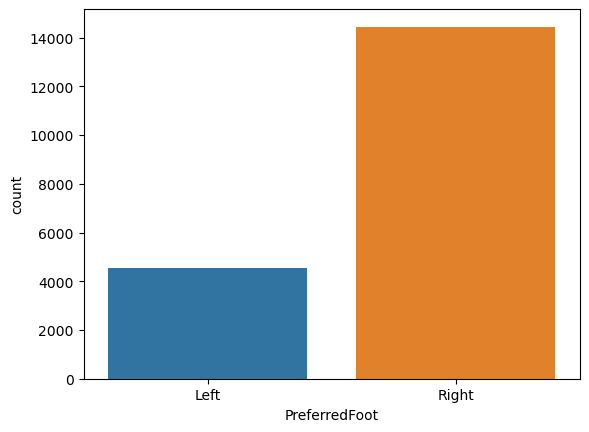

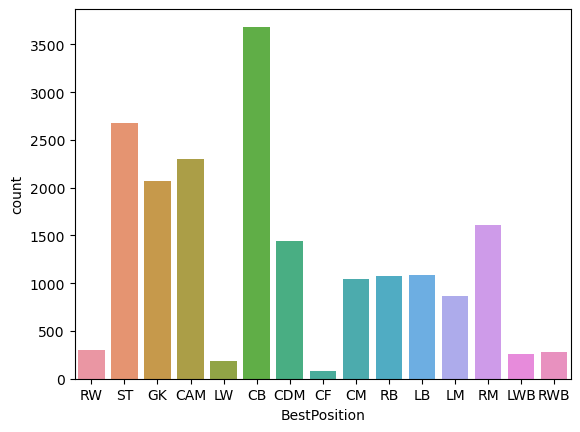

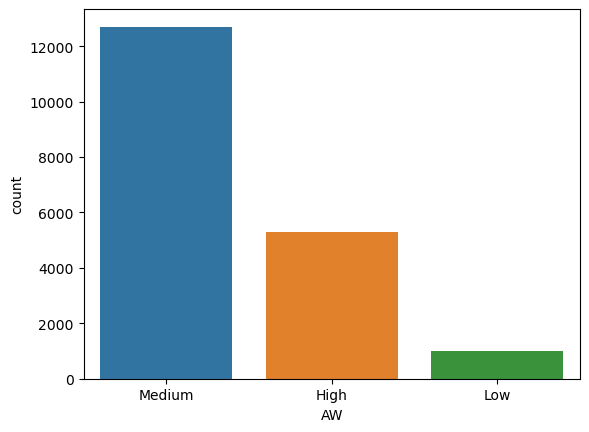

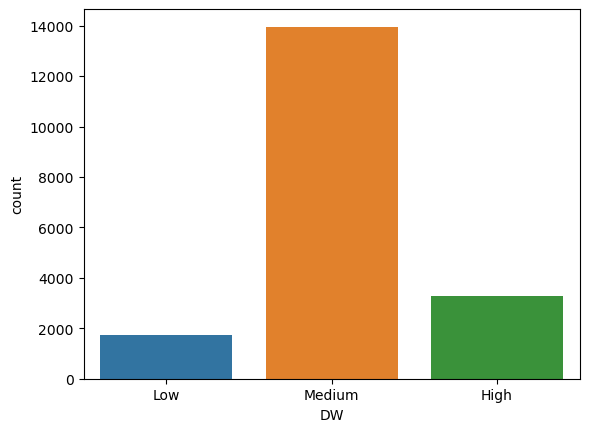

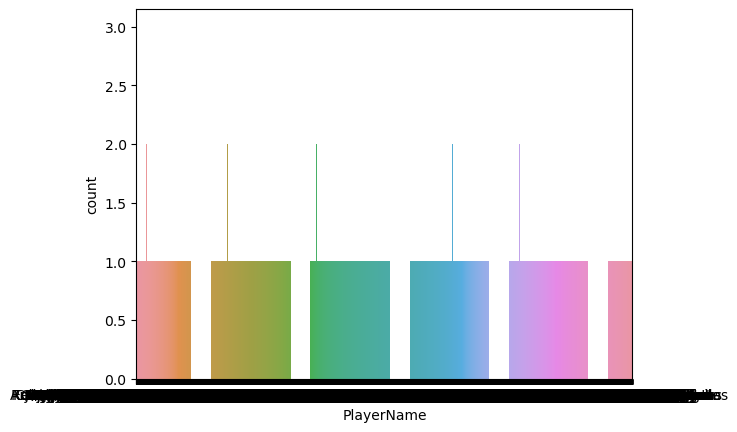

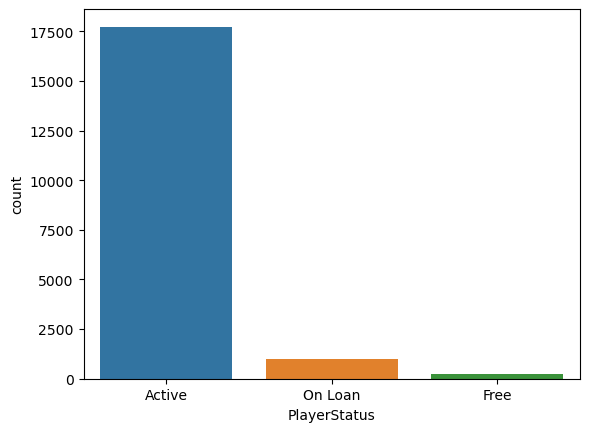

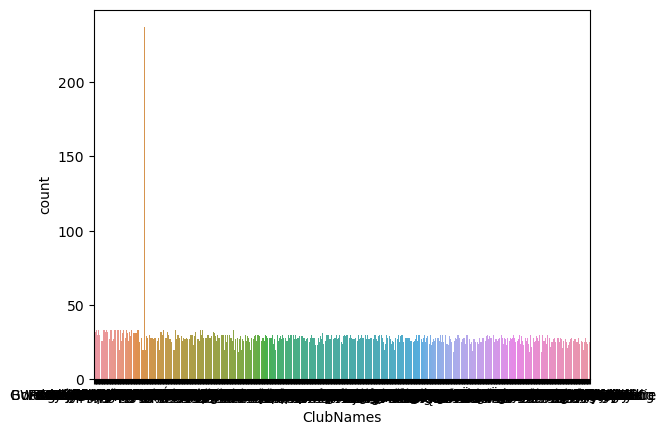

In [257]:
# Distribution of labels in our data

# Counting the labels in the PreferredFoot feature
sns.countplot(x=cat_vars['PreferredFoot'])
plt.show()

# Counting the labels in the BestPosition feature
sns.countplot(x=cat_vars['BestPosition'])
plt.show()

# Counting the labels in the AW feature
sns.countplot(x=cat_vars['AW'])
plt.show()

# Counting the labels in the DW feature
sns.countplot(x=cat_vars['DW'])
plt.show()

# Counting the labels in the PlayerName feature
sns.countplot(x=cat_vars['PlayerName'])
plt.show()

# Counting the labels in the PlayerStatus feature
sns.countplot(x=cat_vars['PlayerStatus'])
plt.show()

# Counting the labels in the ClubNames feature
sns.countplot(x=cat_vars['ClubNames'])
plt.show()

#### The AW and Dw columns will be encoded using Label Encoder as a reselut of their ordinal labels

In [258]:
# For AW column
encoder = LabelEncoder()
df2['AWEncoded'] = encoder.fit_transform(df2['AW'])

# For DW column
encoder = LabelEncoder()
df2['DWEncoded'] = encoder.fit_transform(df2['DW'])

# Drop columns after encoding
df2.drop(['AW', 'DW'], inplace=True, axis=1)

#### The BestPosition and PlayerStatus features will be encoded using one-hot transform because they have nominal labels without any form of ranking

In [259]:
df2 = pd.get_dummies(df2, columns=['PreferredFoot', 'BestPosition', 'PlayerStatus'], dtype='int')

In [260]:
df2.head()

,PlayerName,ClubNames,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST,ShortPassing,Dribbling,WF,SM,IR,WeightInKg,HeightInCm,ValueList,WageList,ReleaseClauseList,Age,OVA,POT,BOV,Attacking,Crossing,Finishing,HeadingAccuracy,Volleys,Skill,Curve,FKAccuracy,LongPassing,BallControl,Movement,Acceleration,SprintSpeed,Agility,Reactions,Balance,Power,ShotPower,Jumping,Stamina,Strength,LongShots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,StandingTackle,SlidingTackle,Goalkeeping,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,TotalStats,BaseStats,PAC,SHO,PAS,DRI,DEF,PHY,BinnedHeight_very short,BinnedHeight_short,BinnedHeight_average,BinnedHeight_tall,BinnedHeight_very tall,BinnedWeight_lightweight,BinnedWeight_featherweight,BinnedWeight_middleweight,BinnedWeight_heavyweight,BinnedWeight_super heavyweight,BinnedWeight_ultra heavyweight,BinnedWage_A,BinnedWage_B,BinnedWage_C,BinnedWage_D,BinnedWage_E,BinnedWage_F,BinnedWage_G,BinnedWage_H,BinnedWage_I,BinnedWage_J,BinnedWage_K,BinnedWage_L,BinnedWage_M,BinnedWage_N,BinnedWage_O,BinnedWage_P,BinnedWage_Q,BinnedWage_R,BinnedWage_S,BinnedValue_low,BinnedValue_medium,BinnedValue_high,BinnedValue_very high,BinnedReleaseClause_low,BinnedReleaseClause_moderate,BinnedReleaseClause_high,BinnedReleaseClause_very high,AWEncoded,DWEncoded,PreferredFoot_Left,PreferredFoot_Right,BestPosition_CAM,BestPosition_CB,BestPosition_CDM,BestPosition_CF,BestPosition_CM,BestPosition_GK,BestPosition_LB,BestPosition_LM,BestPosition_LW,BestPosition_LWB,BestPosition_RB,BestPosition_RM,BestPosition_RW,BestPosition_RWB,BestPosition_ST,PlayerStatus_Active,PlayerStatus_Free,PlayerStatus_On Loan
0,Lionel Messi,FC Barcelona,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,91,96,4,4,5,72.0,170.0,103500000.0,560000.0,138400000.0,33,93.0,93.0,93,429.0,85.0,95.0,70.0,88.0,470.0,93.0,94.0,91.0,96.0,451.0,91.0,80.0,91.0,94.0,95.0,389.0,86.0,68.0,72.0,69.0,94.0,347.0,44,40.0,93.0,95,75.0,96.0,91.0,32.0,35.0,24.0,54.0,6.0,11.0,15.0,14.0,8,2231.0,466,85.0,92.0,91.0,95.0,38.0,65.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,C Ronaldo Dos Santos Aveiro,Juventus,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,82,88,4,5,5,83.0,187.0,63000000.0,220000.0,75900000.0,35,92.0,92.0,92,437.0,84.0,95.0,90.0,86.0,414.0,81.0,76.0,77.0,92.0,431.0,87.0,91.0,87.0,95.0,71.0,444.0,94.0,95.0,84.0,78.0,93.0,353.0,63,29.0,95.0,82,84.0,95.0,84.0,28.0,32.0,24.0,58.0,7.0,11.0,15.0,14.0,11,2221.0,464,89.0,93.0,81.0,89.0,35.0,77.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,Jan Oblak,Atlético Madrid,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,43,12,3,1,3,87.0,188.0,120000000.0,125000.0,159400000.0,27,91.0,93.0,91,95.0,13.0,11.0,15.0,13.0,109.0,13.0,14.0,40.0,30.0,307.0,43.0,60.0,67.0,88.0,49.0,268.0,59.0,78.0,41.0,78.0,12.0,140.0,34,19.0,11.0,65,11.0,68.0,57.0,27.0,12.0,18.0,437.0,87.0,92.0,78.0,90.0,90,1413.0,489,87.0,92.0,78.0,90.0,52.0,90.0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,Kevin De Bruyne,Manchester City,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,94,88,5,4,4,70.0,181.0,129000000.0,370000.0,161000000.0,29,91.0,91.0,91,407.0,94.0,82.0,55.0,82.0,441.0,85.0,83.0,93.0,92.0,398.0,77.0,76.0,78.0,91.0,76.0,408.0,91.0,63.0,89.0,74.0,91.0,408.0,76,66.0,88.0,94,84.0,91.0,186.0,68.0,65.0,53.0,56.0,15.0,13.0,5.0,10.0,13,2304.0,485,76.0,86.0,93.0,88.0,64.0,78.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Neymar Da Silva Santos Jr,Paris Saint-Germain,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,87,95,5,5,5,68.0,175.0,132000000.0,270000.0,166500000.0,28,91.0,91.0,91,408.0,85.0,87.0,62.0,87.0,448.0,88.0,89.0,81.0,95.0,453.0,94.0,89.0,96.0,91.0,83.0,357.0,80.0,62.0,81.0,50.0,84.0,356.0,51,36.0,87.0,90,92.0,93.0,94.0,35.0,30.0,29.0,59.0,9.0,9.0,15.0,15.0,11,2175.0,451,91.0,85.0,86

#### PlayerName, Club, and the outcome variable will be isolated from the dataset before further transformation is carried out.

In [261]:
df3 = df2.select_dtypes(include=['float64', 'float32', 'int64', 'int32'])
df3.sample(5)

,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST,ShortPassing,Dribbling,WF,SM,IR,WeightInKg,HeightInCm,ValueList,WageList,ReleaseClauseList,Age,OVA,POT,BOV,Attacking,Crossing,Finishing,HeadingAccuracy,Volleys,Skill,Curve,FKAccuracy,LongPassing,BallControl,Movement,Acceleration,SprintSpeed,Agility,Reactions,Balance,Power,ShotPower,Jumping,Stamina,Strength,LongShots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,StandingTackle,SlidingTackle,Goalkeeping,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,TotalStats,BaseStats,PAC,SHO,PAS,DRI,DEF,PHY,BinnedHeight_very short,BinnedHeight_short,BinnedHeight_average,BinnedHeight_tall,BinnedHeight_very tall,BinnedWeight_lightweight,BinnedWeight_featherweight,BinnedWeight_middleweight,BinnedWeight_heavyweight,BinnedWeight_super heavyweight,BinnedWeight_ultra heavyweight,BinnedWage_A,BinnedWage_B,BinnedWage_C,BinnedWage_D,BinnedWage_E,BinnedWage_F,BinnedWage_G,BinnedWage_H,BinnedWage_I,BinnedWage_J,BinnedWage_K,BinnedWage_L,BinnedWage_M,BinnedWage_N,BinnedWage_O,BinnedWage_P,BinnedWage_Q,BinnedWage_R,BinnedWage_S,BinnedValue_low,BinnedValue_medium,BinnedValue_high,BinnedValue_very high,BinnedReleaseClause_low,BinnedReleaseClause_moderate,BinnedReleaseClause_high,BinnedReleaseClause_very high,AWEncoded,DWEncoded,PreferredFoot_Left,PreferredFoot_Right,BestPosition_CAM,BestPosition_CB,BestPosition_CDM,BestPosition_CF,BestPosition_CM,BestPosition_GK,BestPosition_LB,BestPosition_LM,BestPosition_LW,BestPosition_LWB,BestPosition_RB,BestPosition_RM,BestPosition_RW,BestPosition_RWB,BestPosition_ST,PlayerStatus_Active,PlayerStatus_Free,PlayerStatus_On Loan
18906,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,38,30,3,2,1,74.0,186.0,120000.0,500000.0,165000.0,18,49.0,69.0,51,155.0,28.0,15.0,45.0,29.0,149.0,28.0,25.0,34.0,32.0,256.0,61.0,53.0,45.0,40.0,57.0,251.0,36.0,68.0,60.0,67.0,20.0,198.0,48,51.0,28.0,32,39.0,38.0,142.0,42.0,52.0,48.0,51.0,6.0,12.0,8.0,13.0,12,1202.0,257,57.0,23.0,33.0,34.0,48.0,62.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1538,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,79,74,3,3,1,69.0,178.0,3500000.0,13000.0,5500000.0,33,75.0,75.0,75,339.0,69.0,65.0,68.0,58.0,353.0,63.0,61.0,75.0,80.0,309.0,50.0,58.0,59.0,76.0,66.0,355.0,71.0,63.0,75.0,83.0,63.0,356.0,70,62.0,70.0,74,80.0,68.0,199.0,59.0,73.0,67.0,43.0,8.0,6.0,15.0,7.0,7,1954.0,411,54.0,66.0,74.0,74.0,66.0,77.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
18359,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,55,34,2,2,1,70.0,182.0,210000.0,1000.0,303000.0,20,53.0,67.0,55,184.0,24.0,20.0,55.0,30.0,174.0,26.0,27.0,54.0,33.0,277.0,56.0,55.0,47.0,45.0,74.0,248.0,38.0,68.0,52.0,66.0,24.0,190.0,48,54.0,21.0,28,39.0,41.0,151.0,47.0,54.0,50.0,55.0,11.0,12.0,13.0,8.0,11,1279.0,270,55.0,26.0,40.0,38.0,52.0,59.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15727,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,68,65,3,3,1,65.0,178.0,525000.0,750000.0,674000.0,19,59.0,74.0,63,261.0,52.0,49.0,45.0,47.0,293.0,53.0,48.0,65.0,62.0,316.0,65.0,51.0,71.0,58.0,71.0,255.0,59.0,57.0,53.0,43.0,43.0,238.0,42,28.0,50.0,64,54.0,62.0,152.0,45.0,50.0,57.0,54.0,11.0,10.0,10.0,12.0,11,1569.0,324,57.0,50.0,62.0,65.0,44.0,46.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2571,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,68,72,3,3,1,73.0,180.0,3700000.0,24000.0,8500000.0,26,73.0,76.0,73,301.0,69.0,55.0,59.0,50.0,287.0,67.0,32.0,43.0,73.0,364.0,73.0,77.0,69.0,74.0,71.0,311.0,49.0,73.0,69.0,74.0,46.0,310.0,77,71.0,67.0,55,40.0,64.0,216.0,69.0,73.0,74.0,49.0,6.0,8.0,13.0,15.0,7,1838.0,402,75.0,52.0,60.0,72.0,70.0,73.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


#### The target variable was isolated from the rest of the dataset since no transformation method was done on it

#### RESCALING - DATA TRANSFORMATION

In [268]:
# Inspecting the scales of the features in the data

df3.describe()

,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST,ShortPassing,Dribbling,WF,SM,IR,WeightInKg,HeightInCm,ValueList,WageList,ReleaseClauseList,Age,OVA,POT,BOV,Attacking,Crossing,Finishing,HeadingAccuracy,Volleys,Skill,Curve,FKAccuracy,LongPassing,BallControl,Movement,Acceleration,SprintSpeed,Agility,Reactions,Balance,Power,ShotPower,Jumping,Stamina,Strength,LongShots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,StandingTackle,SlidingTackle,Goalkeeping,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,TotalStats,BaseStats,PAC,SHO,PAS,DRI,DEF,PHY,BinnedHeight_very short,BinnedHeight_short,BinnedHeight_average,BinnedHeight_tall,BinnedHeight_very tall,BinnedWeight_lightweight,BinnedWeight_featherweight,BinnedWeight_middleweight,BinnedWeight_heavyweight,BinnedWeight_super heavyweight,BinnedWeight_ultra heavyweight,BinnedWage_A,BinnedWage_B,BinnedWage_C,BinnedWage_D,BinnedWage_E,BinnedWage_F,BinnedWage_G,BinnedWage_H,BinnedWage_I,BinnedWage_J,BinnedWage_K,BinnedWage_L,BinnedWage_M,BinnedWage_N,BinnedWage_O,BinnedWage_P,BinnedWage_Q,BinnedWage_R,BinnedWage_S,BinnedValue_low,BinnedValue_medium,BinnedValue_high,BinnedValue_very high,BinnedReleaseClause_low,BinnedReleaseClause_moderate,BinnedReleaseClause_high,BinnedReleaseClause_very high,AWEncoded,DWEncoded,PreferredFoot_Left,PreferredFoot_Right,BestPosition_CAM,BestPosition_CB,BestPosition_CDM,BestPosition_CF,BestPosition_CM,BestPosition_GK,BestPosition_LB,BestPosition_LM,BestPosition_LW,BestPosition_LWB,BestPosition_RB,BestPosition_RM,BestPosition_RW,BestPosition_RWB,BestPosition_ST,PlayerStatus_Active,PlayerStatus_Free,PlayerStatus_On Loan
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.0,18979.0,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,1.897900e+04,18979.000000,1.897900e+04,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.0,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,0.117129,0.204436,0.149218,0.019759,0.209864,0.109331,0.108646,0.127035,0.056483,0.019284,0.108172,0.125560,0.057432,0.018652,0.175668,58.767322,55.586701,2.940513,2.364982,1.091628,75.018813,181.200409,2.865063e+06,128696.770114,3.962929e+06,25.194109,65.717003,71.135729,66.751726,248.932188,49.686917,45.842774,51.939038,42.693240,256.459508,47.240476,42.389272,52.724011,58.526951,317.715528,64.357026,64.411824,63.365878,61.655092,63.926023,296.604141,57.800095,64.575847,62.653933,64.785605,46.780389,254.187312,55.591285,46.395701,50.297592,53.857105,48.057063,58.072

#### Here, the scales are widely apart, so we need to rescale the data

In [270]:
# Rescaling transformation
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
rescaledDf = scaler.fit_transform(X)
np.set_printoptions(precision=2)
rescaledDf = scaler.fit_transform(X)

In [271]:
rescaledDf

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [272]:
# Inspecting the rescaling process

cols = df3.columns
cols = list(cols)

In [274]:
# Converting the rescaled X to a DataFrame
df4 = pd.DataFrame(rescaledDf, columns=cols)
df4.head()

,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST,ShortPassing,Dribbling,WF,SM,IR,WeightInKg,HeightInCm,ValueList,WageList,ReleaseClauseList,Age,OVA,POT,BOV,Attacking,Crossing,Finishing,HeadingAccuracy,Volleys,Skill,Curve,FKAccuracy,LongPassing,BallControl,Movement,Acceleration,SprintSpeed,Agility,Reactions,Balance,Power,ShotPower,Jumping,Stamina,Strength,LongShots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,StandingTackle,SlidingTackle,Goalkeeping,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,TotalStats,BaseStats,PAC,SHO,PAS,DRI,DEF,PHY,BinnedHeight_very short,BinnedHeight_short,BinnedHeight_average,BinnedHeight_tall,BinnedHeight_very tall,BinnedWeight_lightweight,BinnedWeight_featherweight,BinnedWeight_middleweight,BinnedWeight_heavyweight,BinnedWeight_super heavyweight,BinnedWeight_ultra heavyweight,BinnedWage_A,BinnedWage_B,BinnedWage_C,BinnedWage_D,BinnedWage_E,BinnedWage_F,BinnedWage_G,BinnedWage_H,BinnedWage_I,BinnedWage_J,BinnedWage_K,BinnedWage_L,BinnedWage_M,BinnedWage_N,BinnedWage_O,BinnedWage_P,BinnedWage_Q,BinnedWage_R,BinnedWage_S,BinnedValue_low,BinnedValue_medium,BinnedValue_high,BinnedValue_very high,BinnedReleaseClause_low,BinnedReleaseClause_moderate,BinnedReleaseClause_high,BinnedReleaseClause_very high,AWEncoded,DWEncoded,PreferredFoot_Left,PreferredFoot_Right,BestPosition_CAM,BestPosition_CB,BestPosition_CDM,BestPosition_CF,BestPosition_CM,BestPosition_GK,BestPosition_LB,BestPosition_LM,BestPosition_LW,BestPosition_LWB,BestPosition_RB,BestPosition_RM,BestPosition_RW,BestPosition_RWB,BestPosition_ST,PlayerStatus_Active,PlayerStatus_Free,PlayerStatus_On Loan
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.965517,1.000000,0.75,0.75,1.00,0.366667,0.294118,0.557951,0.589474,0.681438,0.459459,1.000000,0.958333,1.000000,0.979747,0.897727,1.000000,0.738636,0.977011,1.000000,0.988889,1.000000,0.977273,1.000000,0.961988,0.928571,0.809524,0.939024,0.985915,0.976471,0.829193,0.883117,0.6625,0.705882,0.654321,1.000000,0.800539,0.402299,0.420455,0.978495,1.000000,0.802326,1.000000,0.281746,0.318681,0.340909,0.232558,0.102326,0.045455,0.100000,0.142857,0.134831,0.068182,0.945825,0.879699,0.845070,0.987013,0.970588,1.000000,0.329114,0.587302,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.862069,0.912088,0.75,1.00,1.00,0.550000,0.627451,0.339623,0.231579,0.373708,0.513514,0.978261,0.937500,0.977778,1.000000,0.886364,1.000000,0.965909,0.954023,0.869767,0.855556,0.797753,0.818182,0.956044,0.903509,0.880952,0.940476,0.890244,1.000000,0.694118,1.000000,0.987013,1.0000,0.847059,0.765432,0.988889,0.816712,0.620690,0.295455,1.000000,0.848837,0.906977,0.988095,0.253968,0.274725,0.306818,0.232558,0.111628,0.056818,0.100000,0.142857,0.134831,0.102273,0.939452,0.872180,0.901408,1.000000,0.823529,0.914286,0.291139,0.777778,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.413793,0.076923,0.50,0.00,0.50,0.616667,0.647059,0.646900,0.131579,0.784835,0.297297,0.956522,0.958333,0.955556,0.134177,0.079545,0.086957,0.113636,0.114943,0.160465,0.100000,0.101124,0.397727,0.274725,0.540936,0.357143,0.571429,0.646341,0.901408,0.435294,0.453416,0.532468,0.7875,0.341176,0.765432,0.088889,0.242588,0.287356,0.181818,0.096774,0.651163,0.058140,0.666667,0.146825,0.263736,0.079545,0.162791,0.993023,0.965909,1.000000,0.835165,0.988764,1.000000,0.424474,0.966165,0.873239,0.987013,0.779412,0.928571,0.506329,0.984127,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0

In [275]:
df4.describe()

,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST,ShortPassing,Dribbling,WF,SM,IR,WeightInKg,HeightInCm,ValueList,WageList,ReleaseClauseList,Age,OVA,POT,BOV,Attacking,Crossing,Finishing,HeadingAccuracy,Volleys,Skill,Curve,FKAccuracy,LongPassing,BallControl,Movement,Acceleration,SprintSpeed,Agility,Reactions,Balance,Power,ShotPower,Jumping,Stamina,Strength,LongShots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,StandingTackle,SlidingTackle,Goalkeeping,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,TotalStats,BaseStats,PAC,SHO,PAS,DRI,DEF,PHY,BinnedHeight_very short,BinnedHeight_short,BinnedHeight_average,BinnedHeight_tall,BinnedHeight_very tall,BinnedWeight_lightweight,BinnedWeight_featherweight,BinnedWeight_middleweight,BinnedWeight_heavyweight,BinnedWeight_super heavyweight,BinnedWeight_ultra heavyweight,BinnedWage_A,BinnedWage_B,BinnedWage_C,BinnedWage_D,BinnedWage_E,BinnedWage_F,BinnedWage_G,BinnedWage_H,BinnedWage_I,BinnedWage_J,BinnedWage_K,BinnedWage_L,BinnedWage_M,BinnedWage_N,BinnedWage_O,BinnedWage_P,BinnedWage_Q,BinnedWage_R,BinnedWage_S,BinnedValue_low,BinnedValue_medium,BinnedValue_high,BinnedValue_very high,BinnedReleaseClause_low,BinnedReleaseClause_moderate,BinnedReleaseClause_high,BinnedReleaseClause_very high,AWEncoded,DWEncoded,PreferredFoot_Left,PreferredFoot_Right,BestPosition_CAM,BestPosition_CB,BestPosition_CDM,BestPosition_CF,BestPosition_CM,BestPosition_GK,BestPosition_LB,BestPosition_LM,BestPosition_LW,BestPosition_LWB,BestPosition_RB,BestPosition_RM,BestPosition_RW,BestPosition_RWB,BestPosition_ST,PlayerStatus_Active,PlayerStatus_Free,PlayerStatus_On Loan
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.0,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.00000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,0.117129,0.204436,0.149218,0.019759,0.209864,0.109331,0.108646,0.127035,0.056483,0.019284,0.108172,0.125560,0.057432,0.018652,0.175668,0.595027,0.555898,0.485128,0.341246,0.022907,0.416980,0.513734,0.015445,0.135470,0.019512,0.248489,0.406891,0.502828,0.416705,0.523879,0.496442,0.465682,0.533398,0.456244,0.503394,0.480450,0.420104,0.542318,0.588208,0.572268,0.611393,0.623950,0.602023,0.530353,0.610894,0.542249,0.516884,0.619698,0.595929,0.602291,0.475338,0.550370,0.535532,0.493133,0.519329,0.521594,0.489036,0.548483,0.475854,0.478675,0.485260,0.484252,0.16613

#### DATA STANDARDIZATION

#### Data Exploration using Univariate Density Plot

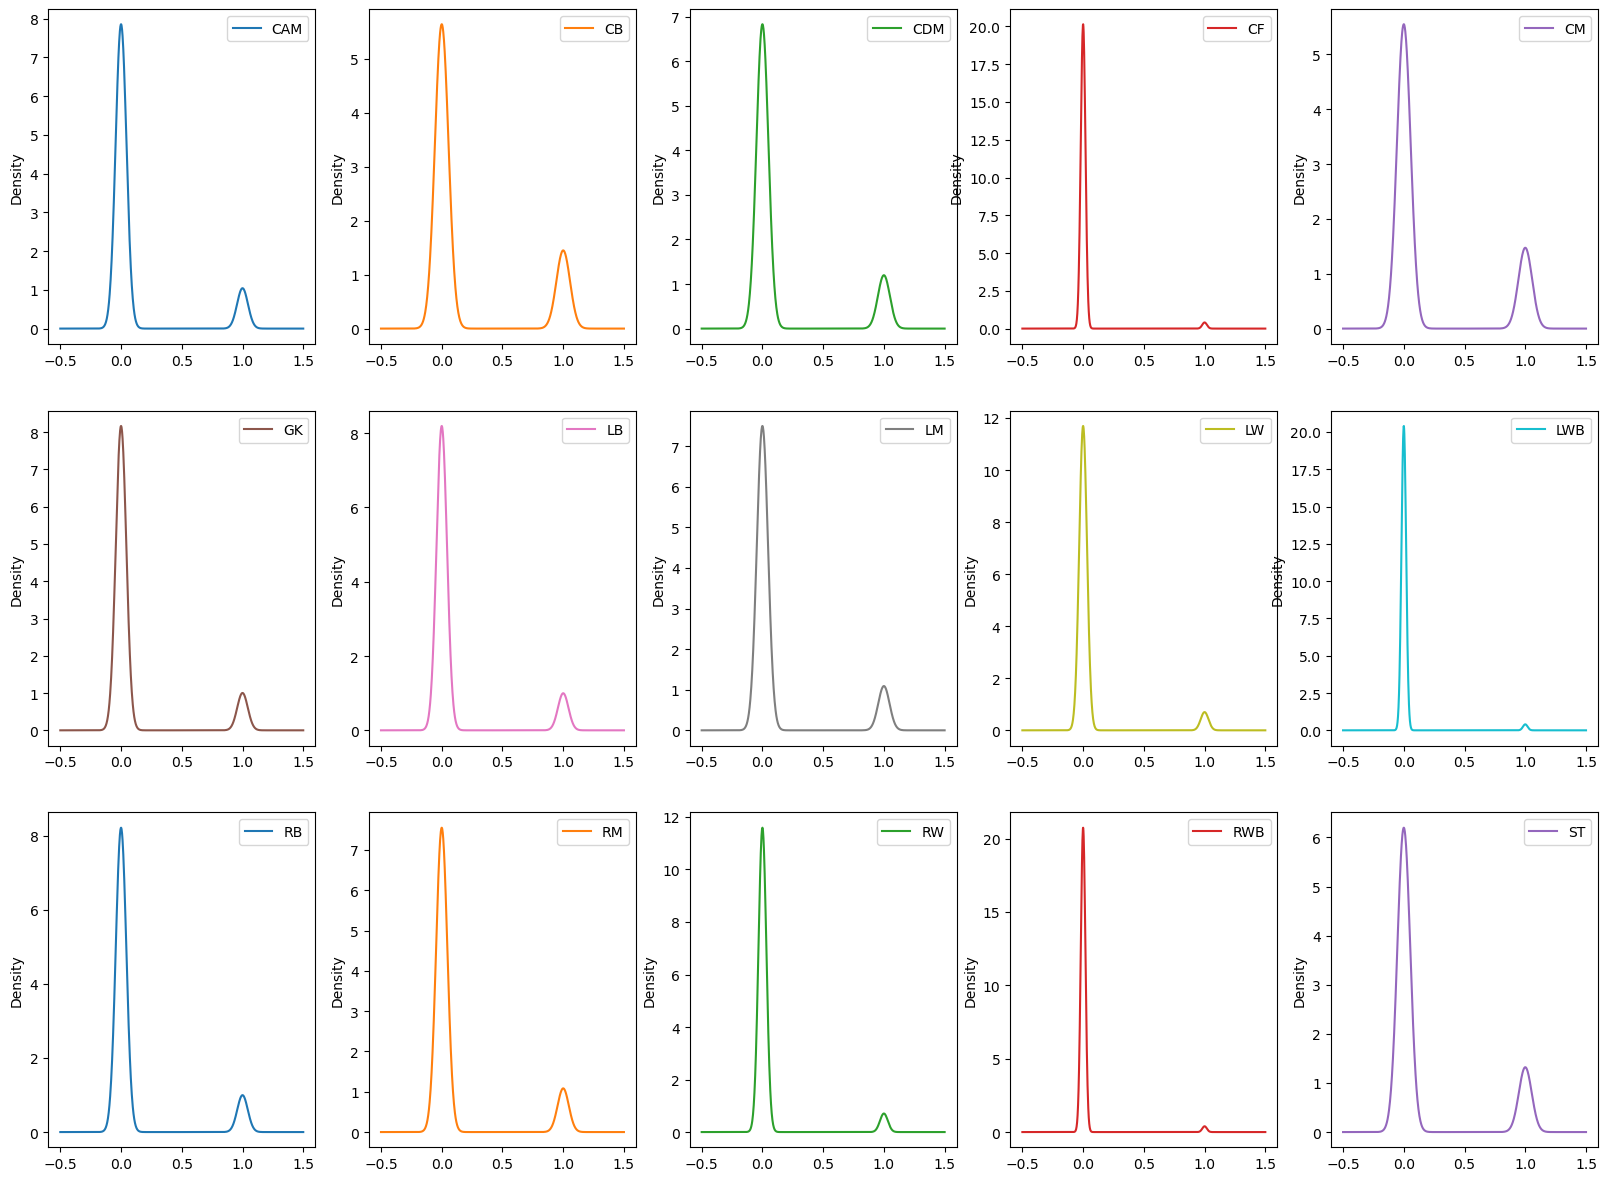

In [277]:
df4[['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LB', 'LM', 'LW', 'LWB', 'RB', 'RM', 'RW', 'RWB', 'ST']].plot(kind='density', subplots=True, layout=(4, 5), sharex=False)
plt.gcf().set_size_inches(20, 20)
plt.show()

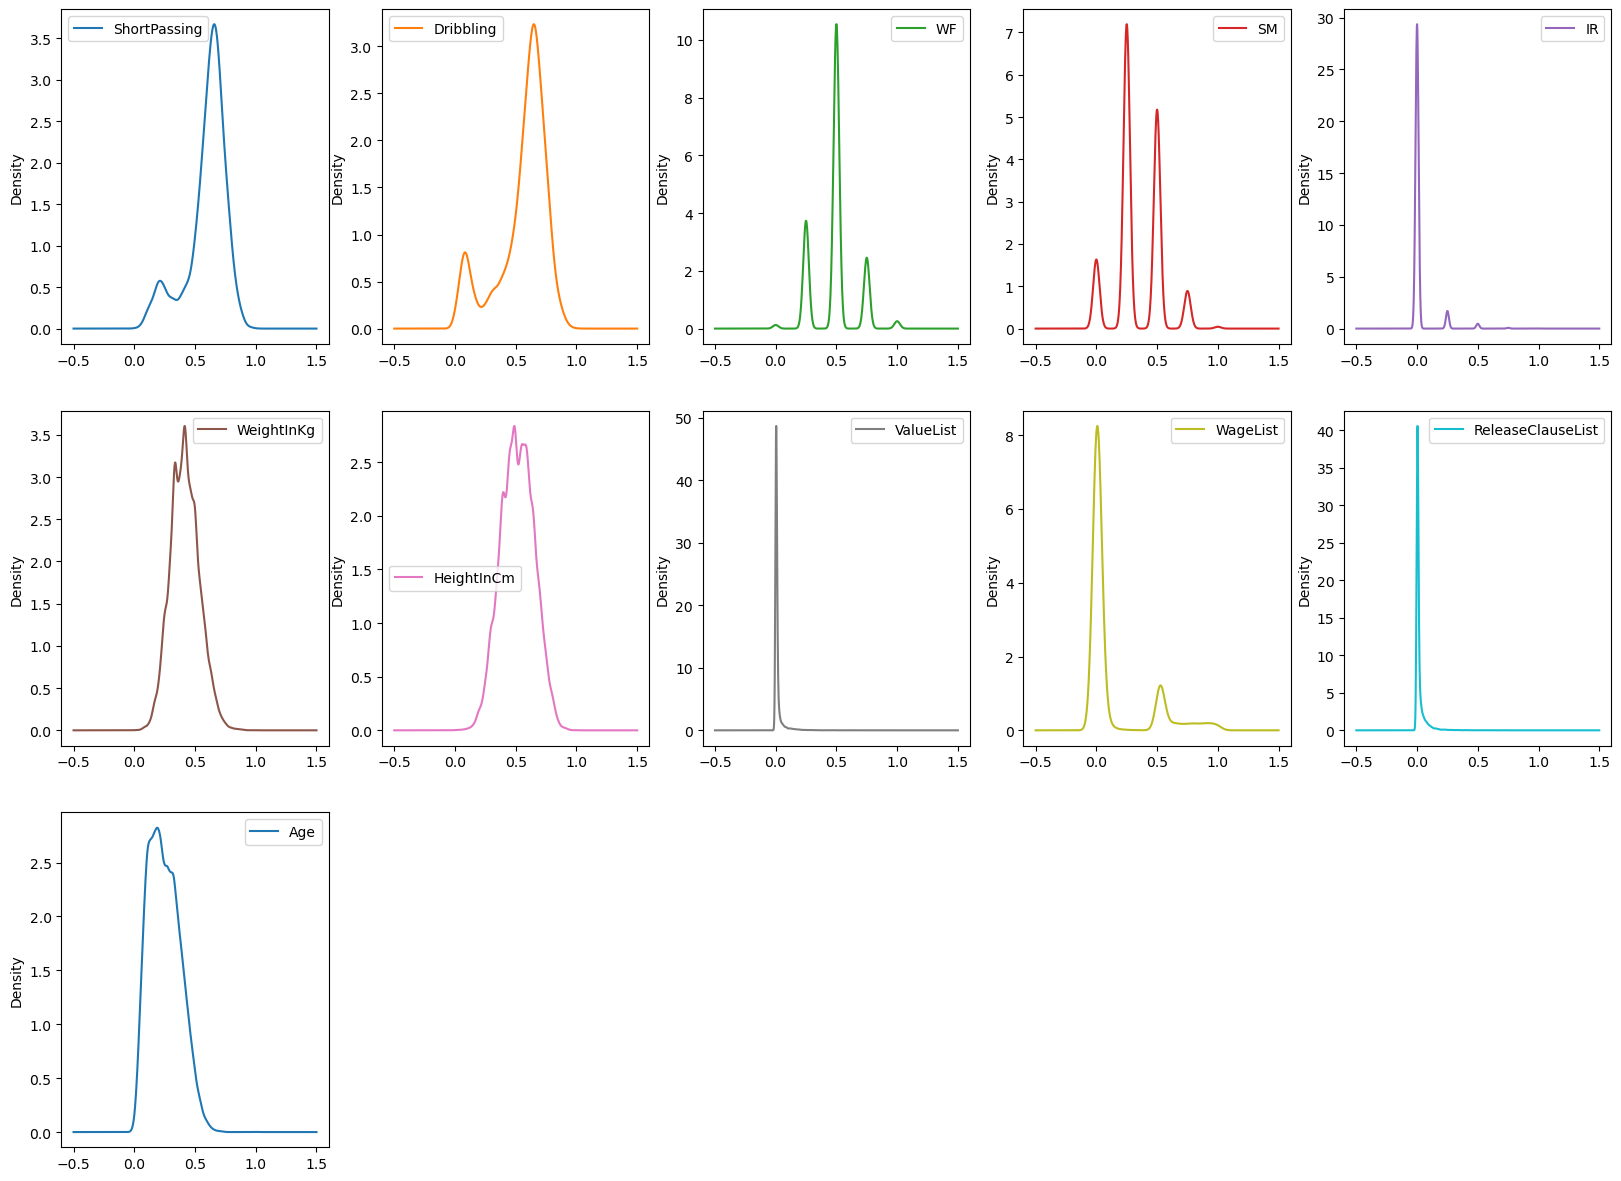

In [278]:
df4[['ShortPassing', 'Dribbling', 'WF', 'SM', 'IR', 'WeightInKg', 'HeightInCm', 'ValueList', 'WageList', 'ReleaseClauseList', 'Age']].plot(kind='density', subplots=True, layout=(4, 5), sharex=False)
plt.gcf().set_size_inches(20, 20)
plt.show()

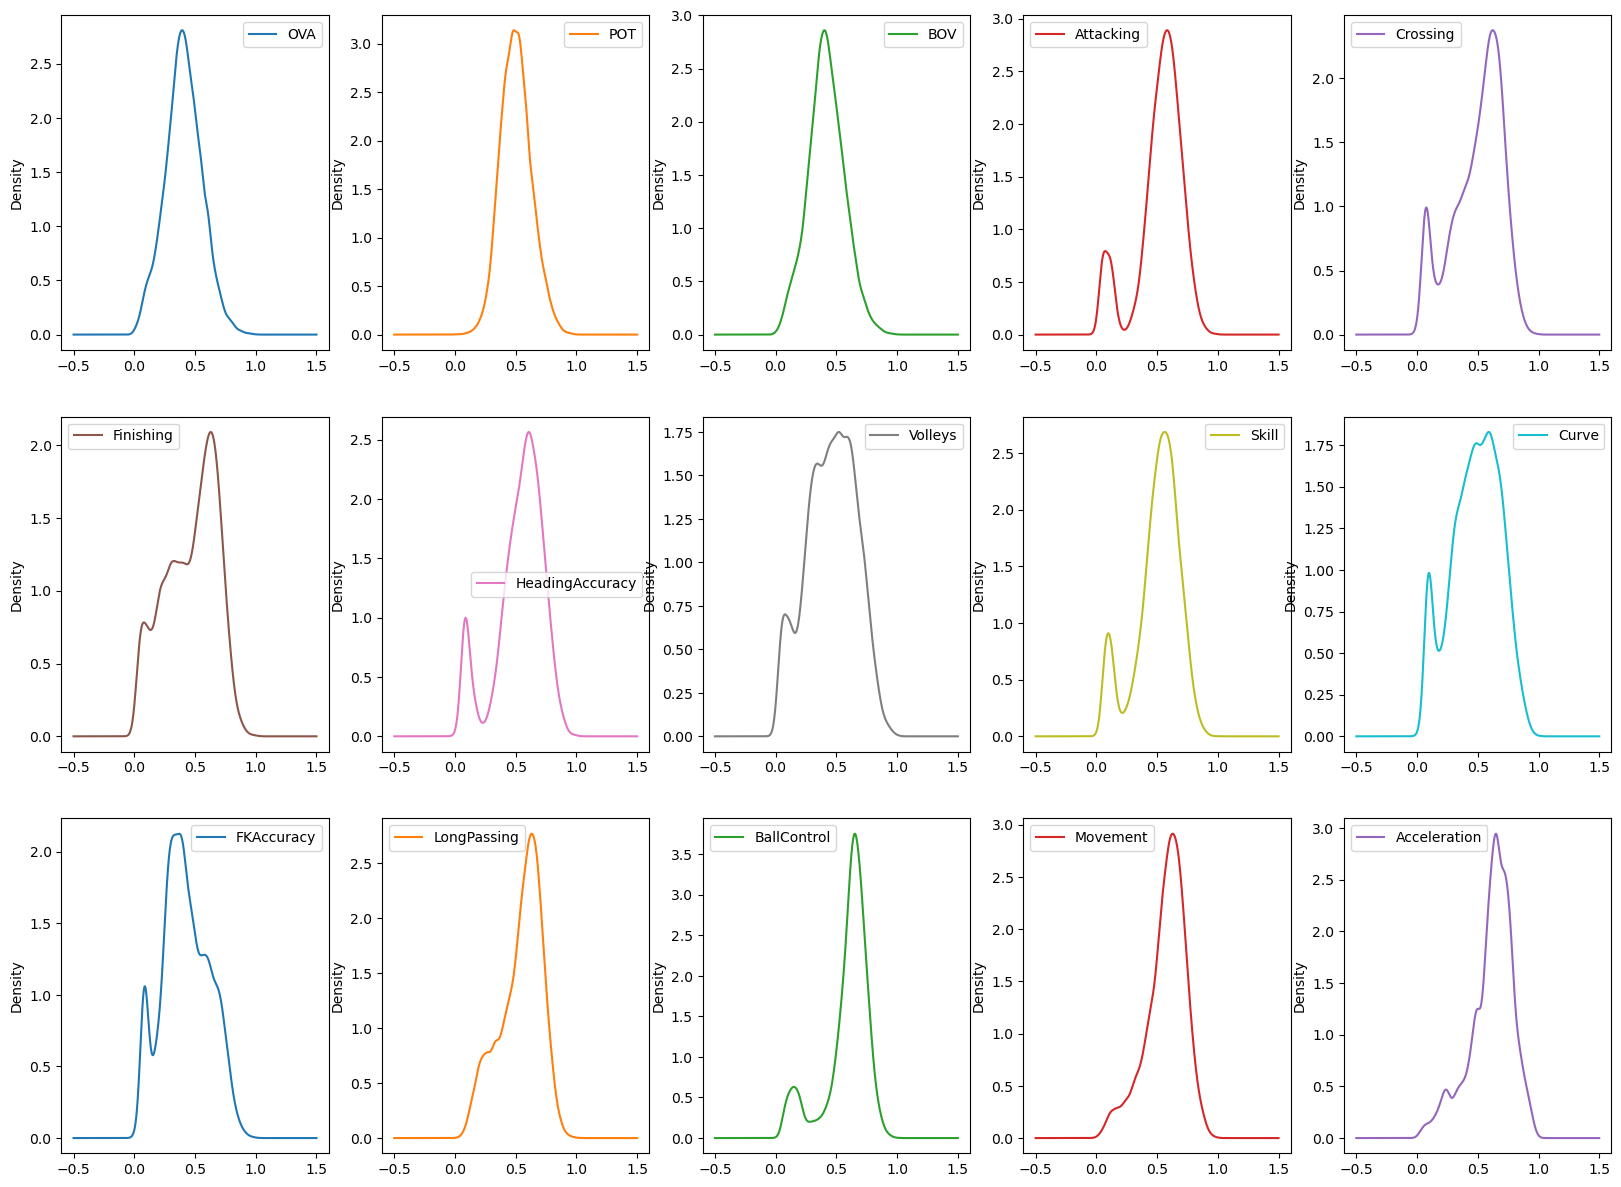

In [279]:
df4[['OVA', 'POT', 'BOV', 'Attacking', 'Crossing', 'Finishing', 'HeadingAccuracy', 'Volleys', 'Skill', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Movement', 'Acceleration']].plot(kind='density', subplots=True, layout=(4, 5), sharex=False)
plt.gcf().set_size_inches(20, 20)
plt.show()

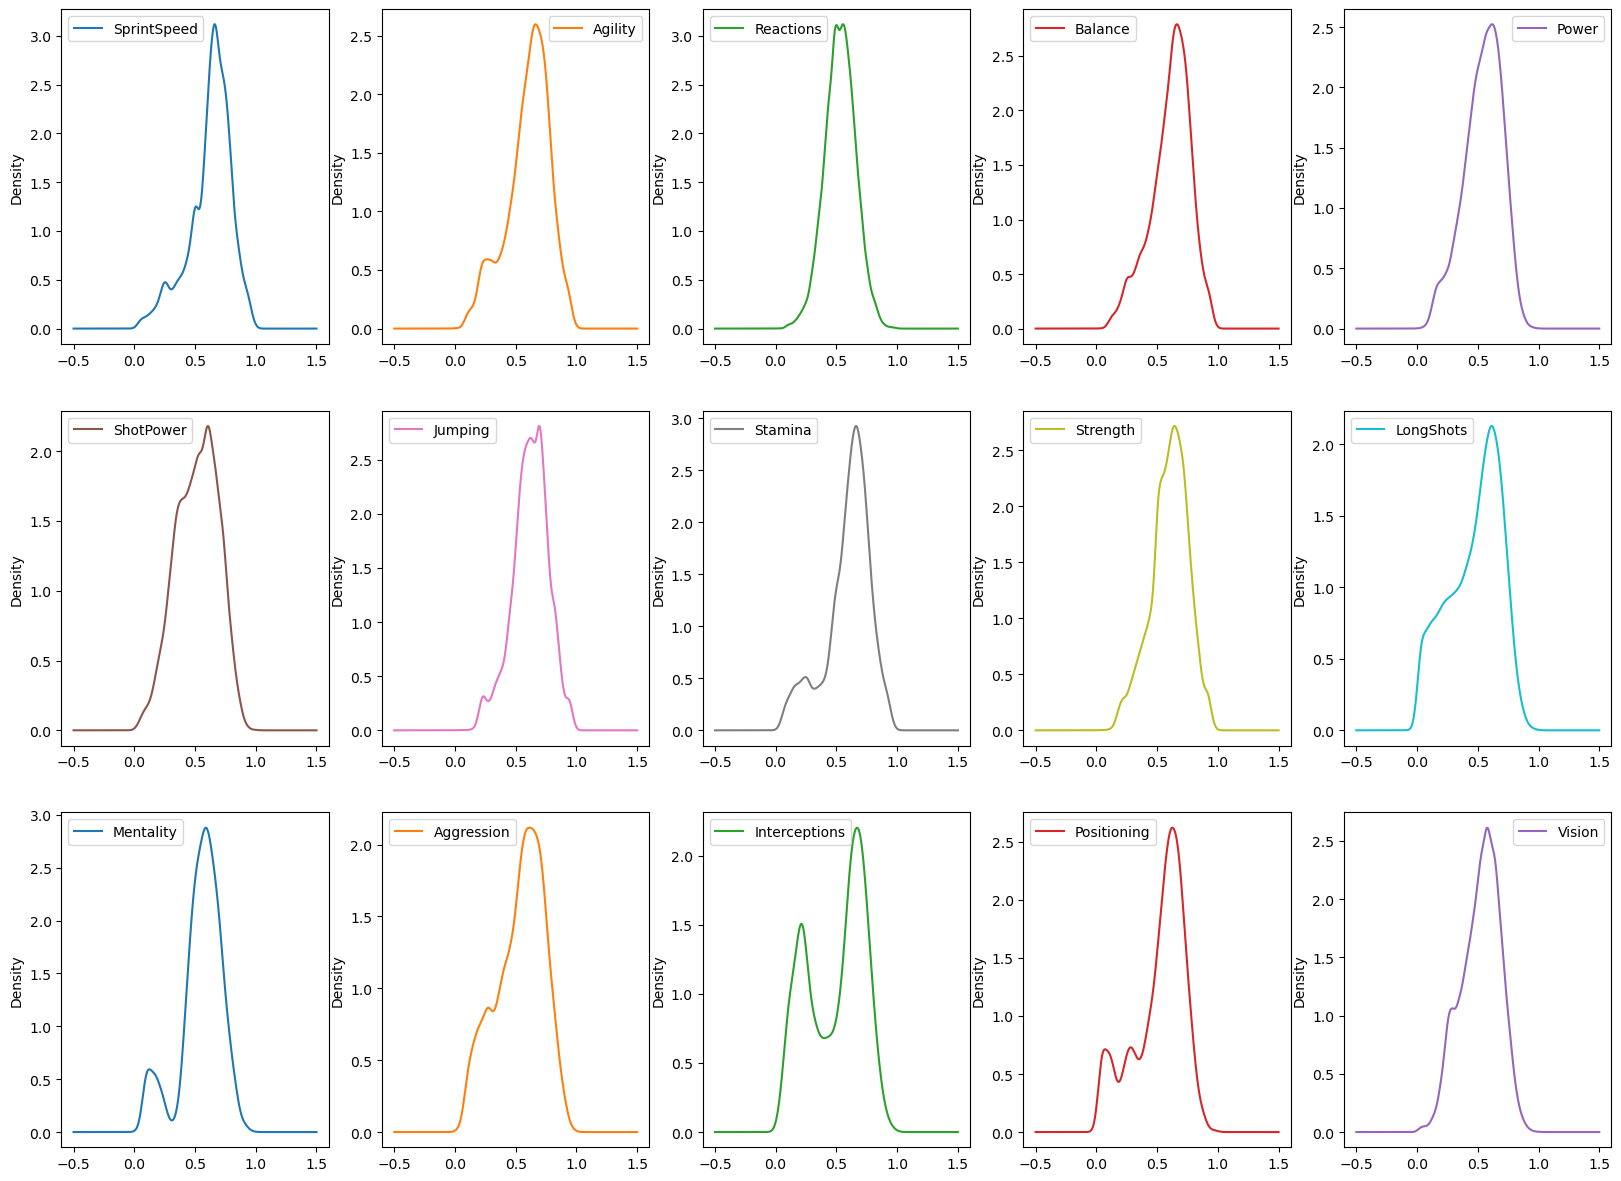

In [280]:
df4[['SprintSpeed', 'Agility', 'Reactions', 'Balance', 'Power', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision']].plot(kind='density', subplots=True, layout=(4, 5), sharex=False)
plt.gcf().set_size_inches(20, 20)
plt.show()

#### STANDARDIZING THE RESCALED DATA

In [281]:
from sklearn.preprocessing import StandardScaler

X = df4.values
scaler = StandardScaler().fit(X)
stdDf = scaler.transform(X)
set_printoptions(precision=3)

print(stdDf)

# Converting the rescaled data to a Dataframe
df5 = pd.DataFrame(stdDf, columns=cols)

df5.head()

[[-0.364 -0.507 -0.419 ...  0.266 -0.112 -0.237]
 [-0.364 -0.507 -0.419 ...  0.266 -0.112 -0.237]
 [-0.364 -0.507 -0.419 ...  0.266 -0.112 -0.237]
 ...
 [-0.364 -0.507 -0.419 ...  0.266 -0.112 -0.237]
 [-0.364 -0.507 -0.419 ...  0.266 -0.112 -0.237]
 [-0.364  1.973 -0.419 ...  0.266 -0.112 -0.237]]


,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST,ShortPassing,Dribbling,WF,SM,IR,WeightInKg,HeightInCm,ValueList,WageList,ReleaseClauseList,Age,OVA,POT,BOV,Attacking,Crossing,Finishing,HeadingAccuracy,Volleys,Skill,Curve,FKAccuracy,LongPassing,BallControl,Movement,Acceleration,SprintSpeed,Agility,Reactions,Balance,Power,ShotPower,Jumping,Stamina,Strength,LongShots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,StandingTackle,SlidingTackle,Goalkeeping,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,TotalStats,BaseStats,PAC,SHO,PAS,DRI,DEF,PHY,BinnedHeight_very short,BinnedHeight_short,BinnedHeight_average,BinnedHeight_tall,BinnedHeight_very tall,BinnedWeight_lightweight,BinnedWeight_featherweight,BinnedWeight_middleweight,BinnedWeight_heavyweight,BinnedWeight_super heavyweight,BinnedWeight_ultra heavyweight,BinnedWage_A,BinnedWage_B,BinnedWage_C,BinnedWage_D,BinnedWage_E,BinnedWage_F,BinnedWage_G,BinnedWage_H,BinnedWage_I,BinnedWage_J,BinnedWage_K,BinnedWage_L,BinnedWage_M,BinnedWage_N,BinnedWage_O,BinnedWage_P,BinnedWage_Q,BinnedWage_R,BinnedWage_S,BinnedValue_low,BinnedValue_medium,BinnedValue_high,BinnedValue_very high,BinnedReleaseClause_low,BinnedReleaseClause_moderate,BinnedReleaseClause_high,BinnedReleaseClause_very high,AWEncoded,DWEncoded,PreferredFoot_Left,PreferredFoot_Right,BestPosition_CAM,BestPosition_CB,BestPosition_CDM,BestPosition_CF,BestPosition_CM,BestPosition_GK,BestPosition_LB,BestPosition_LM,BestPosition_LW,BestPosition_LWB,BestPosition_RB,BestPosition_RM,BestPosition_RW,BestPosition_RWB,BestPosition_ST,PlayerStatus_Active,PlayerStatus_Free,PlayerStatus_On Loan
0,-0.364237,-0.506923,-0.418794,7.043484,-0.515368,-0.350360,-0.349126,-0.381473,-0.244673,-0.140227,-0.348271,-0.378931,4.051164,-0.137865,2.166232,2.220843,2.154195,1.585033,2.134227,10.804049,-0.426794,-1.637484,13.095064,1.737252,13.756653,1.657162,3.916071,3.576239,3.890353,2.423791,1.947858,2.512633,1.044588,2.568262,2.715721,2.514109,2.996155,2.521966,2.262253,2.385448,1.789503,1.065023,1.893347,3.566772,2.210142,1.821299,2.119136,0.289134,0.591381,0.337485,2.447138,1.437106,-0.676272,-0.309027,2.198103,3.001332,1.721032,3.140276,-0.799079,-0.722989,-0.594571,-1.034626,-0.324081,-0.593392,-0.309670,-0.065277,-0.130387,-0.477194,2.355836,2.706028,1.643548,2.788123,3.306706,3.236707,-0.721749,0.065800,-0.097577,1.919941,-1.007139,-0.590676,-0.123253,-0.125654,-0.610820,0.987798,-0.482579,-0.130749,-0.029942,-1.852361,-0.1508,-0.067861,-0.041096,-0.029047,-0.019208,-0.014519,-0.007259,0.0,-0.347224,-0.098672,9.453898,-0.096192,-0.094787,-0.102677,-0.096192,-0.102677,-0.102677,-0.094504,-12.589178,-0.071674,30.045996,-0.007259,-10.949217,-0.081424,26.015792,-0.014519,0.683362,-0.728923,1.784917,-1.784917,-0.371254,-0.490943,-0.287074,-0.06424,-0.241635,-0.350360,-0.246362,-0.219318,-0.099485,-0.118084,-0.245518,-0.30456,7.917570,-0.121701,-0.405496,0.26553,-0.112452,-0.237454
1,-0.364237,-0.506923,-0.418794,-0.141975,-0.515368,-0.350360,-0.349126,-0.381473,4.087088,-0.140227,-0.348271,-0.378931,-0.246843,-0.137865,2.166232,1.600740,1.727762,1.585033,3.439550,10.804049,1.128365,0.847892,7.825024,0.367762,7.361164,2.081755,3.772536,3.412674,3.742140,2.531474,1.892699,2.512633,2.201324,2.454890,2.003536,1.854808,1.951202,1.599520,2.020772,2.027500,1.520839,1.816570,1.619288,3.677045,0.503138,2.905455,2.720312,2.569006,1.350693,1.058196,2.395314,1.530010,0.432248,-0.840524,2.301052,2.052995,2.295924,3.057479,-0.913431,-0.921621,-0.734988,-1.034626,-0.276835,-0.536424,-0.309670,-0.065277,-0.130387,-0.309160,2.318779,2.656960,2.018197,2.860456,2.314383,2.632215,-0.904259,1.315654,-0.097577,-0.520849,-1.007139,1.692975,-0.123253,-0.125654,-0.610820,-1.012353,2.072198,-0.130749,-0.029942,-1.852361,-0.1508,-0.067861,-0.041096,34.426552,-0.019208,-0.014519,-0.007259,0.0,-0.347224,-0.098672,-0.105776,-0.096192,-0.094787,-0.102677,-0.096192,-0.102677,-0.102677,-0.094504,-12.589178,13.952053,-0.033282,-0.00

#### FEATURE SELECTION

#### PEARSON CORRELATION MATRIX: PAIRWISE PLOT (DETECTING MULTI-COLINEARITY EFFECT)